

# Analysing Investment potential using Regression and Classification with the Ames Housing Data

---

The purpose of this project is to use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

**Import packages**

In [818]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline



# Part 1 - Estimating the value of homes from fixed characteristics.

---

**Aims:**
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

    
We need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated such as The neighborhood, Square feet, Bedrooms, bathrooms, Basement and garage space and many more. 

Some examples of things that are renovateable include Roof and exterior features, "Quality" metrics, such as kitchen quality, "Condition" metrics, such as condition of garage, Heating and electrical components.

---



<h3> General Cleaning & EDA </h3>

In [819]:
# Load the data
house = pd.read_csv('./housing.csv', na_filter = False)

In [820]:

house.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [821]:
house[house.duplicated() == True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

non are duplicates

In [822]:
house.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NA'], dtype=object)

In [823]:
#changing the na's and none in masvrntype so that there arnt 2 values for none

house.MasVnrType = house.MasVnrType.replace('None' , 'NA')
house.MasVnrType.unique()

array(['BrkFace', 'NA', 'Stone', 'BrkCmn'], dtype=object)

In [824]:
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Changing back to the names in MSZ Zonging for clarity

In [825]:
house['MSZoning'] = house['MSZoning'].map({'C (all)':'Commercial','FV':'Floating Village Residential',
                                           'RH':'Residential High Density',
                                                     'RL':'Residential Low Density', 
                                                     'RM':'Residential Medium Density'})


In [826]:
house.head()

Id  MSSubClass                 MSZoning LotFrontage  LotArea Street Alley  \
0   1          60  Residential Low Density          65     8450   Pave    NA   
1   2          20  Residential Low Density          80     9600   Pave    NA   
2   3          60  Residential Low Density          68    11250   Pave    NA   
3   4          70  Residential Low Density          60     9550   Pave    NA   
4   5          60  Residential Low Density          84    14260   Pave    NA   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd         NA   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         NA   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd        

In [827]:
house.info()
#generally, we see that the null values are only null becuase they were origionally 'NA' in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

need to create an unmodifyable dataset, most questionable thing i have taken out is porch which you would not need planning consent to remove! Therefore its modifiable. 

I also kept out kitchen qual becuase you do not need planning application to change your kitchen (unless the kitchen extends the living area!)


In [828]:
fixed_data = house[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl','Foundation', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageType',
       'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]

need the residential only from this dataset using MSZoning

In [829]:
residential_and_fixed = fixed_data[(fixed_data['MSZoning'].str.contains('Residential') == True)]
residential_and_fixed.head()

Id  MSSubClass                 MSZoning LotFrontage  LotArea Street Alley  \
0   1          60  Residential Low Density          65     8450   Pave    NA   
1   2          20  Residential Low Density          80     9600   Pave    NA   
2   3          60  Residential Low Density          68    11250   Pave    NA   
3   4          70  Residential Low Density          60     9550   Pave    NA   
4   5          60  Residential Low Density          84    14260   Pave    NA   

  LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
0      Reg         Lvl    Inside       Gtl      CollgCr       Norm       Norm   
1      Reg         Lvl       FR2       Gtl      Veenker      Feedr       Norm   
2      IR1         Lvl    Inside       Gtl      CollgCr       Norm       Norm   
3      IR1         Lvl    Corner       Gtl      Crawfor       Norm       Norm   
4      IR1         Lvl       FR2       Gtl      NoRidge       Norm       Norm   

  BldgType HouseStyle  YearBuilt  YearRemodAdd RoofStyle RoofMatl Foundation  \
0     1Fam     2Story       2003          2003     Gable  CompShg      PConc   
1     1Fam     1Story       1976          1976     Gable  CompShg     CBlock   
2     1Fam     2Story       2001          2002     Gable  CompShg      PConc   
3     1Fam     2Story       1915          1970     Gable  CompShg     BrkTil   
4     1Fam     2Story       2000          2000     Gable  CompShg      PConc   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       856       854       1710             1             0   
1         1262      1262         0       1262             0             1   
2          920       920       866       1786             1             0   
3          756       961       756       1717             1             0   
4         1145      1145      1053       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd GarageType  \
0         2         1             3             1             8     Attchd   
1         2         0             3             1             6     Attchd   
2         2         1             3             1             6     Attchd   
3         1         0             3             1             7     Detchd   
4         2         1             4             1             9     Attchd   

  GarageYrBlt  GarageCars  GarageArea GarageCond PavedDrive  PoolArea PoolQC  \
0        2003           2         548         TA          Y         0     NA   
1        1976           2         460         TA          Y         0     NA   
2        2001           2         608         TA          Y         0     NA   
3        1998           3         642         TA          Y         0     NA   
4        2000           3         836         TA          Y         0     NA   

  MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0          NA        0       2    2008       WD        Normal     208500  
1          NA        0       5    2007       WD        Normal     181500  
2          NA        0       9    2008       WD        Normal     223500  
3          NA        0       2    2006       WD       Abnorml     140000  
4          NA        0      12    2008       WD        Normal     250000

In [830]:
residential_and_fixed.MSZoning.value_counts() #confirms residential only

Residential Low Density         1151
Residential Medium Density       218
Floating Village Residential      65
Residential High Density          16
Name: MSZoning, dtype: int64

looking at the paved drive column

In [831]:
residential_and_fixed.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

Looking at pearson correlations of variables with the sale price to guage relationships

In [832]:
correlation = residential_and_fixed.corr()['SalePrice'].to_frame()
correlation['abs'] = abs(residential_and_fixed.corr()['SalePrice'])#.unstack()[residential_and_fixed.corr().unstack() != 1].sort_values(ascending = False)[::2].to_frame()
correlation.sort_values(by = 'abs', ascending = False)

SalePrice       abs
SalePrice      1.000000  1.000000
GrLivArea      0.708658  0.708658
GarageCars     0.642135  0.642135
GarageArea     0.629831  0.629831
TotalBsmtSF    0.612088  0.612088
1stFlrSF       0.603300  0.603300
FullBath       0.556674  0.556674
TotRmsAbvGrd   0.533355  0.533355
YearBuilt      0.517602  0.517602
YearRemodAdd   0.501186  0.501186
2ndFlrSF       0.319774  0.319774
HalfBath       0.280882  0.280882
LotArea        0.264715  0.264715
BsmtFullBath   0.224054  0.224054
BedroomAbvGr   0.162008  0.162008
KitchenAbvGr  -0.137825  0.137825
PoolArea       0.092396  0.092396
MSSubClass    -0.087487  0.087487
MoSold         0.051987  0.051987
YrSold        -0.025391  0.025391
Id            -0.024353  0.024353
MiscVal       -0.021052  0.021052
BsmtHalfBath  -0.017561  0.017561

descriptive statistics of the integer data-typed variables

In [833]:
residential_and_fixed.describe(include = 'int')

Id   MSSubClass        LotArea    YearBuilt  YearRemodAdd  \
count  1450.000000  1450.000000    1450.000000  1450.000000   1450.000000   
mean    731.364138    56.903448   10523.831724  1971.593103   1985.049655   
std     421.554345    42.265033   10012.185355    30.022696     20.552319   
min       1.000000    20.000000    1300.000000  1872.000000   1950.000000   
25%     366.250000    20.000000    7544.500000  1954.000000   1967.000000   
50%     731.500000    50.000000    9496.000000  1973.000000   1994.000000   
75%    1096.750000    70.000000   11613.500000  2001.000000   2004.000000   
max    1460.000000   190.000000  215245.000000  2010.000000   2010.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  \
count  1450.000000  1450.000000  1450.000000  1450.000000   1450.000000   
mean   1059.408966  1164.773103   347.394483  1517.698621      0.427586   
std     439.207322   386.646095   437.094261   525.154207      0.519394   
min       0.000000   334.000000     0.000000   334.000000      0.000000   
25%     796.000000   882.500000     0.000000  1131.250000      0.000000   
50%     992.000000  1088.000000     0.000000  1466.000000      0.000000   
75%    1301.500000  1392.000000   728.000000  1779.000000      1.000000   
max    6110.000000  4692.000000  2065.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1450.000000  1450.000000  1450.000000   1450.000000   1450.000000   
mean       0.057241     1.568966     0.384828      2.870345      1.046207   
std        0.238249     0.549549     0.503450      0.814645      0.219643   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   GarageCars   GarageArea     PoolArea       MiscVal  \
count   1450.000000  1450.000000  1450.000000  1450.000000   1450.000000   
mean       6.522069     1.770345   473.277931     2.777931     43.365517   
std        1.625324     0.745136   212.687621    40.315051    497.636495   
min        2.000000     0.000000     0.000000     0.000000      0.000000   
25%        5.000000     1.000000   336.000000     0.000000      0.000000   
50%        6.000000     2.000000   480.000000     0.000000      0.000000   
75%        7.000000     2.000000   576.000000     0.000000      0.000000   
max       14.000000     4.000000  1418.000000   738.000000  15500.000000   

            MoSold       YrSold      SalePrice  
count  1450.000000  1450.000000    1450.000000  
mean      6.312414  2007.812414  181654.942069  
std       2.698244     1.326321   79176.485241  
min       1.000000  2006.000000   37900.000000  
25%       5.000000  2007.000000  130000.000000  
50%       6.000000  2008.000000  163945.000000  
75%       8.000000  2009.000000  214000.000000  
max      12.000000  2010.000000  755000.000000

descriptve statistics of variables which are object data-typed 

In [834]:
residential_and_fixed.describe(include = 'object')

MSZoning LotFrontage Street Alley LotShape LandContour  \
count                      1450        1450   1450  1450     1450        1450   
unique                        4         111      2     3        4           4   
top     Residential Low Density          NA   Pave    NA      Reg         Lvl   
freq                       1151         259   1446  1361      916        1305   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1450      1450         1450       1450       1450     1450   
unique         5         3           25          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1044      1375          225       1252       1436     1211   

       HouseStyle RoofStyle RoofMatl Foundation GarageType GarageYrBlt  \
count        1450      1450     1450       1450       1450        1450   
unique          8         6        8          6          7          97   
top        1Story     Gable  CompShg      PConc     Attchd          NA   
freq          722      1135     1424        647        870          79   

       GarageCond PavedDrive PoolQC MiscFeature SaleType SaleCondition  
count        1450       1450   1450        1450     1450          1450  
unique          6          3      4           5        9             6  
top            TA          Y     NA          NA       WD        Normal  
freq         1319       1335   1443        1398     1261          1194

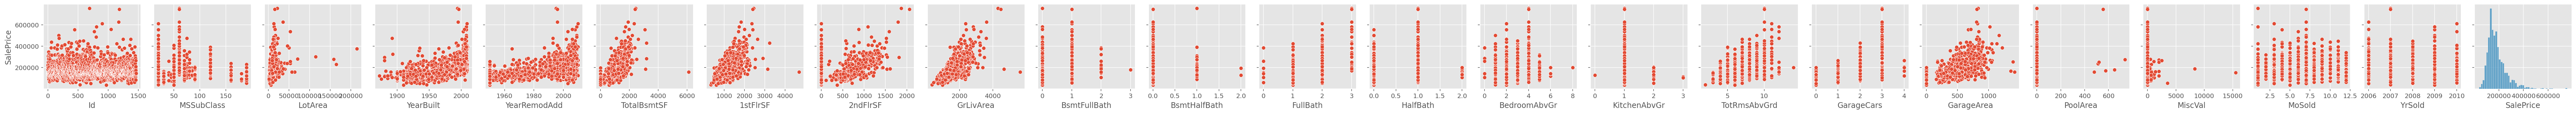

In [835]:
#which numeric features have a polynomial relationship with sales price (if you double click on the image you can see it clearly!!)
sns.pairplot(data=residential_and_fixed,
                  y_vars=['SalePrice']);
plt.show();

year built and year remod seem to have a polynomial relationship with sales price, lets double check for this by using residual plots.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


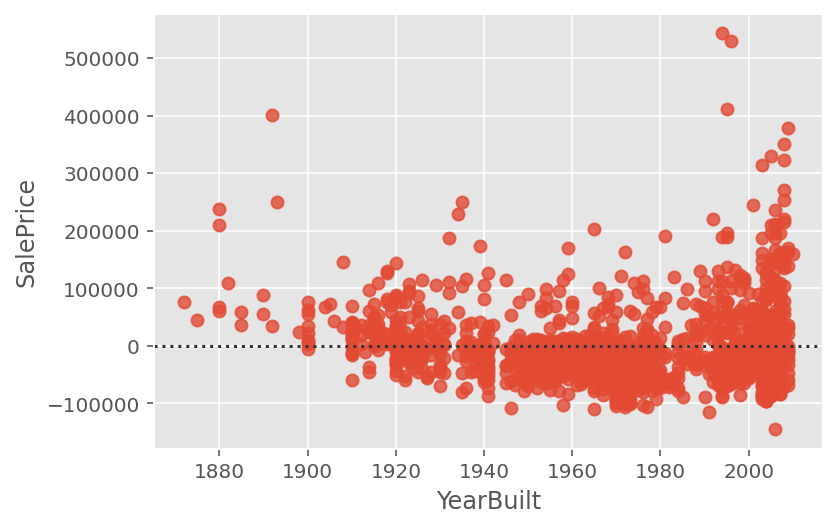

In [836]:
sns.residplot(residential_and_fixed['YearBuilt'], residential_and_fixed['SalePrice']);

Curved Relationship of residuals (errors between sale price and the variable) indicates non-linear relationship (**endogeneity**)

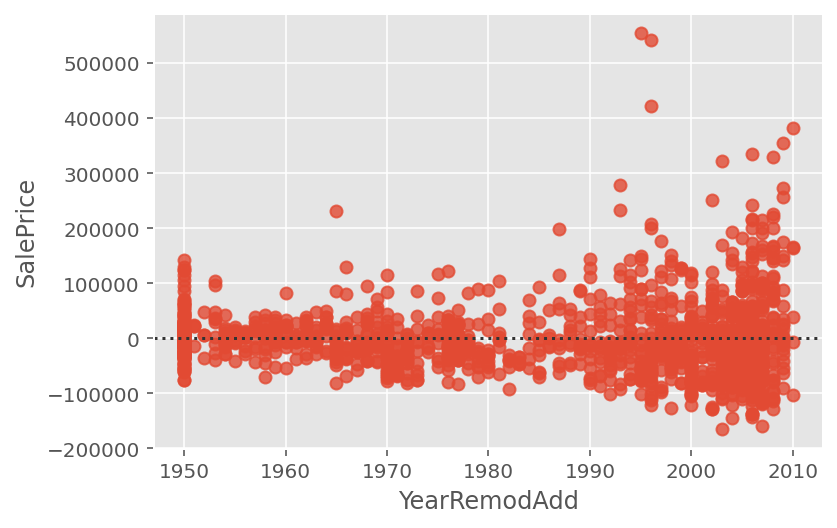

In [837]:
sns.residplot(residential_and_fixed['YearRemodAdd'], residential_and_fixed['SalePrice']);

In [838]:
residential_and_fixed.describe(include = 'object')

MSZoning LotFrontage Street Alley LotShape LandContour  \
count                      1450        1450   1450  1450     1450        1450   
unique                        4         111      2     3        4           4   
top     Residential Low Density          NA   Pave    NA      Reg         Lvl   
freq                       1151         259   1446  1361      916        1305   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1450      1450         1450       1450       1450     1450   
unique         5         3           25          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1044      1375          225       1252       1436     1211   

       HouseStyle RoofStyle RoofMatl Foundation GarageType GarageYrBlt  \
count        1450      1450     1450       1450       1450        1450   
unique          8         6        8          6          7          97   
top        1Story     Gable  CompShg      PConc     Attchd          NA   
freq          722      1135     1424        647        870          79   

       GarageCond PavedDrive PoolQC MiscFeature SaleType SaleCondition  
count        1450       1450   1450        1450     1450          1450  
unique          6          3      4           5        9             6  
top            TA          Y     NA          NA       WD        Normal  
freq         1319       1335   1443        1398     1261          1194

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


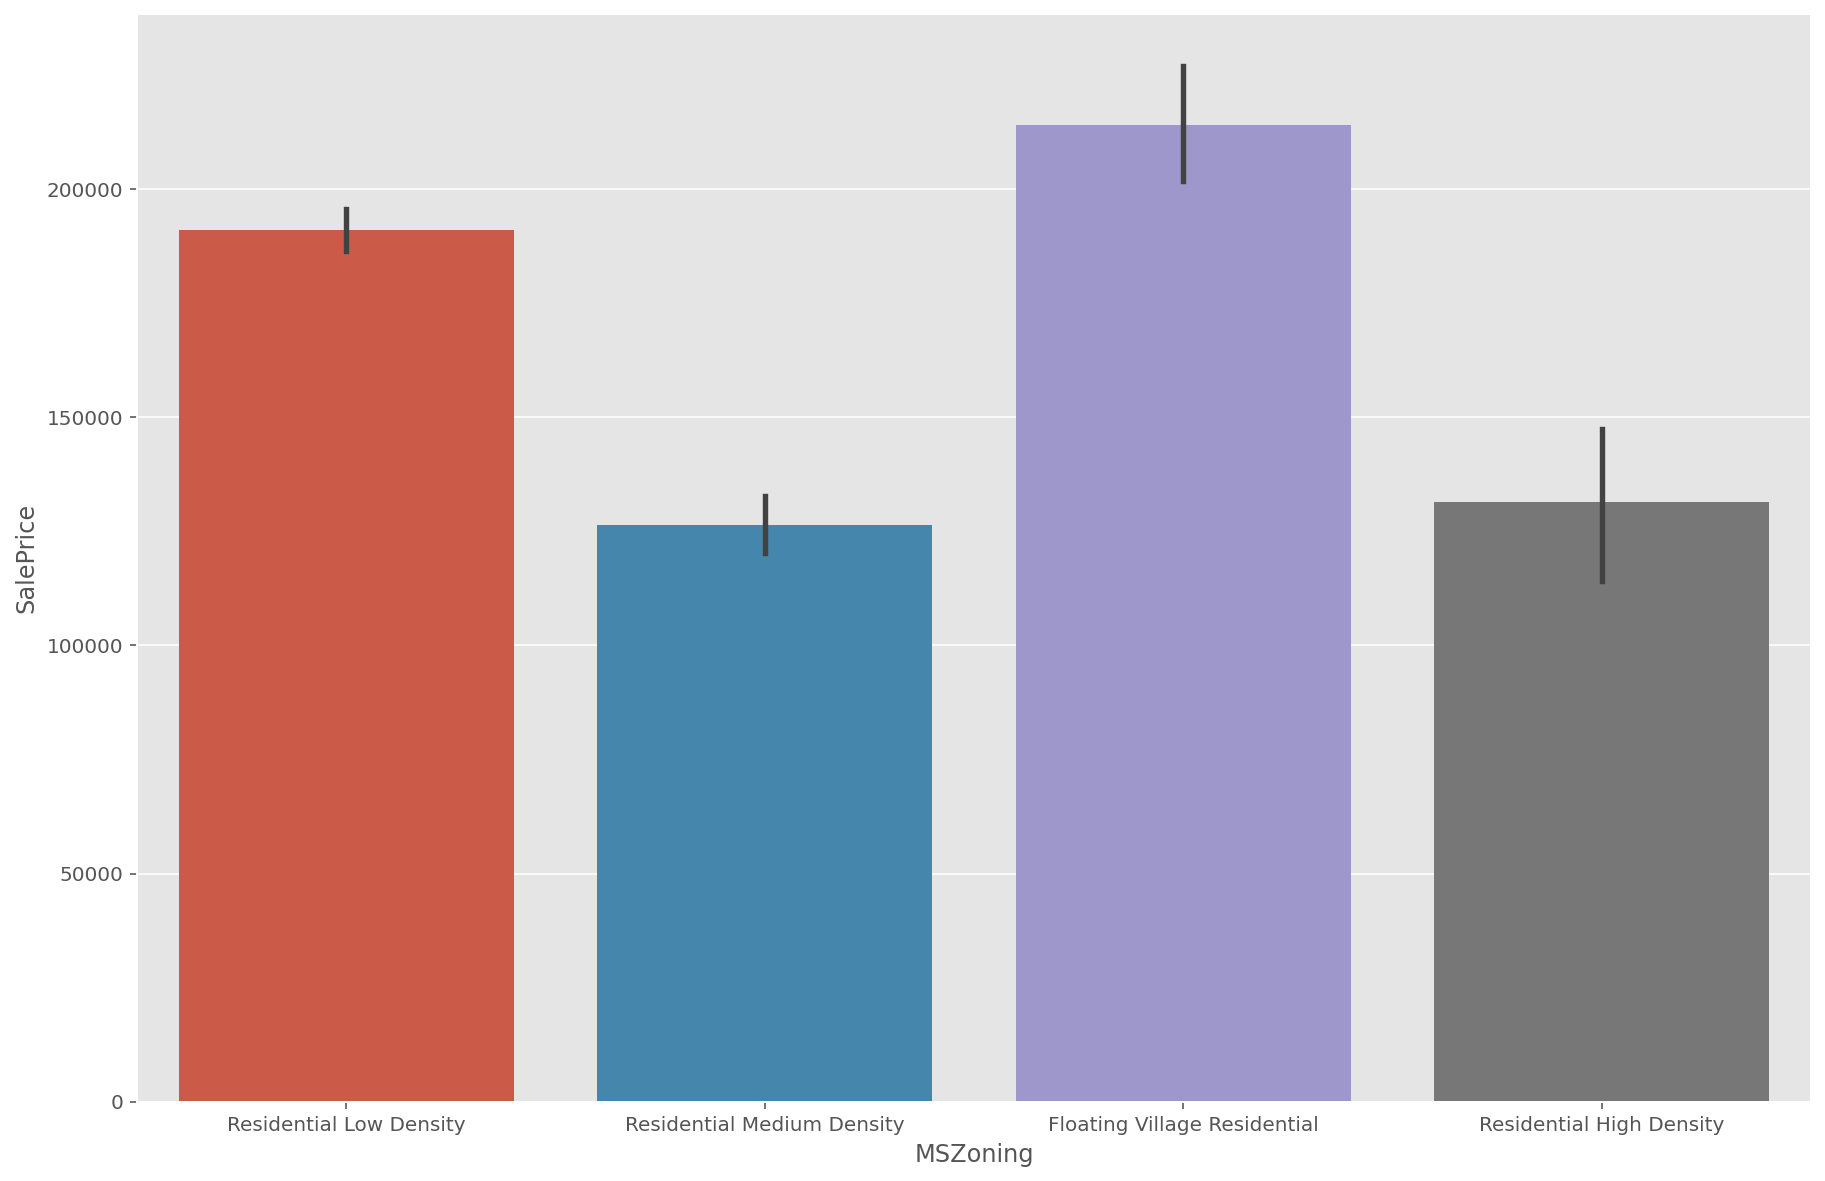

In [839]:
# lets check sales price overall for the different types of residential
plt.figure(figsize = (15,10))
sns.barplot(residential_and_fixed.MSZoning, residential_and_fixed.SalePrice)
plt.show()

An anova test can determine whether group means in sales price are significanly different

In [840]:
anova_df = residential_and_fixed[['SalePrice', 'MSZoning']]
grouped_anova = anova_df.groupby('MSZoning')['SalePrice']

from scipy import stats
stats.f_oneway(*[grouped_anova.get_group(x) for x in residential_and_fixed.MSZoning.unique()])

F_onewayResult(statistic=51.47123252617084, pvalue=1.3152553502246802e-31)

type of resi has an effect, so will consider creating dummy variables for the model

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


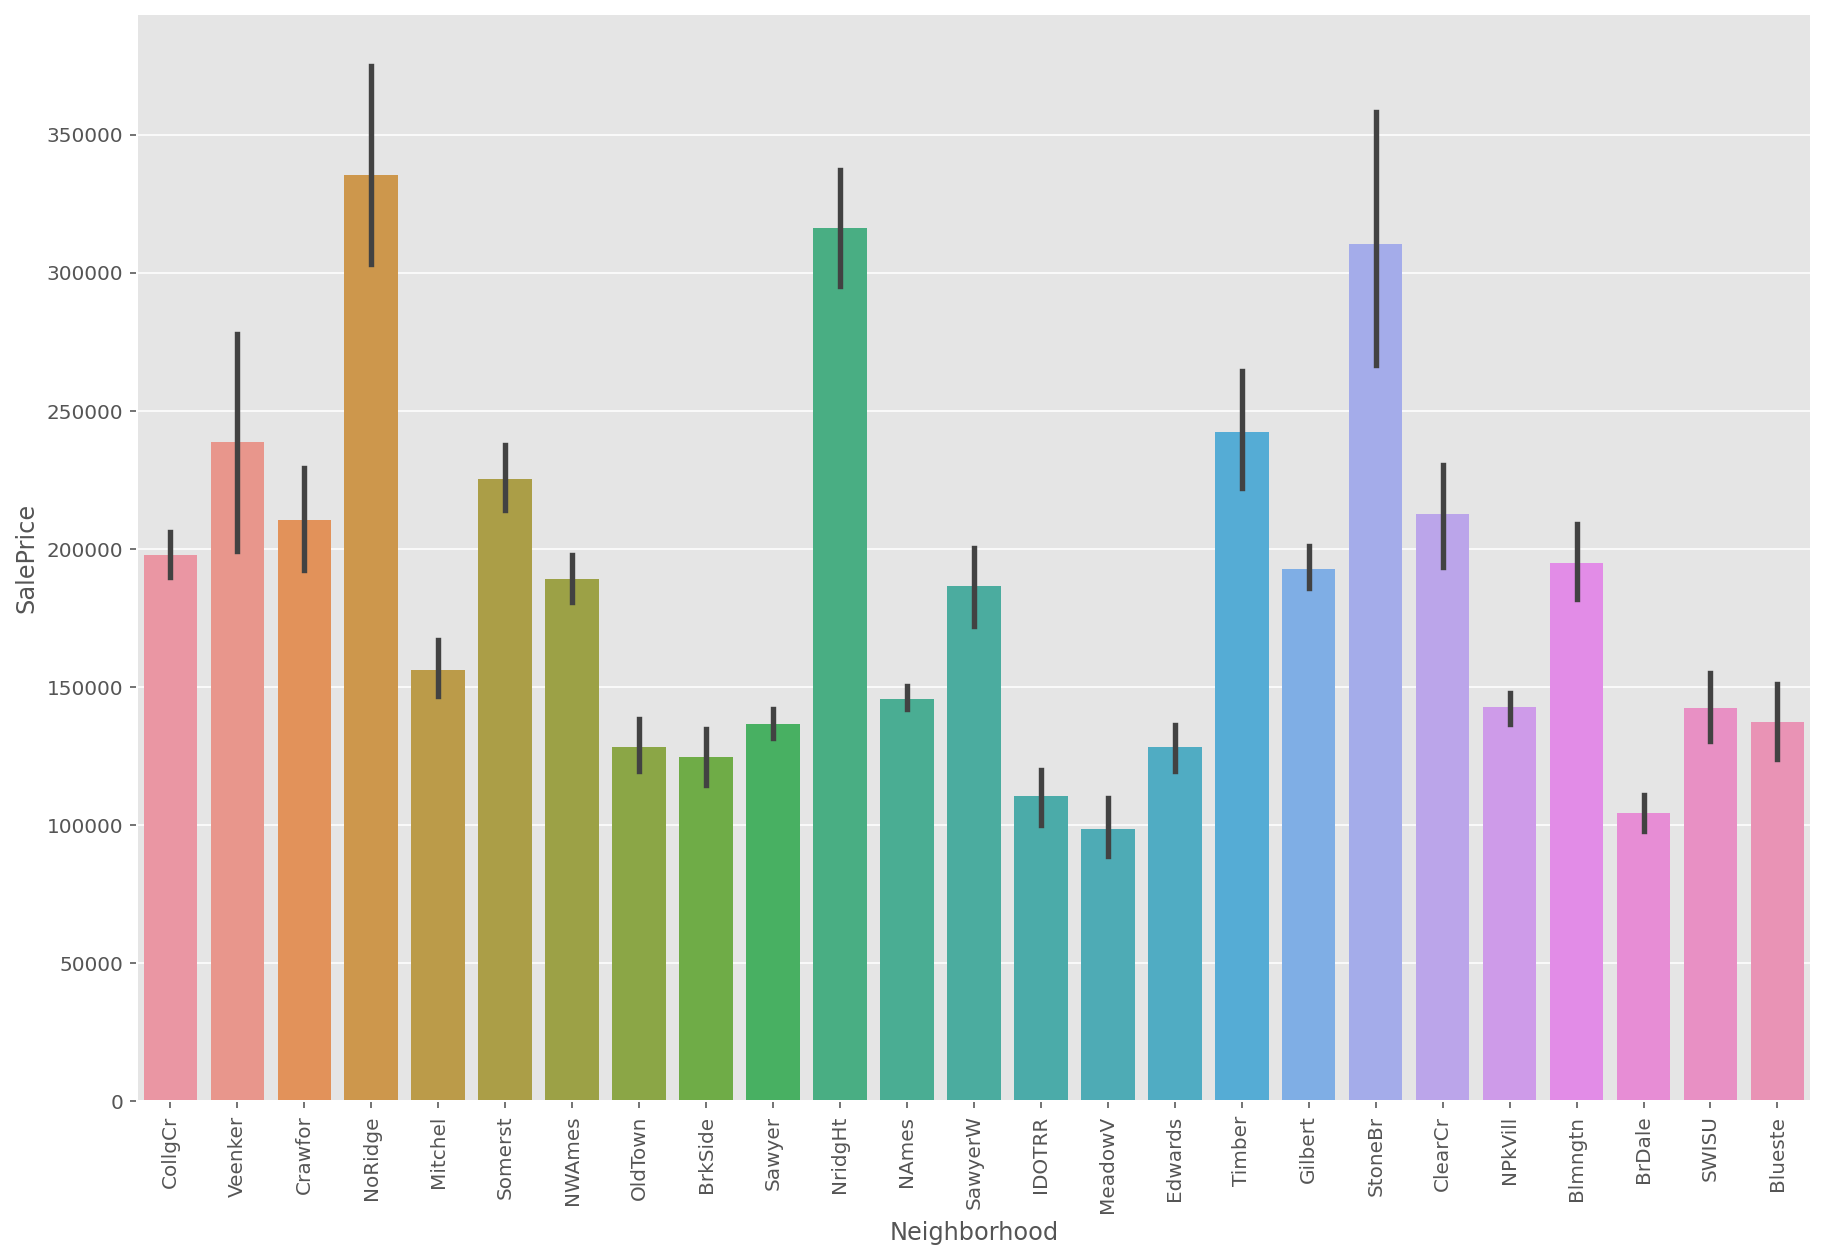

In [841]:
plt.figure(figsize = (15,10))
sns.barplot(residential_and_fixed.Neighborhood, residential_and_fixed.SalePrice)
plt.xticks(rotation= 90)
plt.show()

In [842]:
anova_df = residential_and_fixed[['SalePrice', 'Neighborhood']]
grouped_anova = anova_df.groupby('Neighborhood')['SalePrice']


stats.f_oneway(*[grouped_anova.get_group(x) for x in residential_and_fixed.Neighborhood.unique()])

F_onewayResult(statistic=70.10067554555977, pvalue=4.493316161009326e-221)

clear statistical significance between neighborhood group means

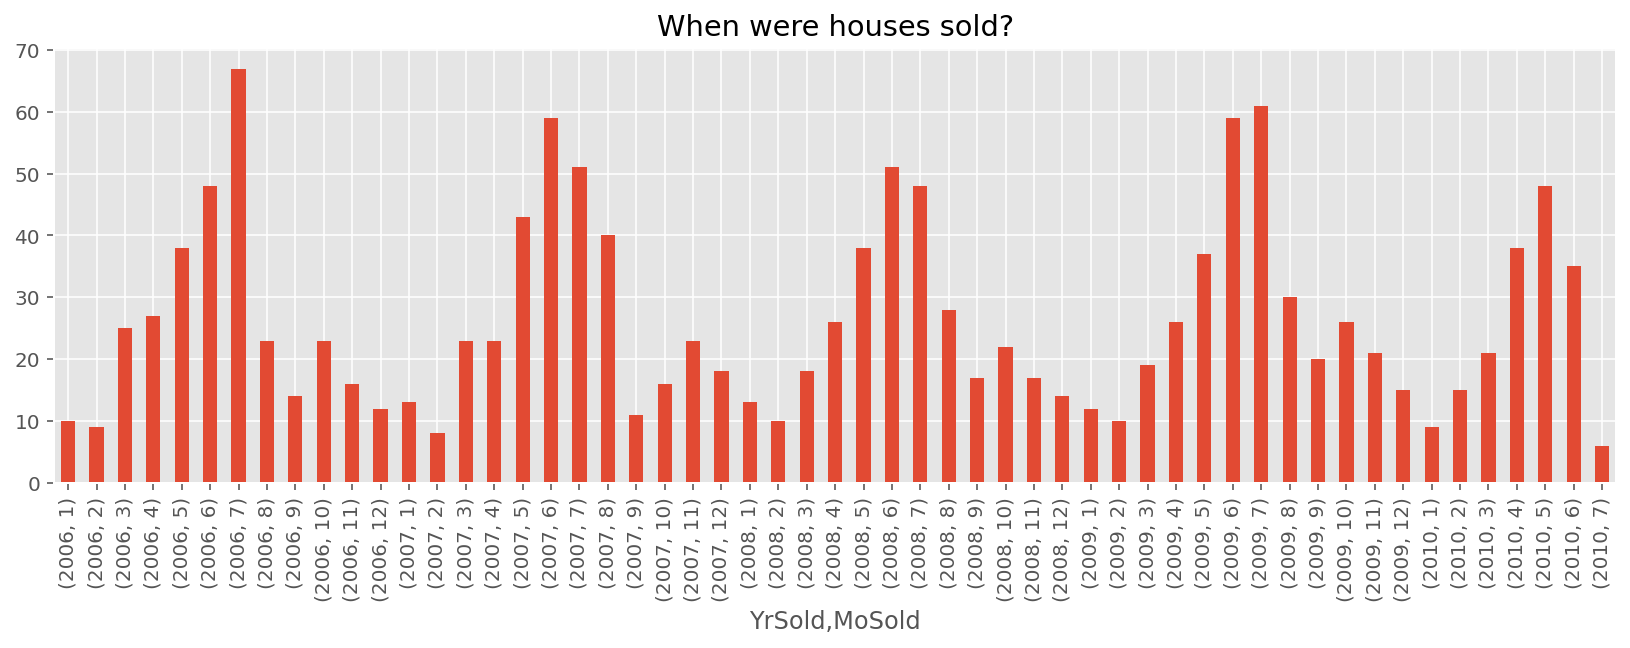

In [843]:
residential_and_fixed.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When were houses sold?')
plt.show()

In [844]:
residential_and_fixed.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
ClearCr     28
IDOTRR      28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Neighborhood has an effect, so will consider creating dummy variables for the model

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


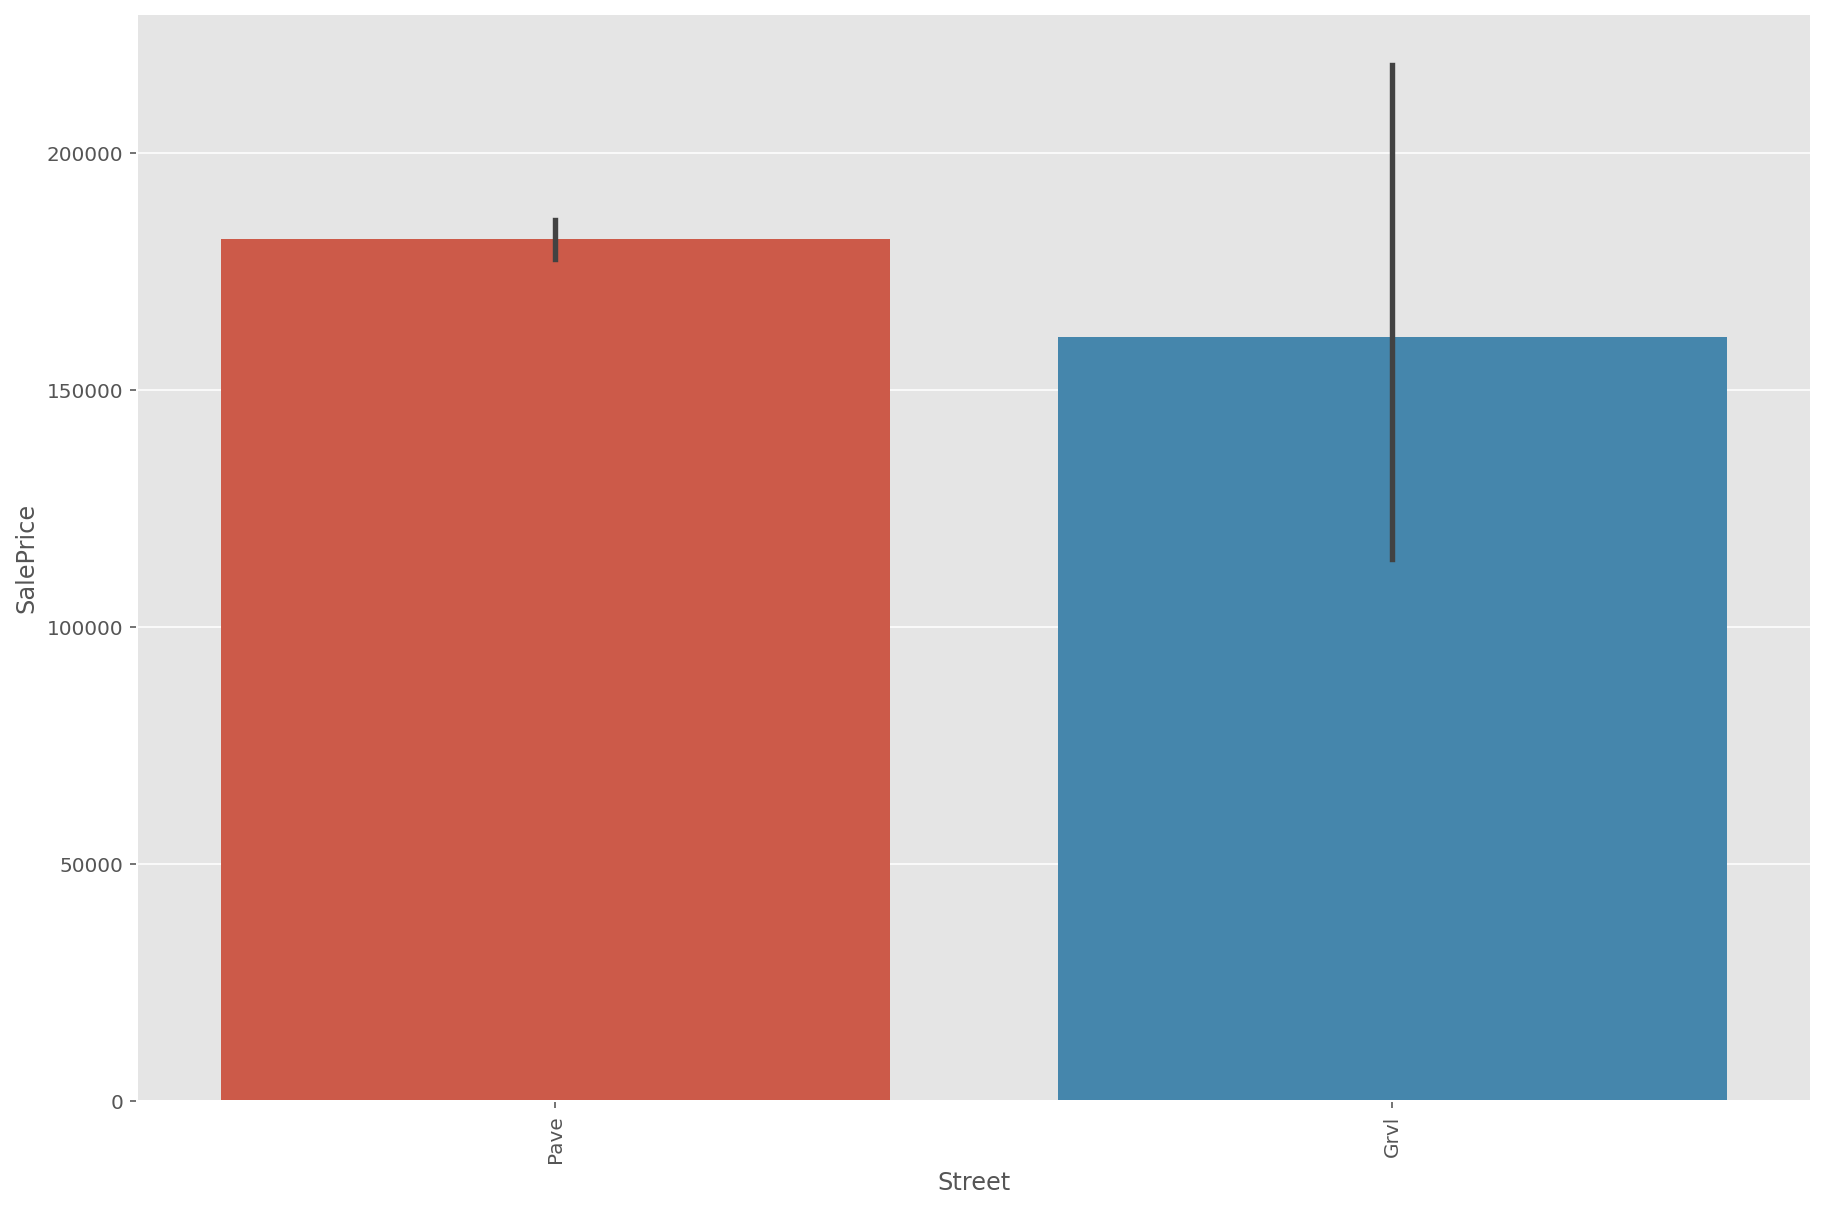

In [845]:
plt.figure(figsize = (15,10))
sns.barplot(residential_and_fixed.Street, residential_and_fixed.SalePrice)
plt.xticks(rotation= 90)
plt.show()

In [846]:
anova_df = residential_and_fixed[['SalePrice', 'Street']]
grouped_anova = anova_df.groupby('Street')['SalePrice']


stats.f_oneway(*[grouped_anova.get_group(x) for x in residential_and_fixed.Street.unique()])

F_onewayResult(statistic=0.2718432355488032, pvalue=0.6021777169380259)

In [847]:
residential_and_fixed.Street.value_counts()

Pave    1446
Grvl       4
Name: Street, dtype: int64

No significant difference and vast difference in the counts for each category so will leave this variable out for analysis

Checking the difference in means between the categorical variables and visualising that difference in the form of barcharts using seaborn

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


MSZoning = SIGNIFICANT VARIABLE
LotFrontage = SIGNIFICANT VARIABLE
Street = INSIGNIFICANT VARIABLE
Alley = SIGNIFICANT VARIABLE
LotShape = SIGNIFICANT VARIABLE
LandContour = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

LotConfig = SIGNIFICANT VARIABLE
LandSlope = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Neighborhood = SIGNIFICANT VARIABLE
Condition1 = SIGNIFICANT VARIABLE
Condition2 = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

BldgType = SIGNIFICANT VARIABLE
HouseStyle = SIGNIFICANT VARIABLE
RoofStyle = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

RoofMatl = SIGNIFICANT VARIABLE
Foundation = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


GarageType = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


GarageYrBlt = SIGNIFICANT VARIABLE
GarageCond = SIGNIFICANT VARIABLE
PavedDrive = SIGNIFICANT VARIABLE
PoolQC = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-848-c743a409410a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figur

MiscFeature = SIGNIFICANT VARIABLE
SaleType = SIGNIFICANT VARIABLE
SaleCondition = SIGNIFICANT VARIABLE


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


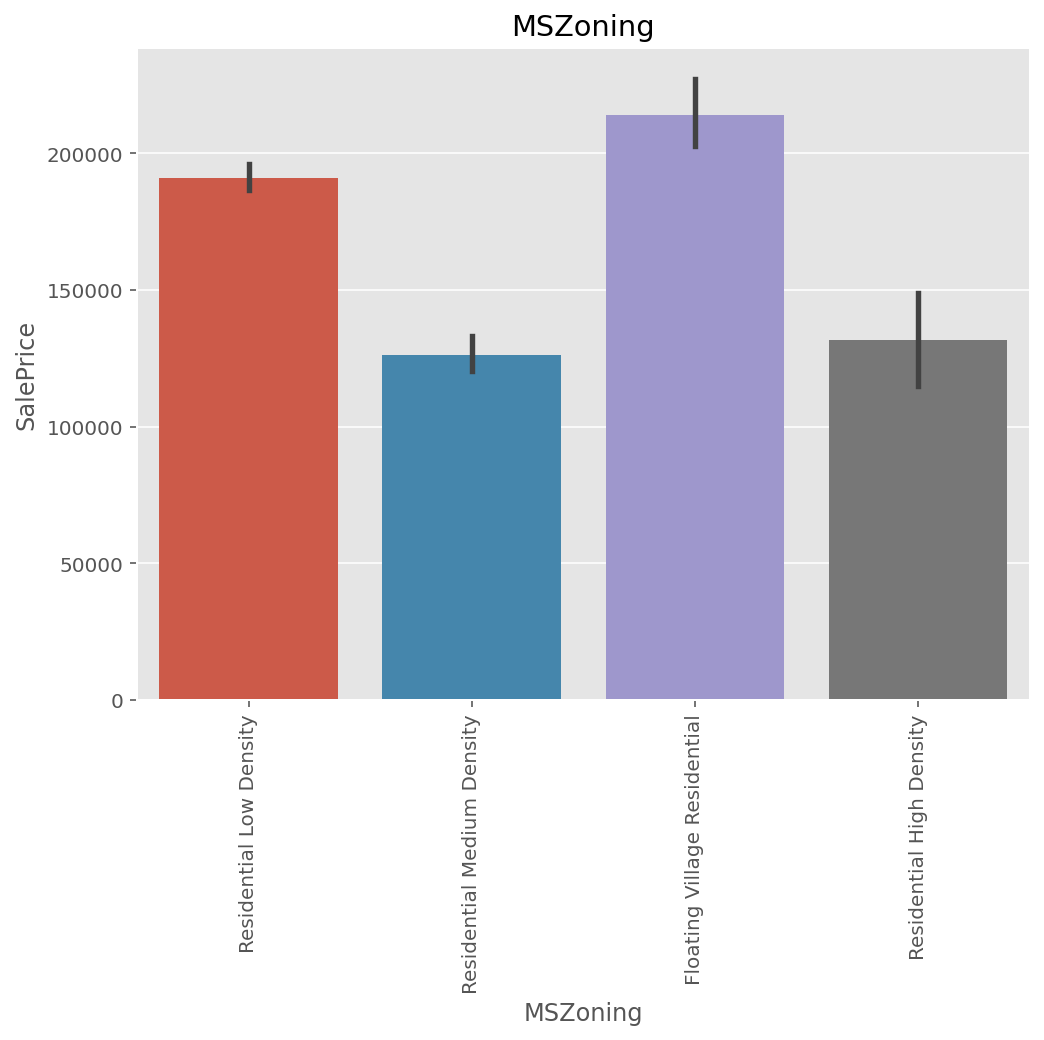

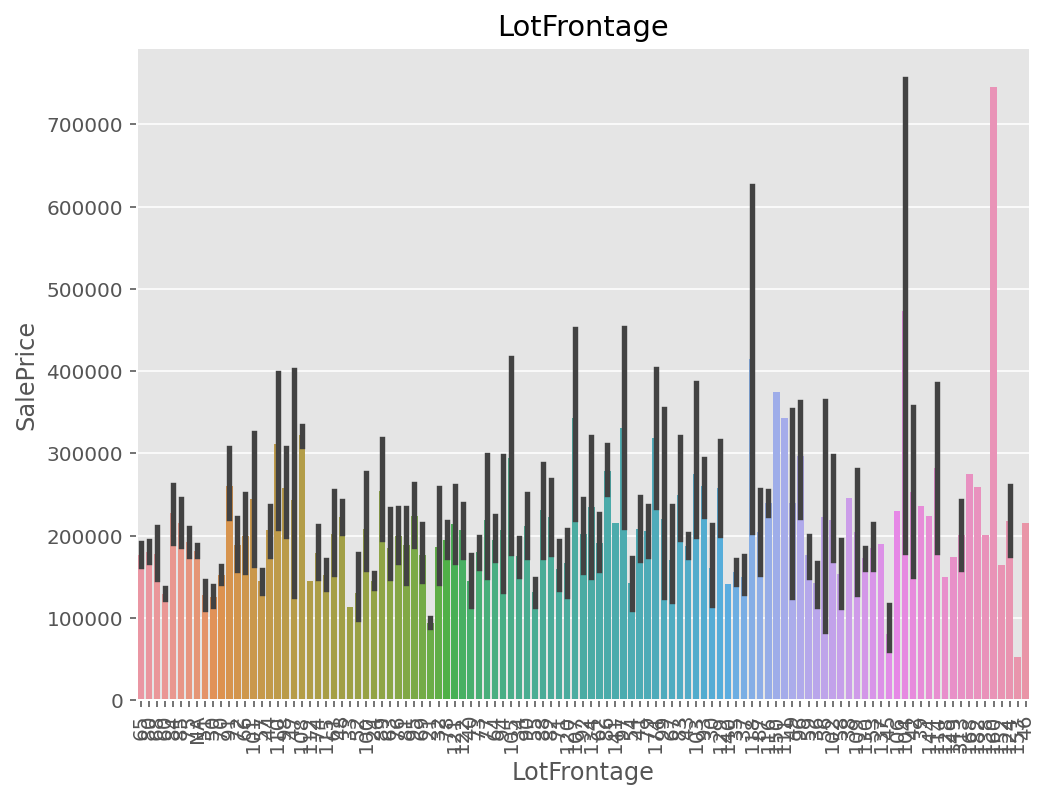

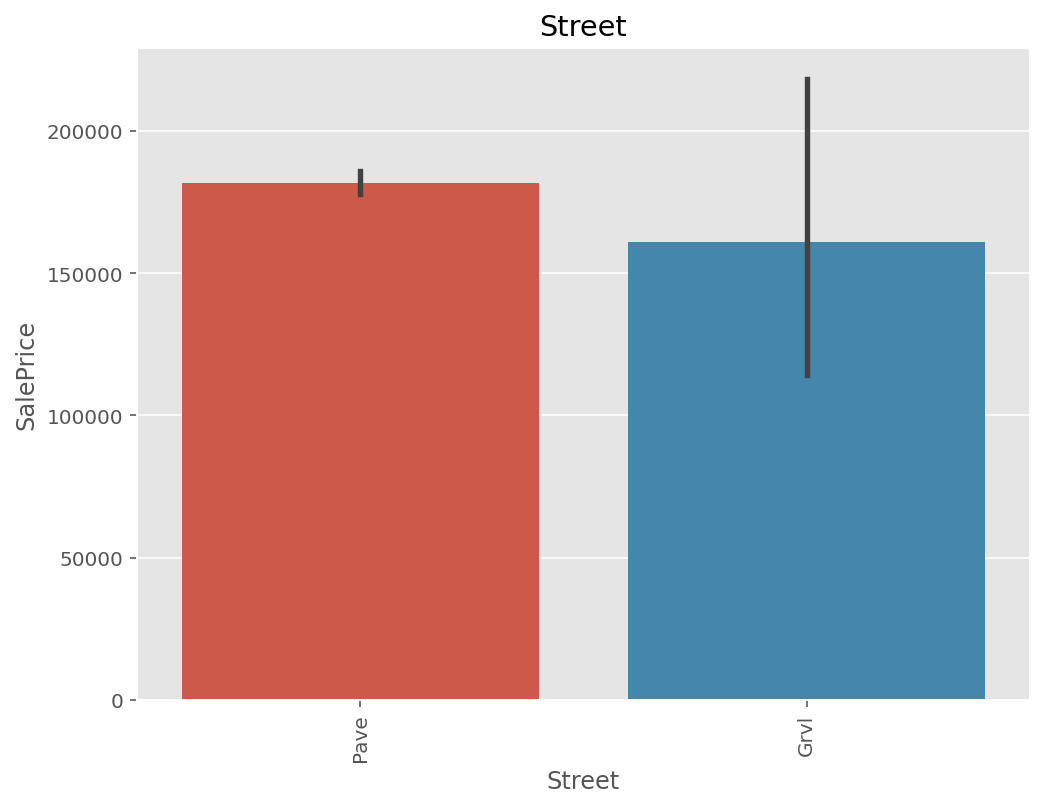

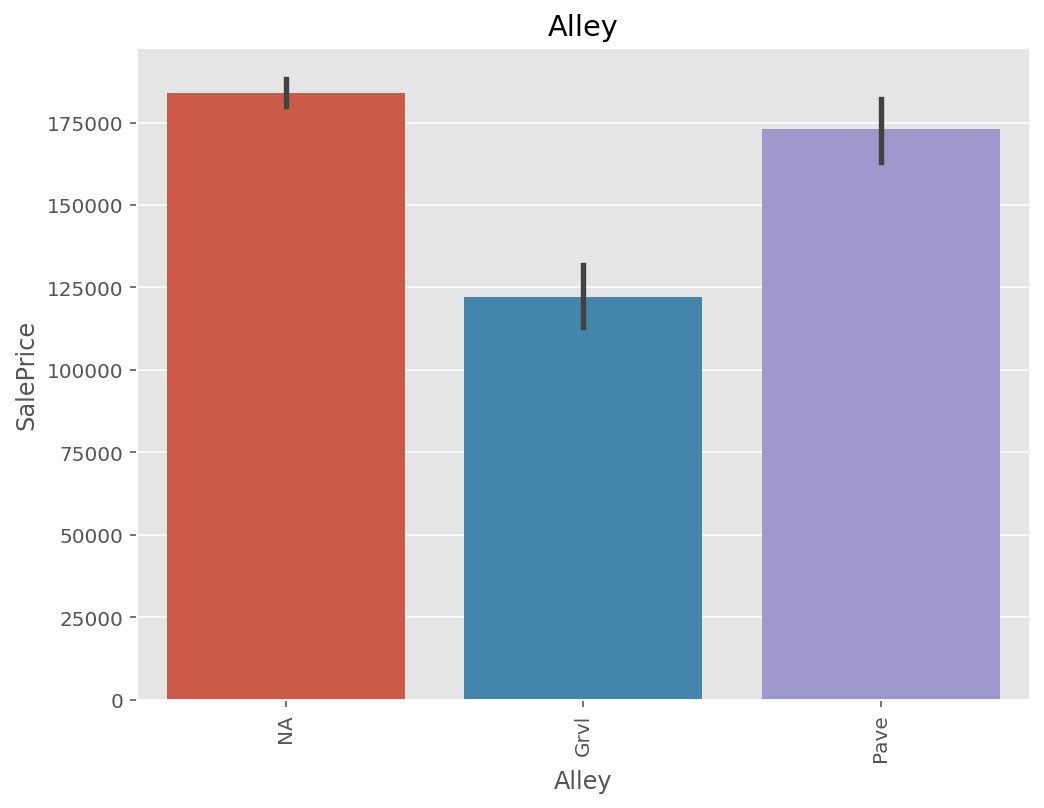

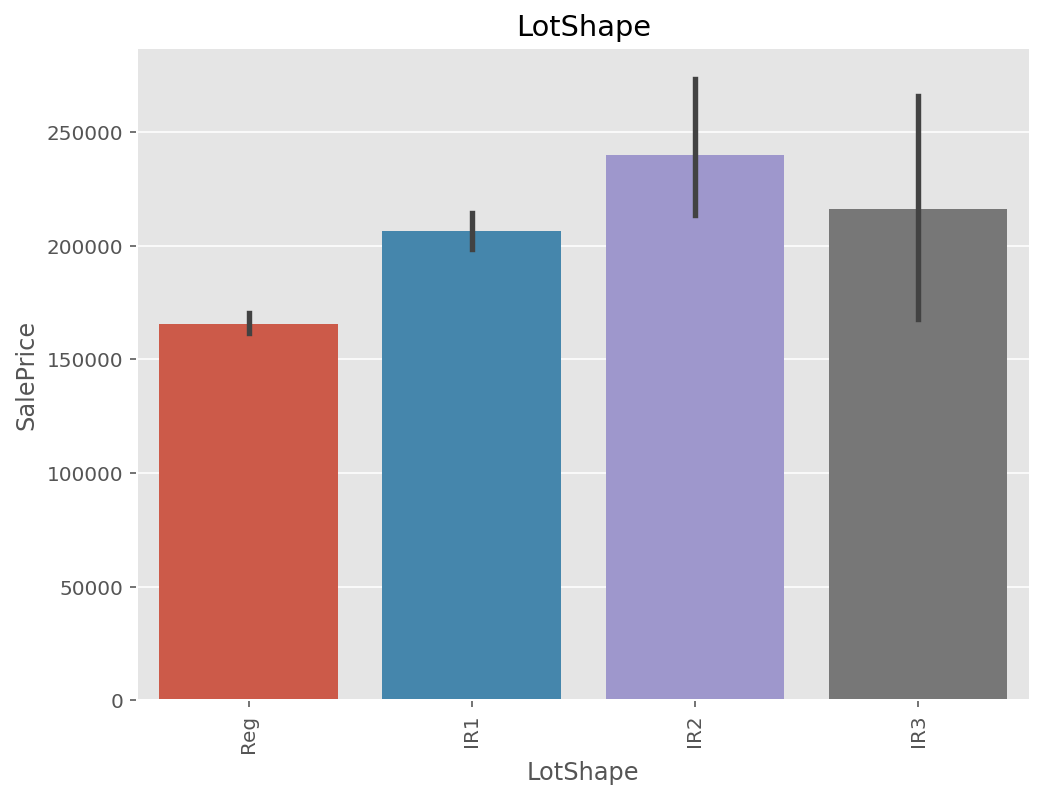

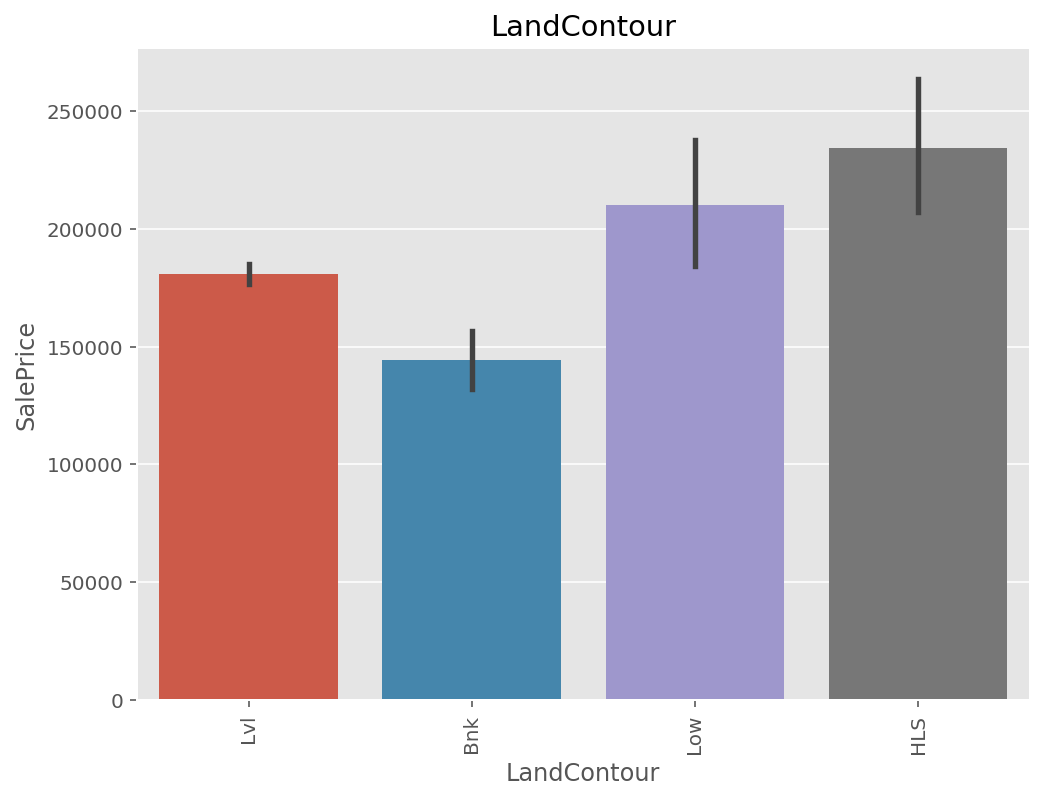

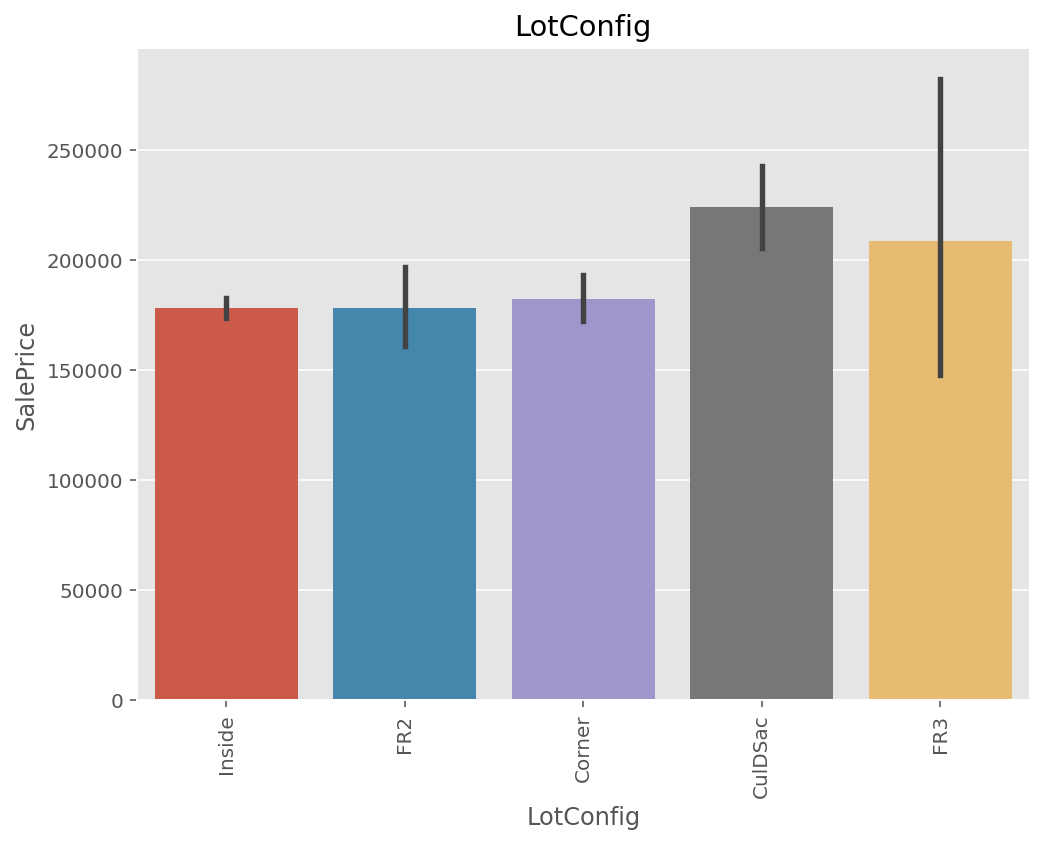

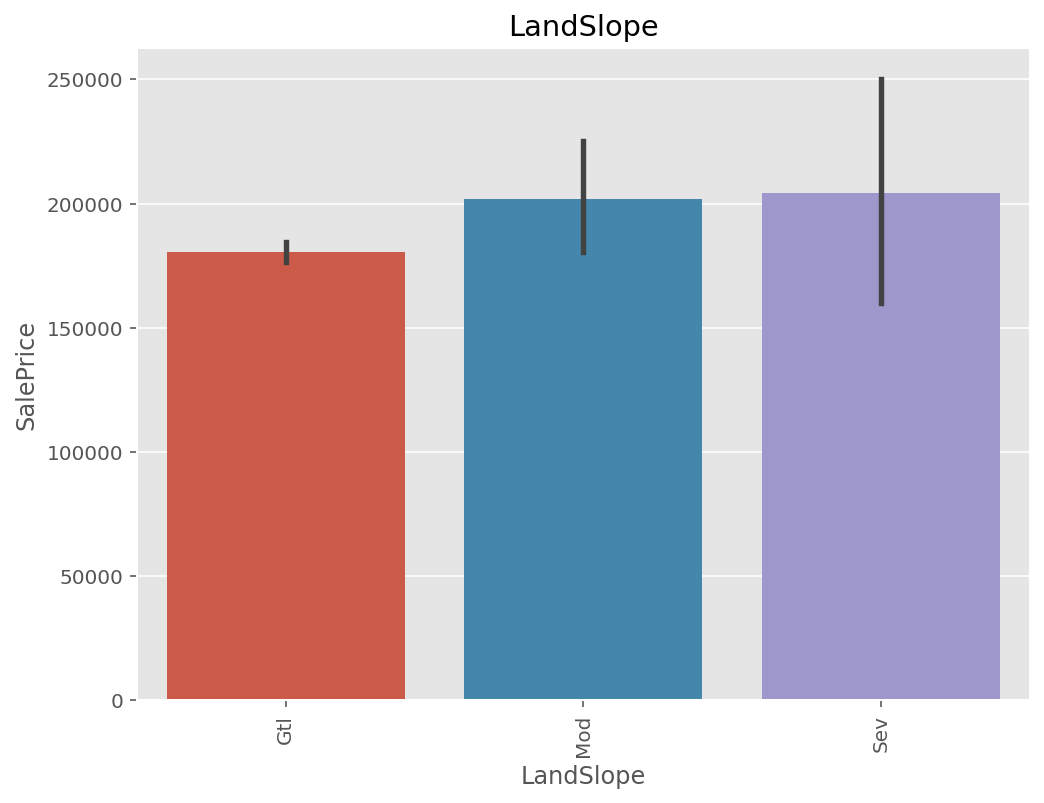

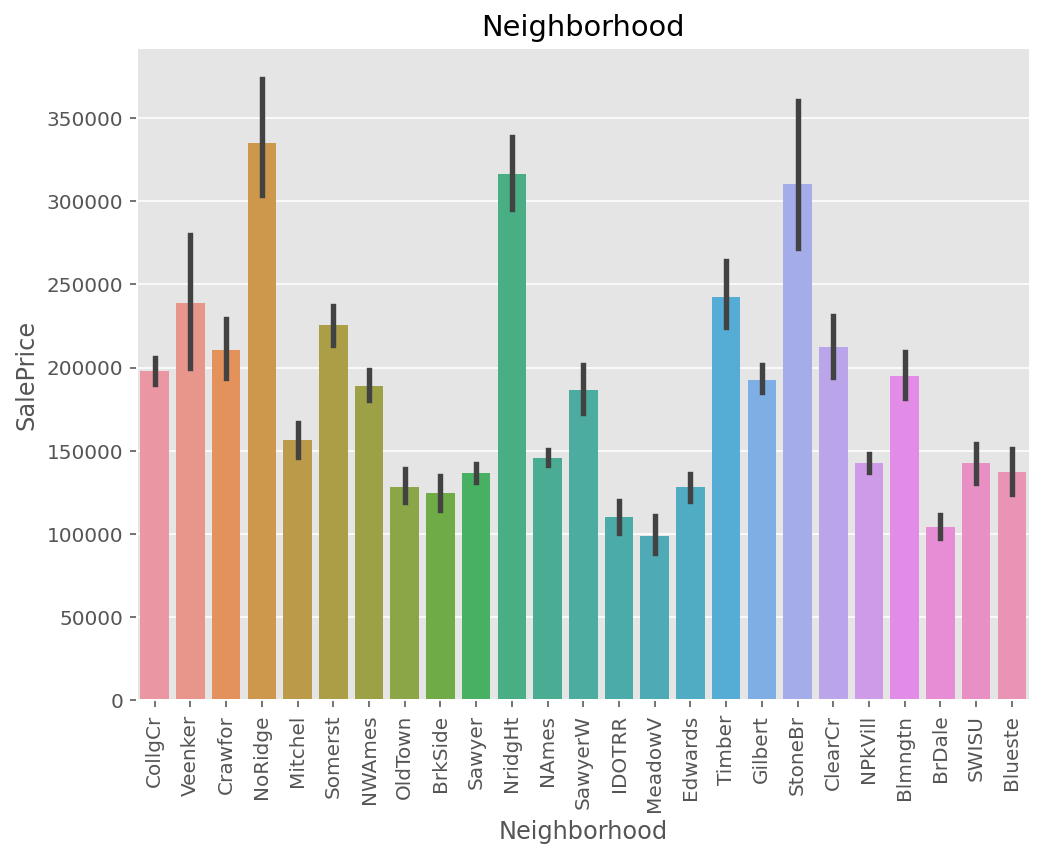

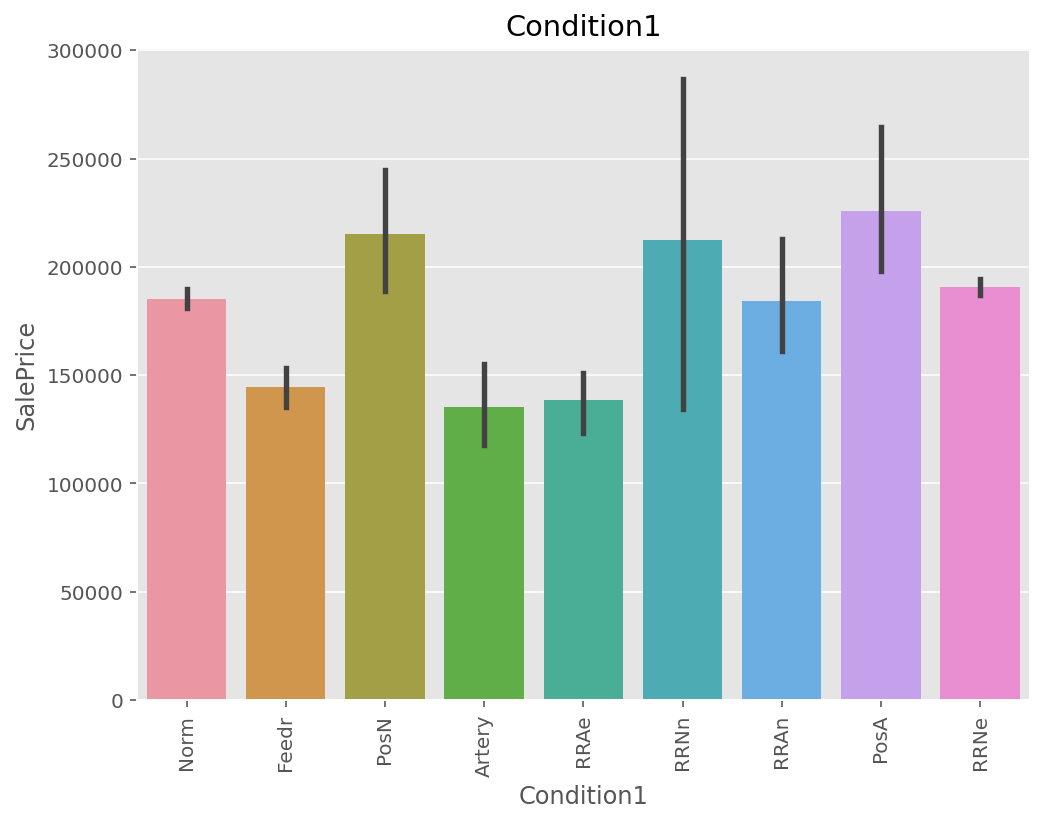

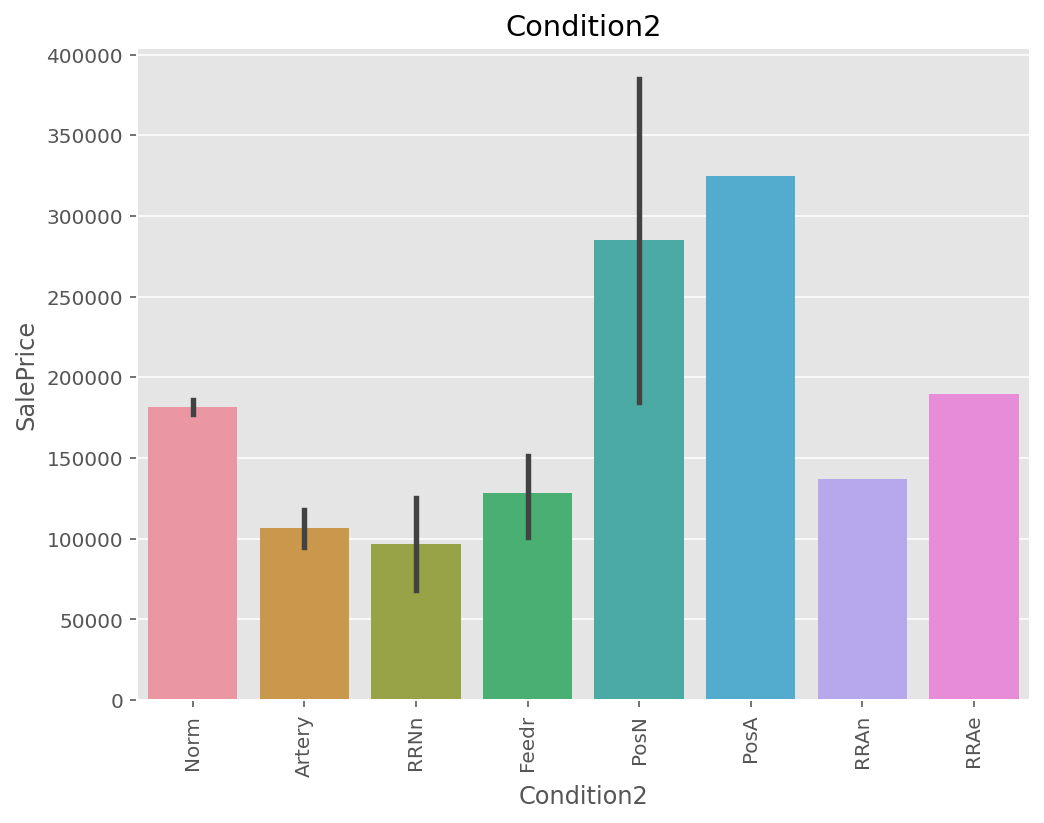

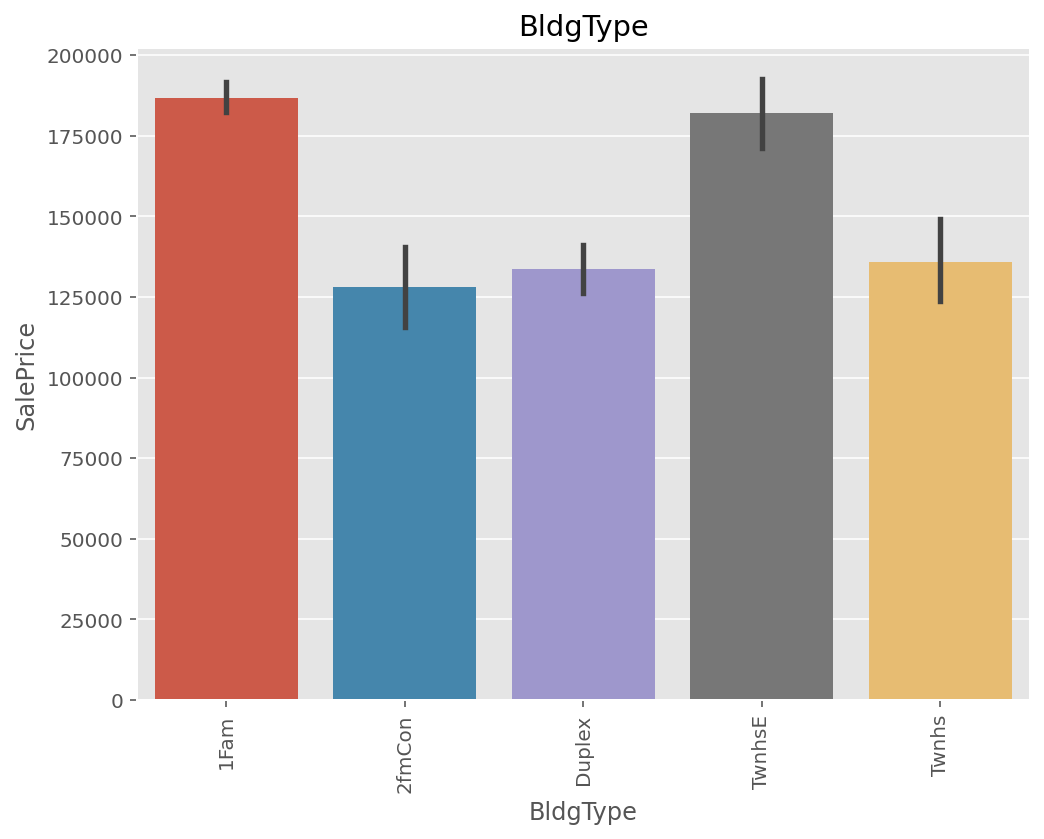

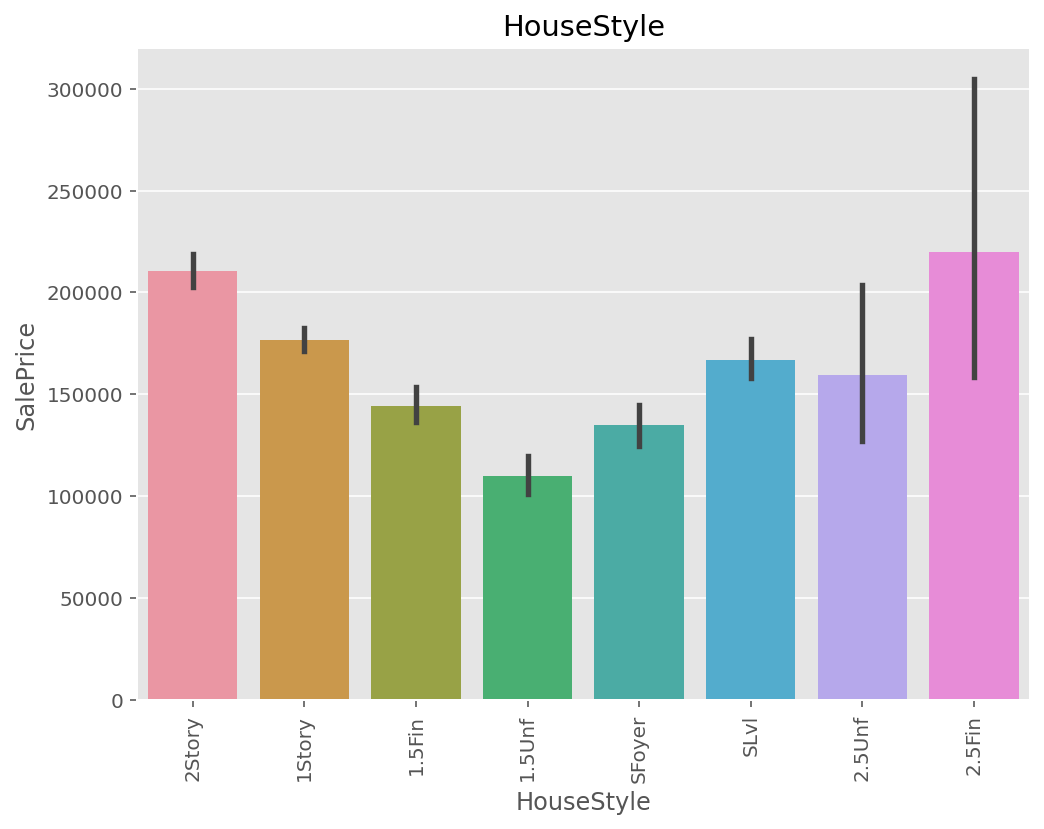

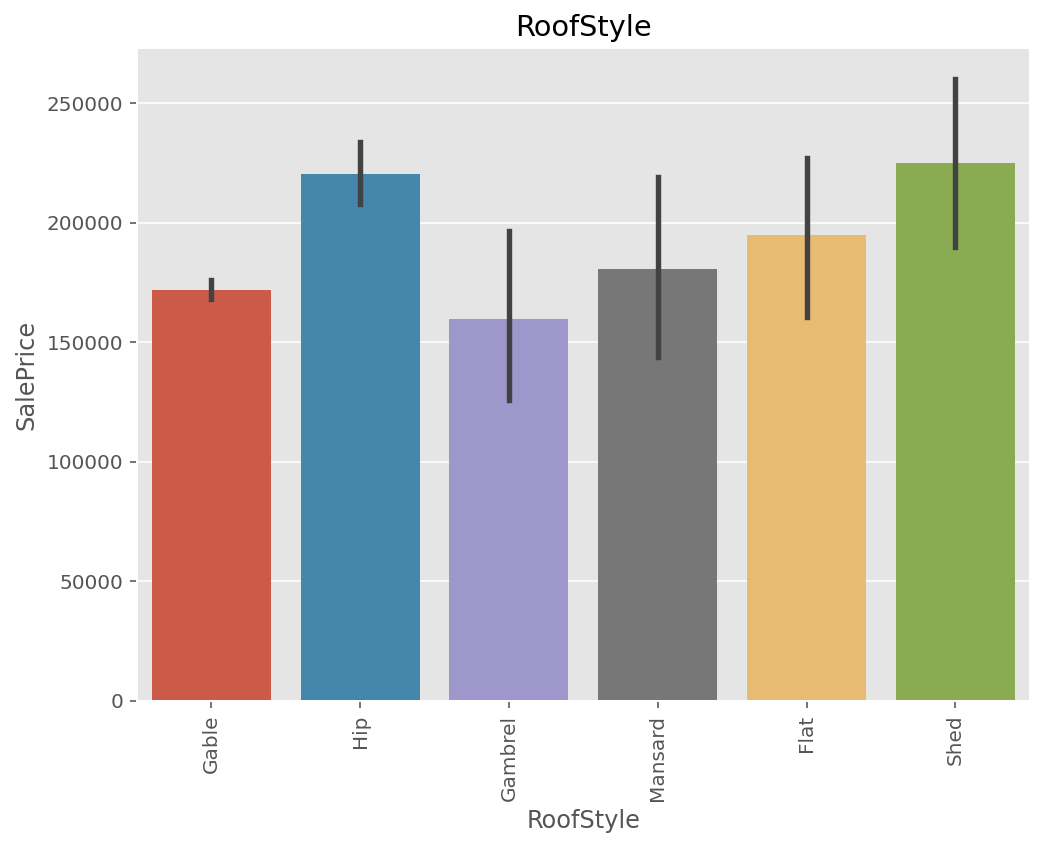

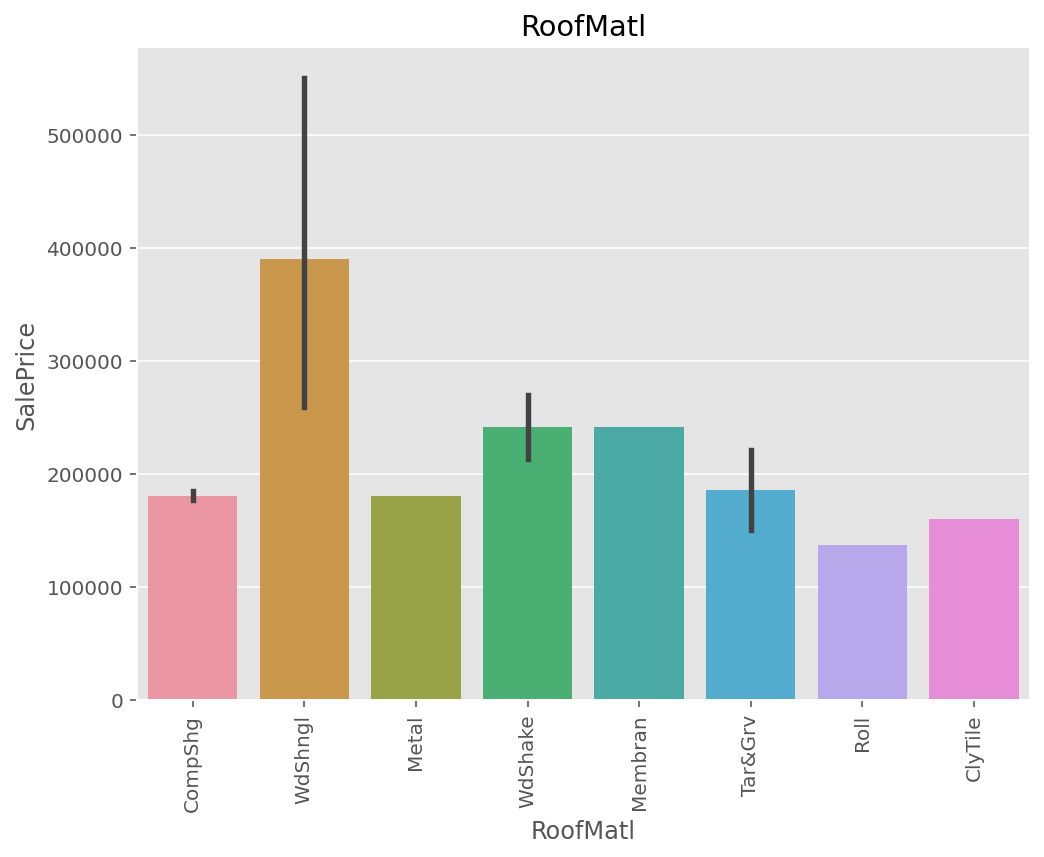

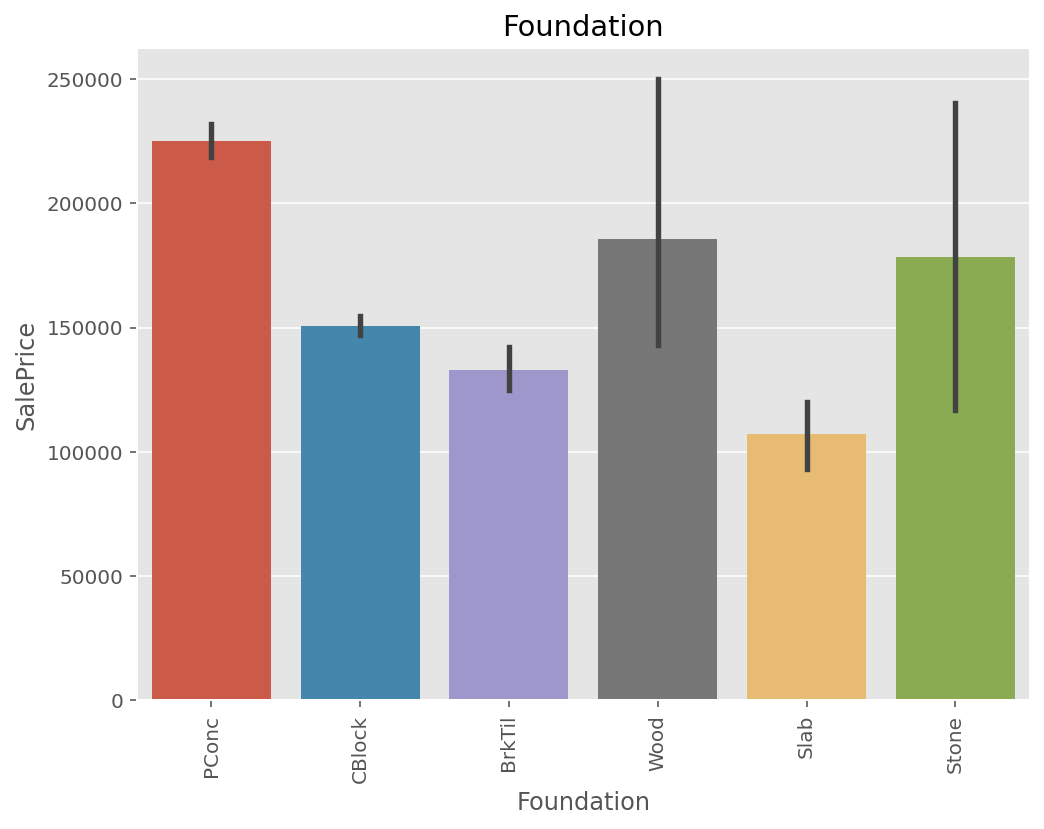

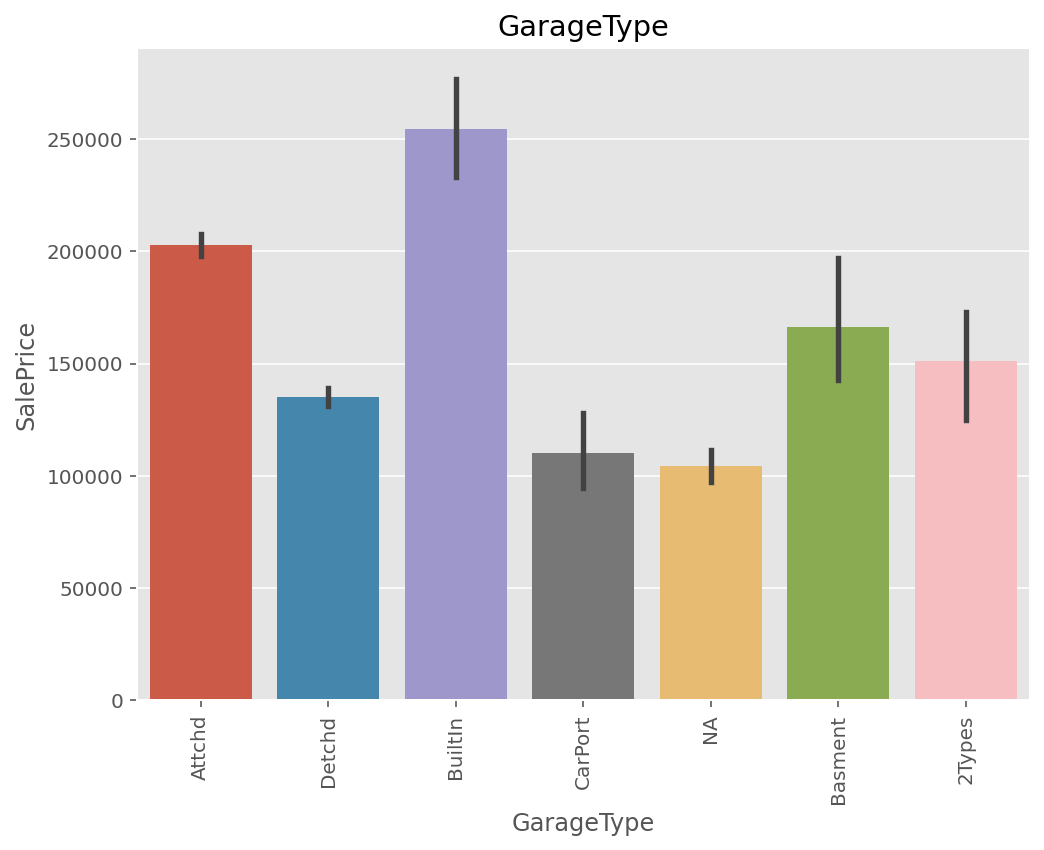

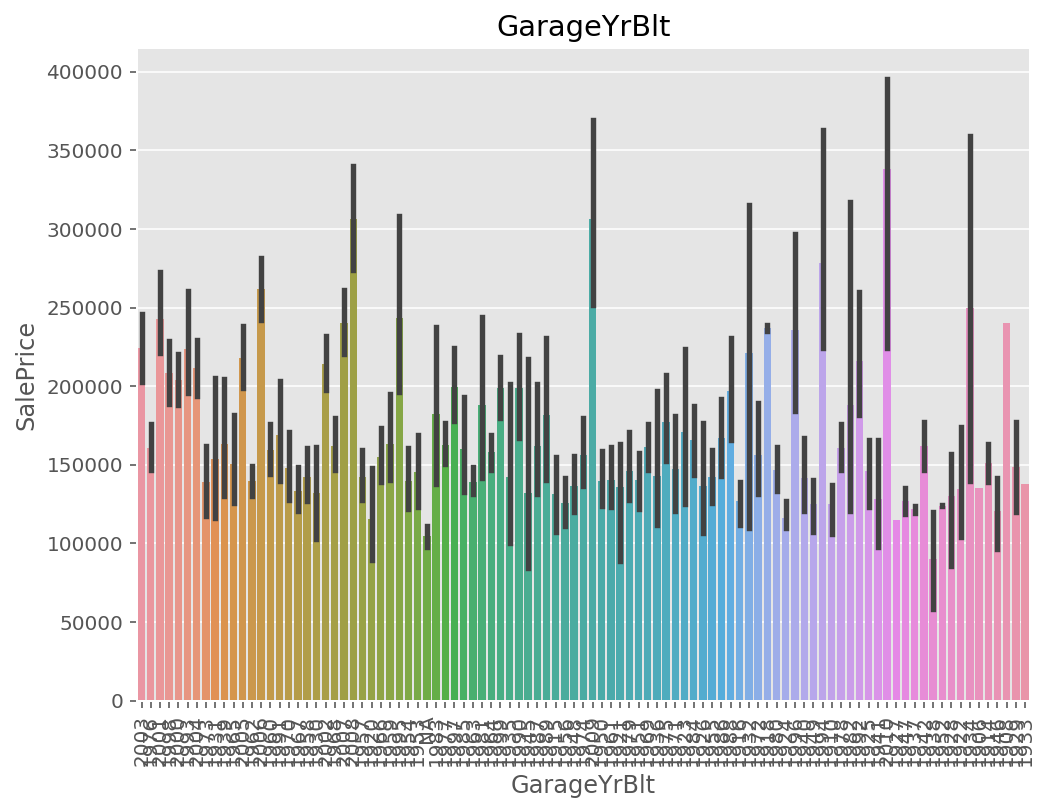

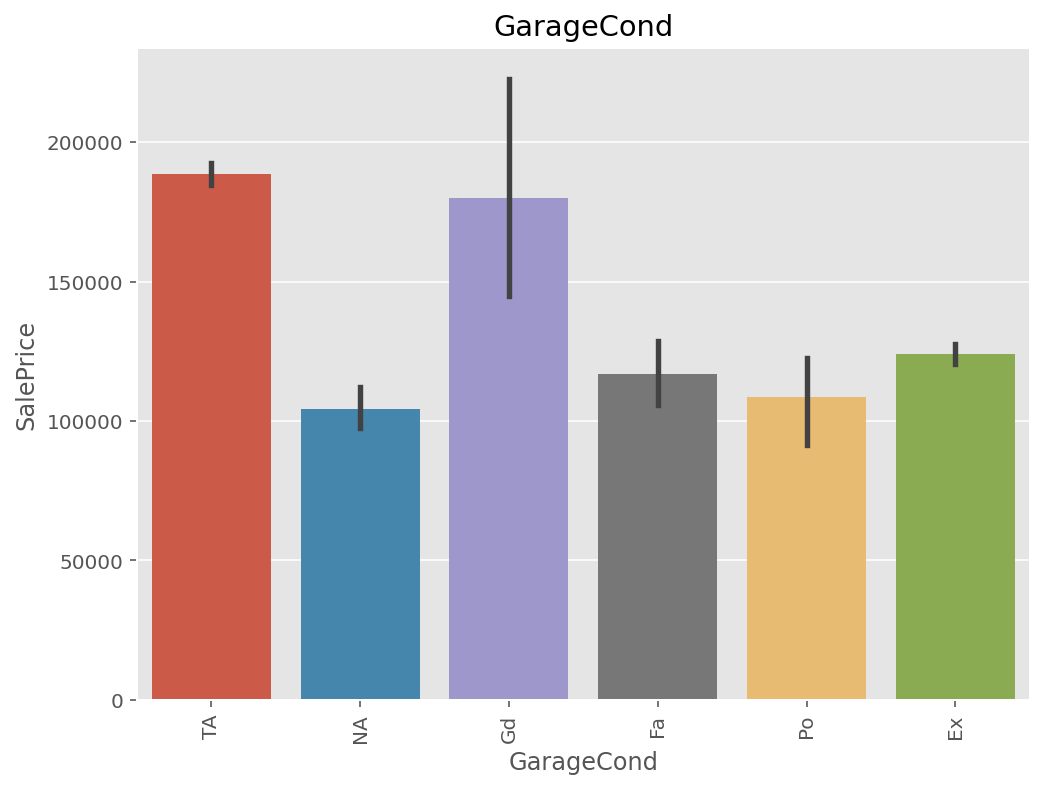

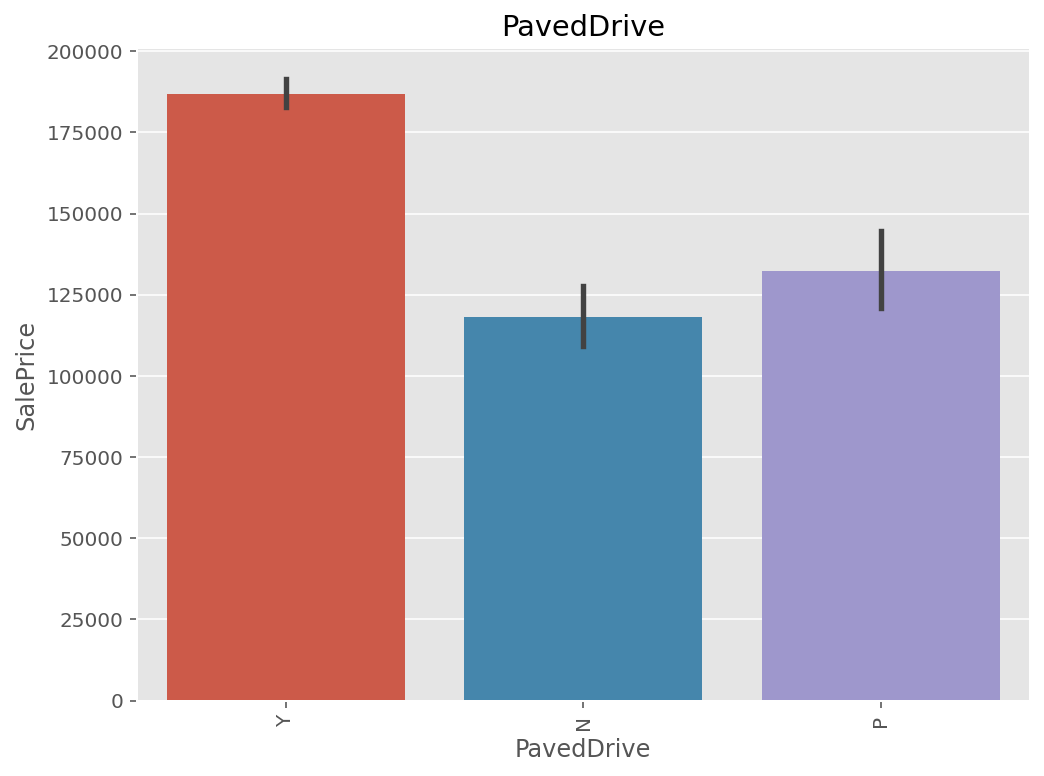

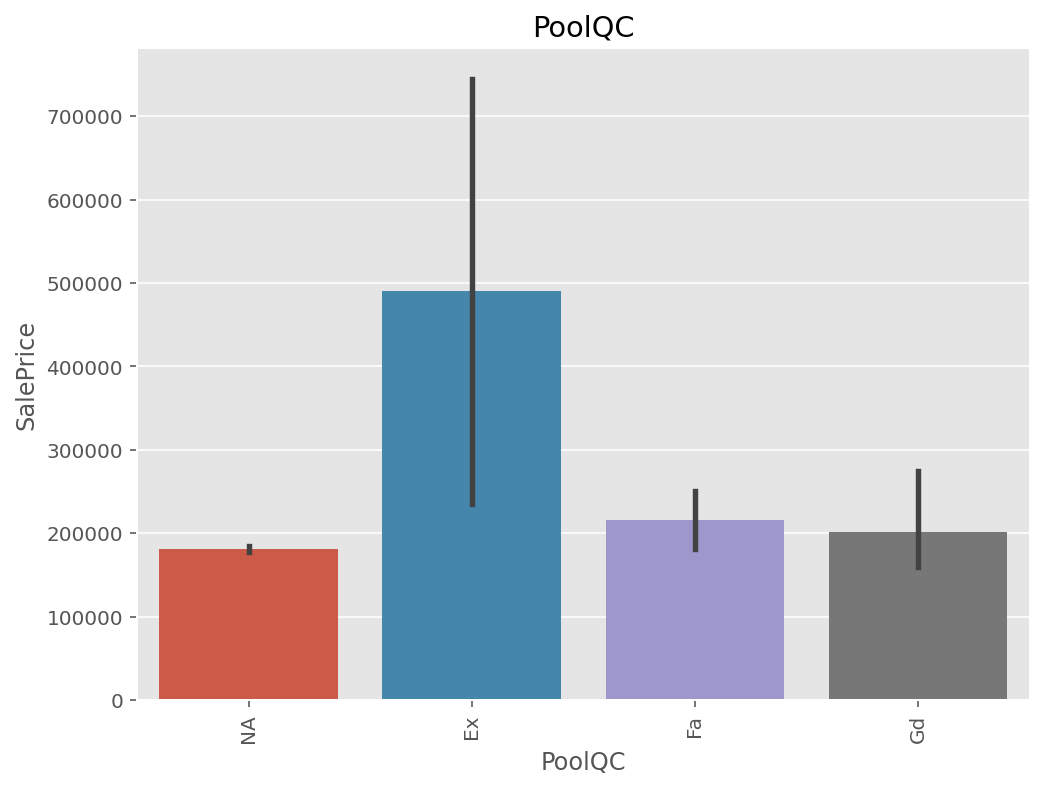

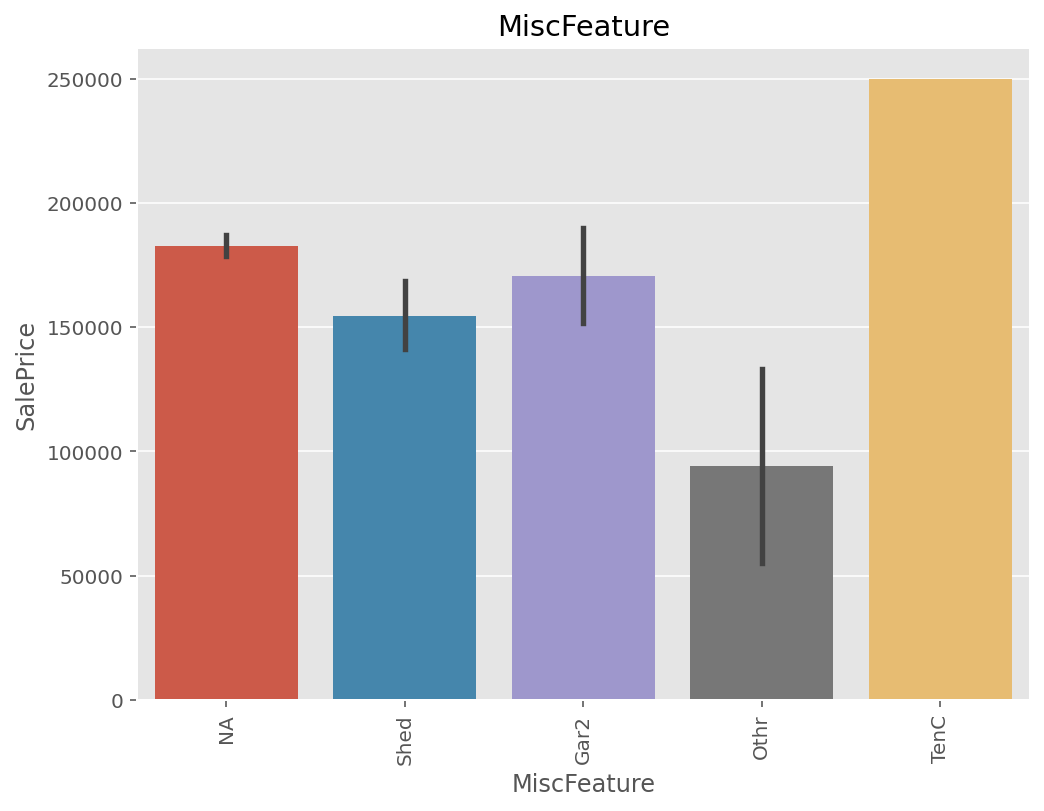

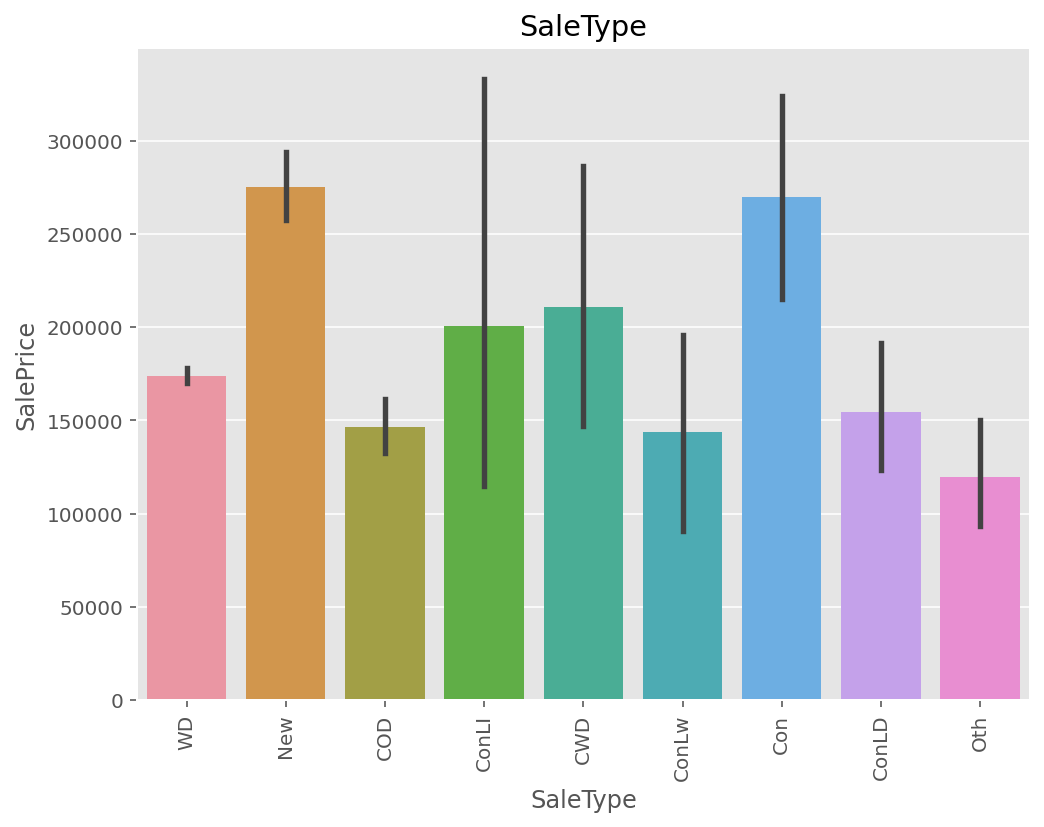

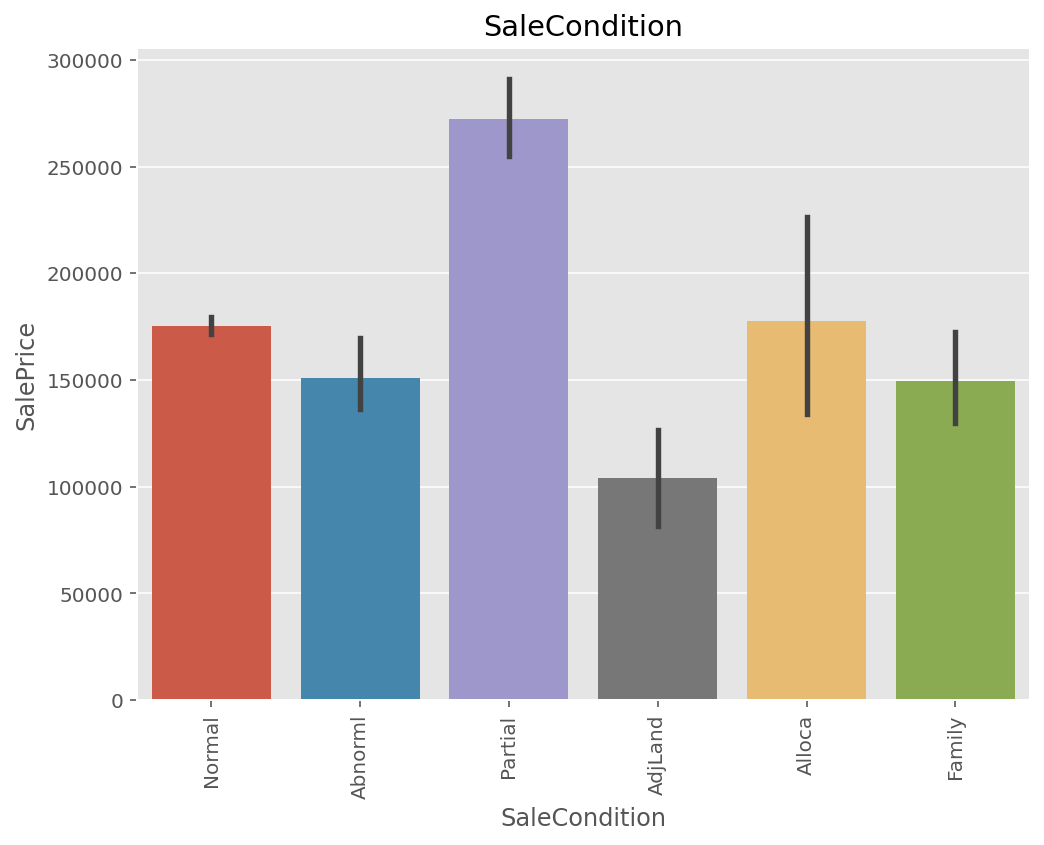

In [848]:
for column in residential_and_fixed.describe(include = 'object').columns:
    plt.figure(figsize = (8,6))
    sns.barplot(residential_and_fixed[column] , residential_and_fixed['SalePrice'])
    #residential_and_fixed[[column , 'SalePrice']].groupby(column).mean().plot(kind = 'bar')
    plt.title(column)
    plt.xticks(rotation = 90)
    
    anova_df = residential_and_fixed[['SalePrice', column]]
    grouped_anova = anova_df.groupby(column)['SalePrice']
    if stats.f_oneway(*[grouped_anova.get_group(x) for x in residential_and_fixed[column].unique()]).pvalue < 0.1:
        print(f'{column} = SIGNIFICANT VARIABLE')
    else:
        print(f'{column} = INSIGNIFICANT VARIABLE')

value counts for each categorical feautre to see which categories dominate for each object data-typed variable

In [849]:
for column in residential_and_fixed.describe(include = 'object').columns:
    print(column)
    print(residential_and_fixed[column].value_counts())
    print('\n')

MSZoning
Residential Low Density         1151
Residential Medium Density       218
Floating Village Residential      65
Residential High Density          16
Name: MSZoning, dtype: int64


LotFrontage
NA     259
60     139
70      70
80      69
50      55
      ... 
141      1
150      1
112      1
152      1
111      1
Name: LotFrontage, Length: 111, dtype: int64


Street
Pave    1446
Grvl       4
Name: Street, dtype: int64


Alley
NA      1361
Grvl      50
Pave      39
Name: Alley, dtype: int64


LotShape
Reg    916
IR1    483
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour
Lvl    1305
Bnk      62
HLS      49
Low      34
Name: LandContour, dtype: int64


LotConfig
Inside     1044
Corner      261
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope
Gtl    1375
Mod      62
Sev      13
Name: LandSlope, dtype: int64


Neighborhood
NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
S

GarageYrBlt vs saleprice

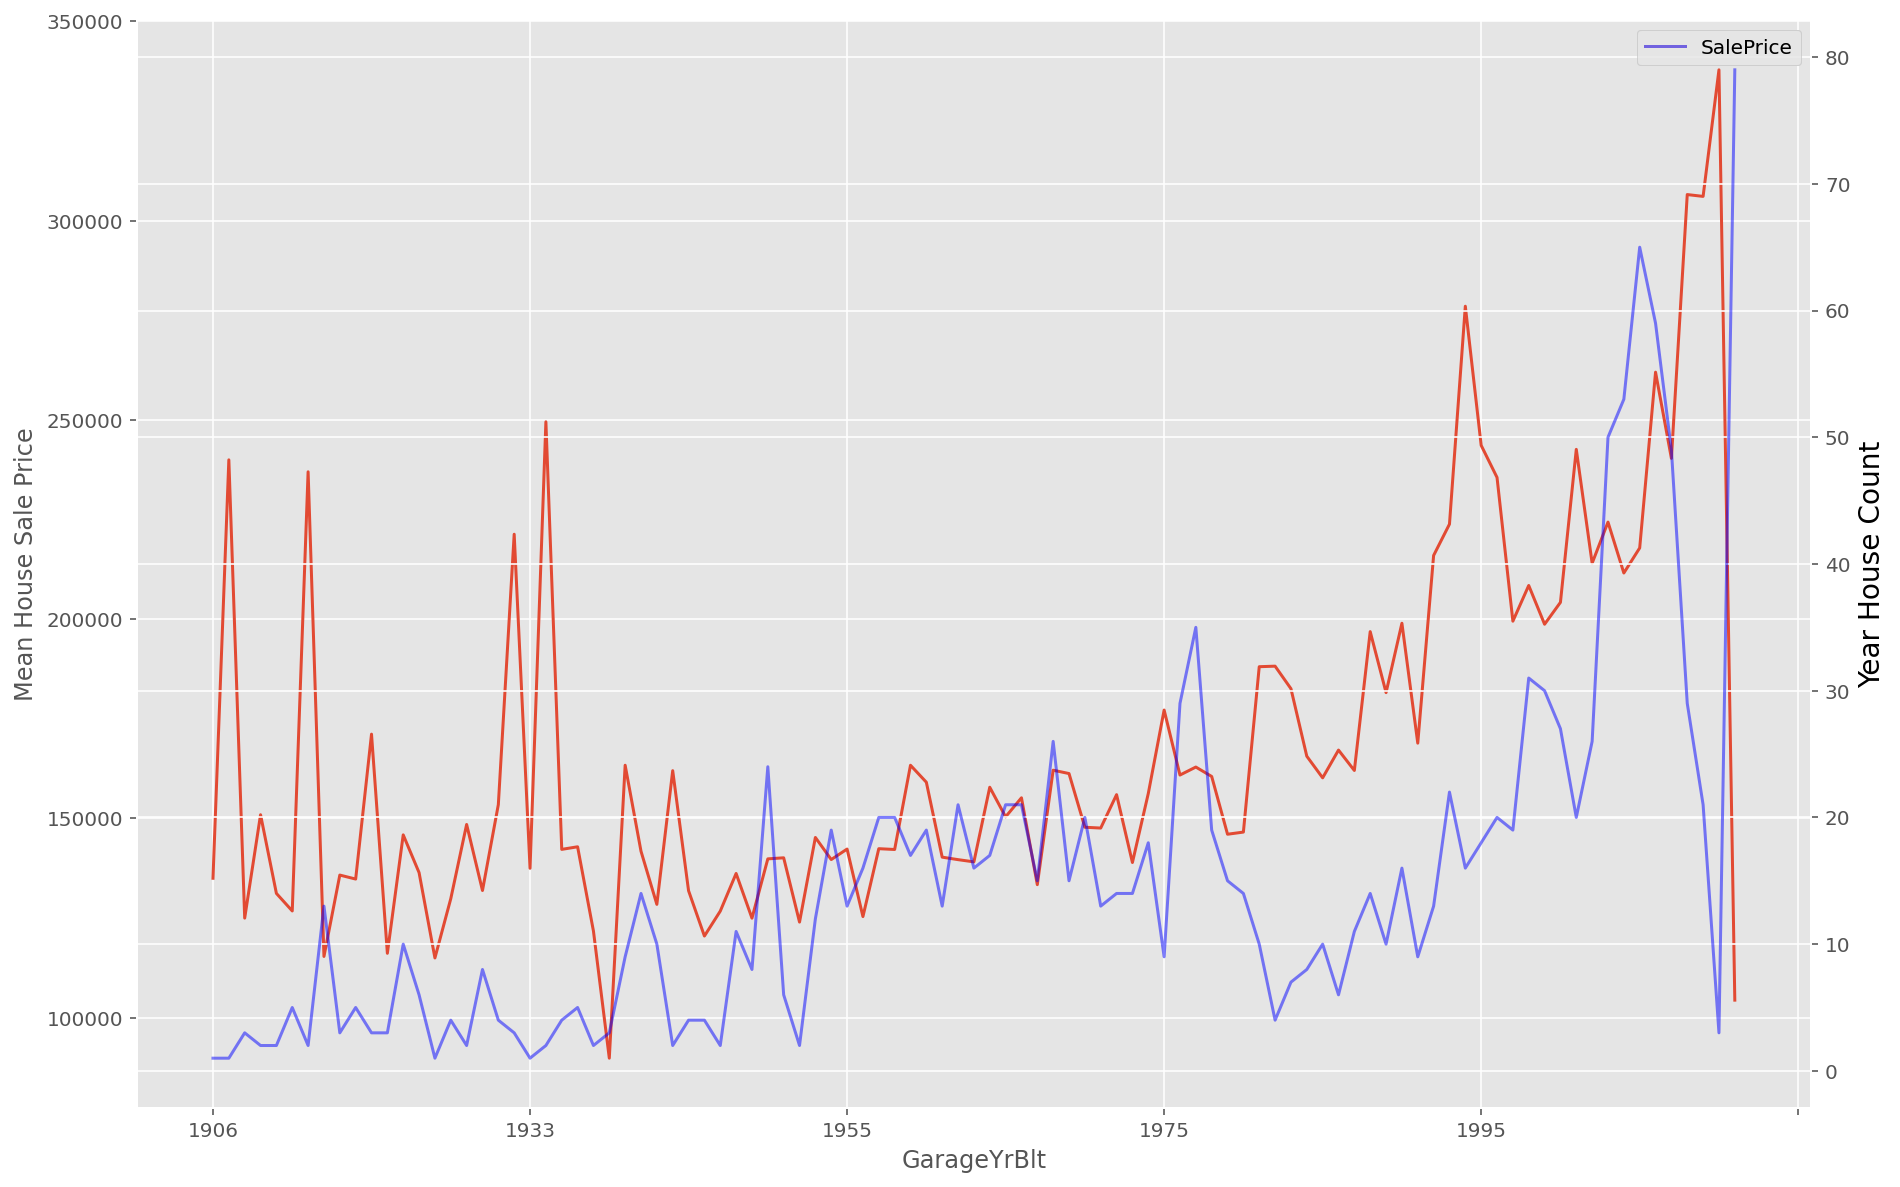

In [850]:

fig , ax = plt.subplots(figsize = (15,10))
residential_and_fixed[['GarageYrBlt' , 'SalePrice']].groupby('GarageYrBlt').mean().plot(kind = 'line', ax = ax,
                                                                                       label = 'Mean')
ax.set_ylabel('Mean House Sale Price')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
residential_and_fixed[['GarageYrBlt' , 'SalePrice']].groupby('GarageYrBlt').count().plot(kind = 'line', ax = ax2, color = 'blue',
                                                                                        label = 'Count', alpha = 0.5)
ax2.set_ylabel("Year House Count",color="black",fontsize=14)
plt.show()



in light of the above, i will change na to 0 so that year of garage build can be an integer in our model. The year of garage build clearly has an effect on sales price.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


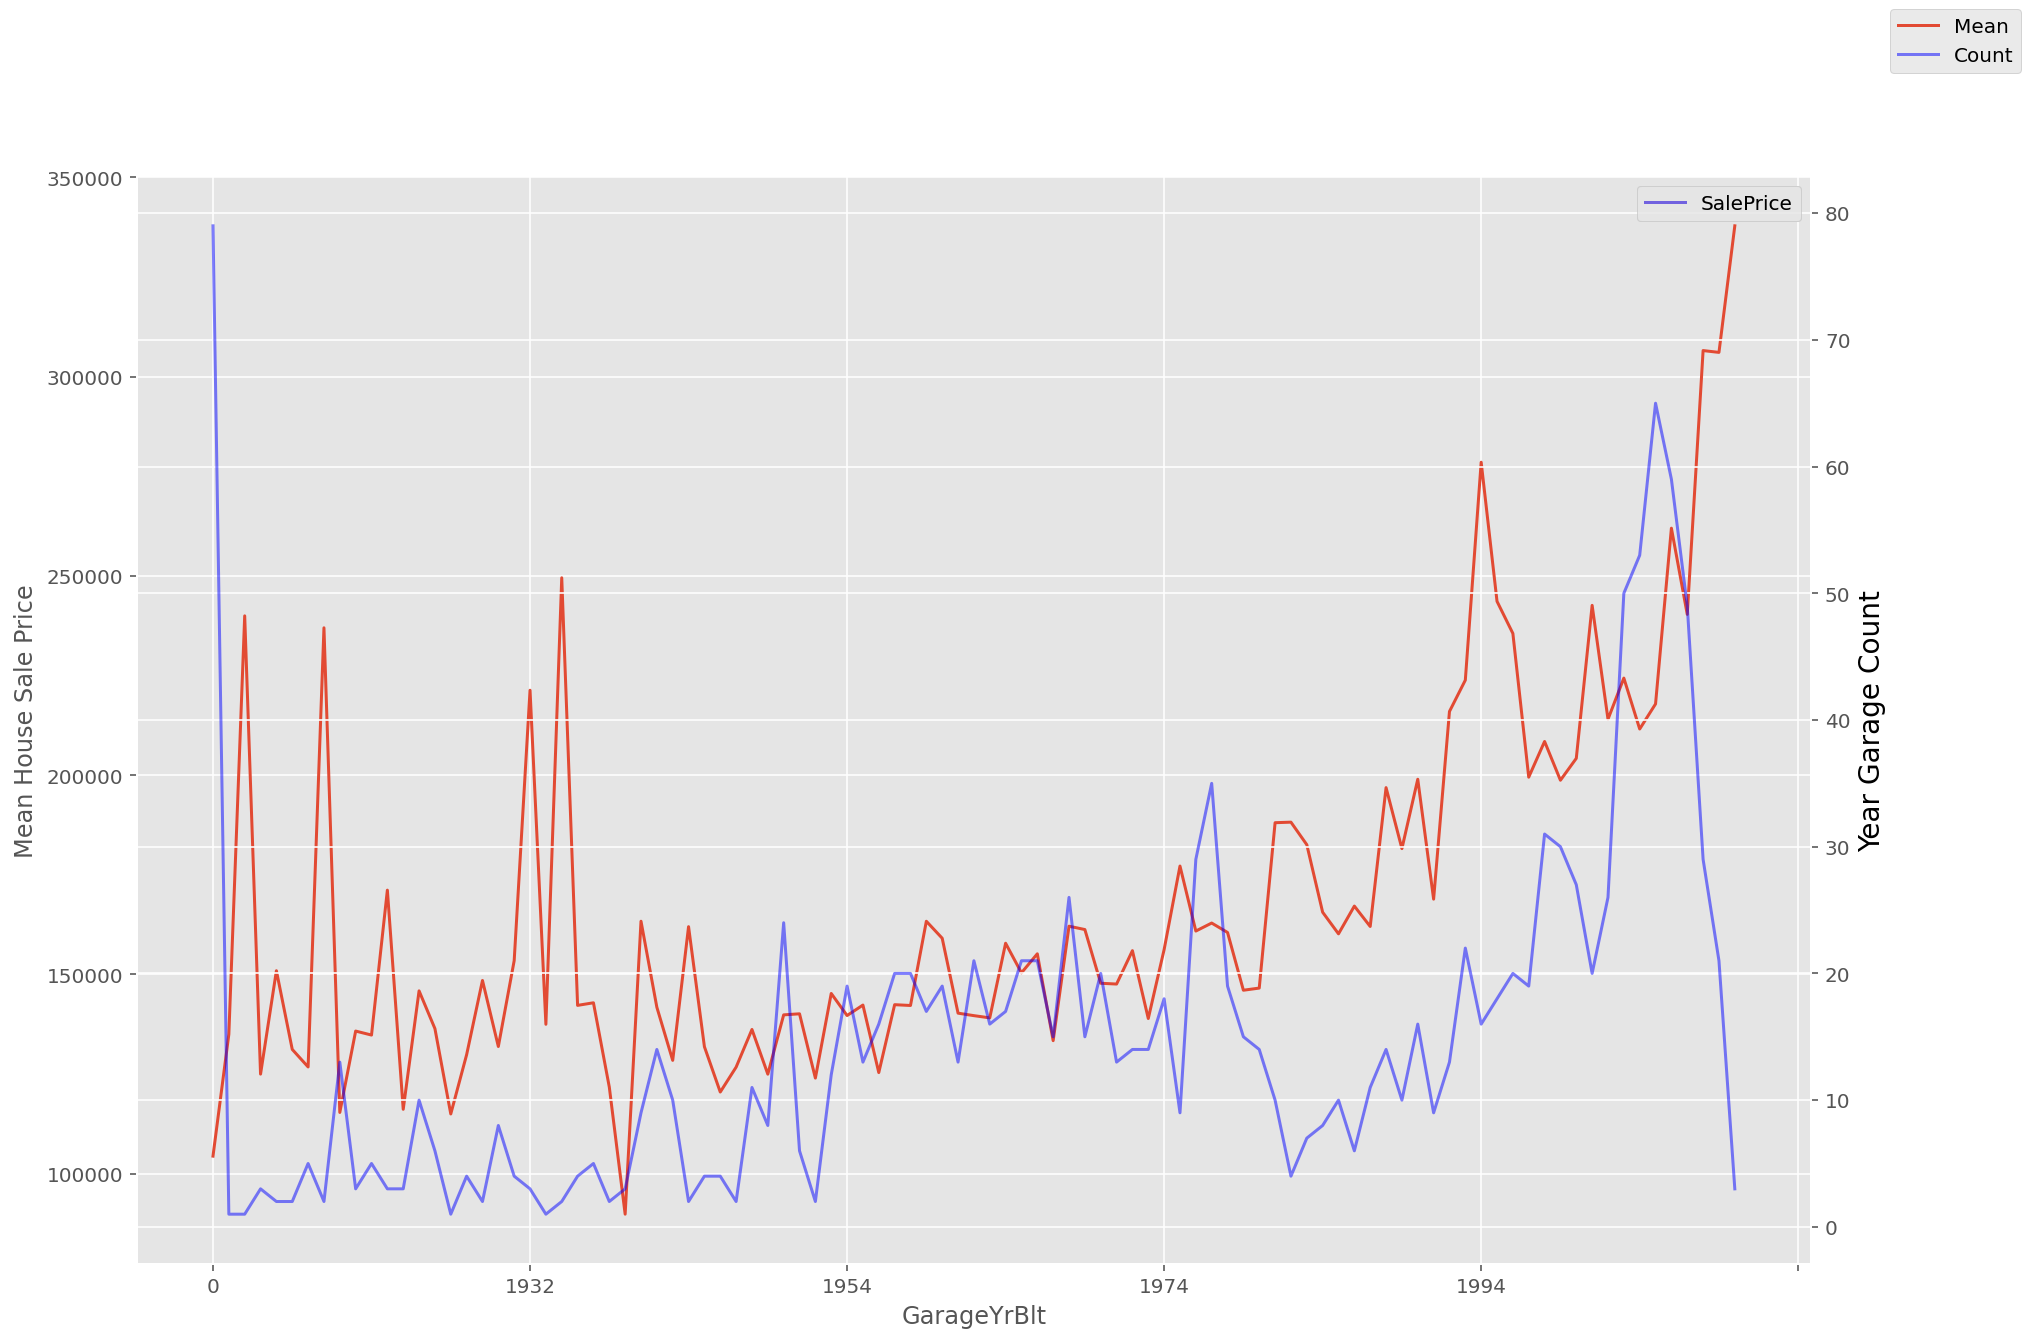

In [851]:
residential_and_fixed.GarageYrBlt = residential_and_fixed.GarageYrBlt.replace('NA', 0)

fig , ax = plt.subplots(figsize = (15,10))
residential_and_fixed[['GarageYrBlt' , 'SalePrice']].groupby('GarageYrBlt').mean().plot(kind = 'line', ax = ax,
                                                                                       label = 'Mean')
ax.set_ylabel('Mean House Sale Price')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
residential_and_fixed[['GarageYrBlt' , 'SalePrice']].groupby('GarageYrBlt').count().plot(kind = 'line', ax = ax2, color = 'blue',
                                                                                        label = 'Count', alpha = 0.5)
ax2.set_ylabel("Year Garage Count",color="black",fontsize=14)

fig.legend(['Mean', 'Count'])
plt.show()



year built will need to be categorical

In [852]:
residential_and_fixed.GarageYrBlt = residential_and_fixed.GarageYrBlt.astype(str);

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [853]:
anova_df = residential_and_fixed[['SalePrice', 'GarageYrBlt']]
grouped_anova = anova_df.groupby('GarageYrBlt')['SalePrice']
stats.f_oneway(*[grouped_anova.get_group(x) for x in residential_and_fixed['GarageYrBlt'].unique()])


F_onewayResult(statistic=9.208654704622251, pvalue=4.847868547141991e-93)

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


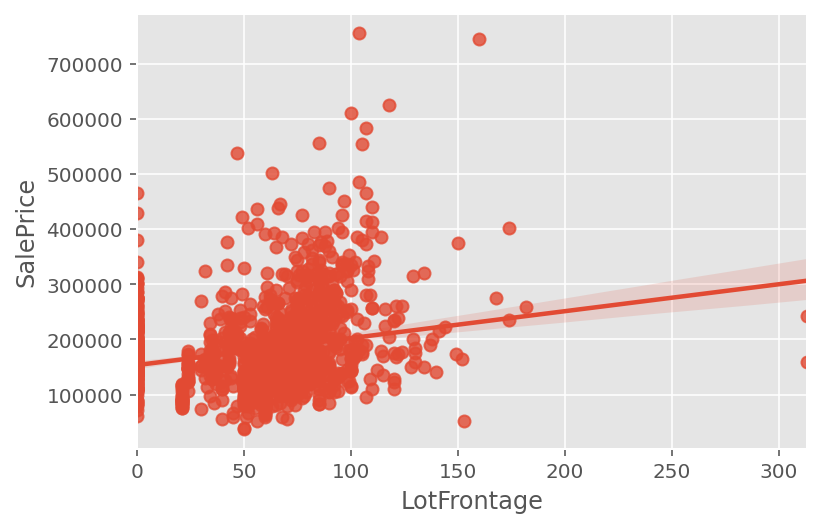

In [854]:
# LotFrontage NA to 0 then turn to int
residential_and_fixed.LotFrontage = residential_and_fixed.LotFrontage.replace('NA', 0)

residential_and_fixed.LotFrontage = residential_and_fixed.LotFrontage.astype(int)

sns.regplot(residential_and_fixed.LotFrontage , residential_and_fixed.SalePrice);

<b> correlations </b> of features with house price

In [855]:
residential_and_fixed.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
GrLivArea       0.708658
GarageCars      0.642135
GarageArea      0.629831
TotalBsmtSF     0.612088
1stFlrSF        0.603300
FullBath        0.556674
TotRmsAbvGrd    0.533355
YearBuilt       0.517602
YearRemodAdd    0.501186
2ndFlrSF        0.319774
HalfBath        0.280882
LotArea         0.264715
BsmtFullBath    0.224054
LotFrontage     0.214273
BedroomAbvGr    0.162008
PoolArea        0.092396
MoSold          0.051987
BsmtHalfBath   -0.017561
MiscVal        -0.021052
Id             -0.024353
YrSold         -0.025391
MSSubClass     -0.087487
KitchenAbvGr   -0.137825
Name: SalePrice, dtype: float64

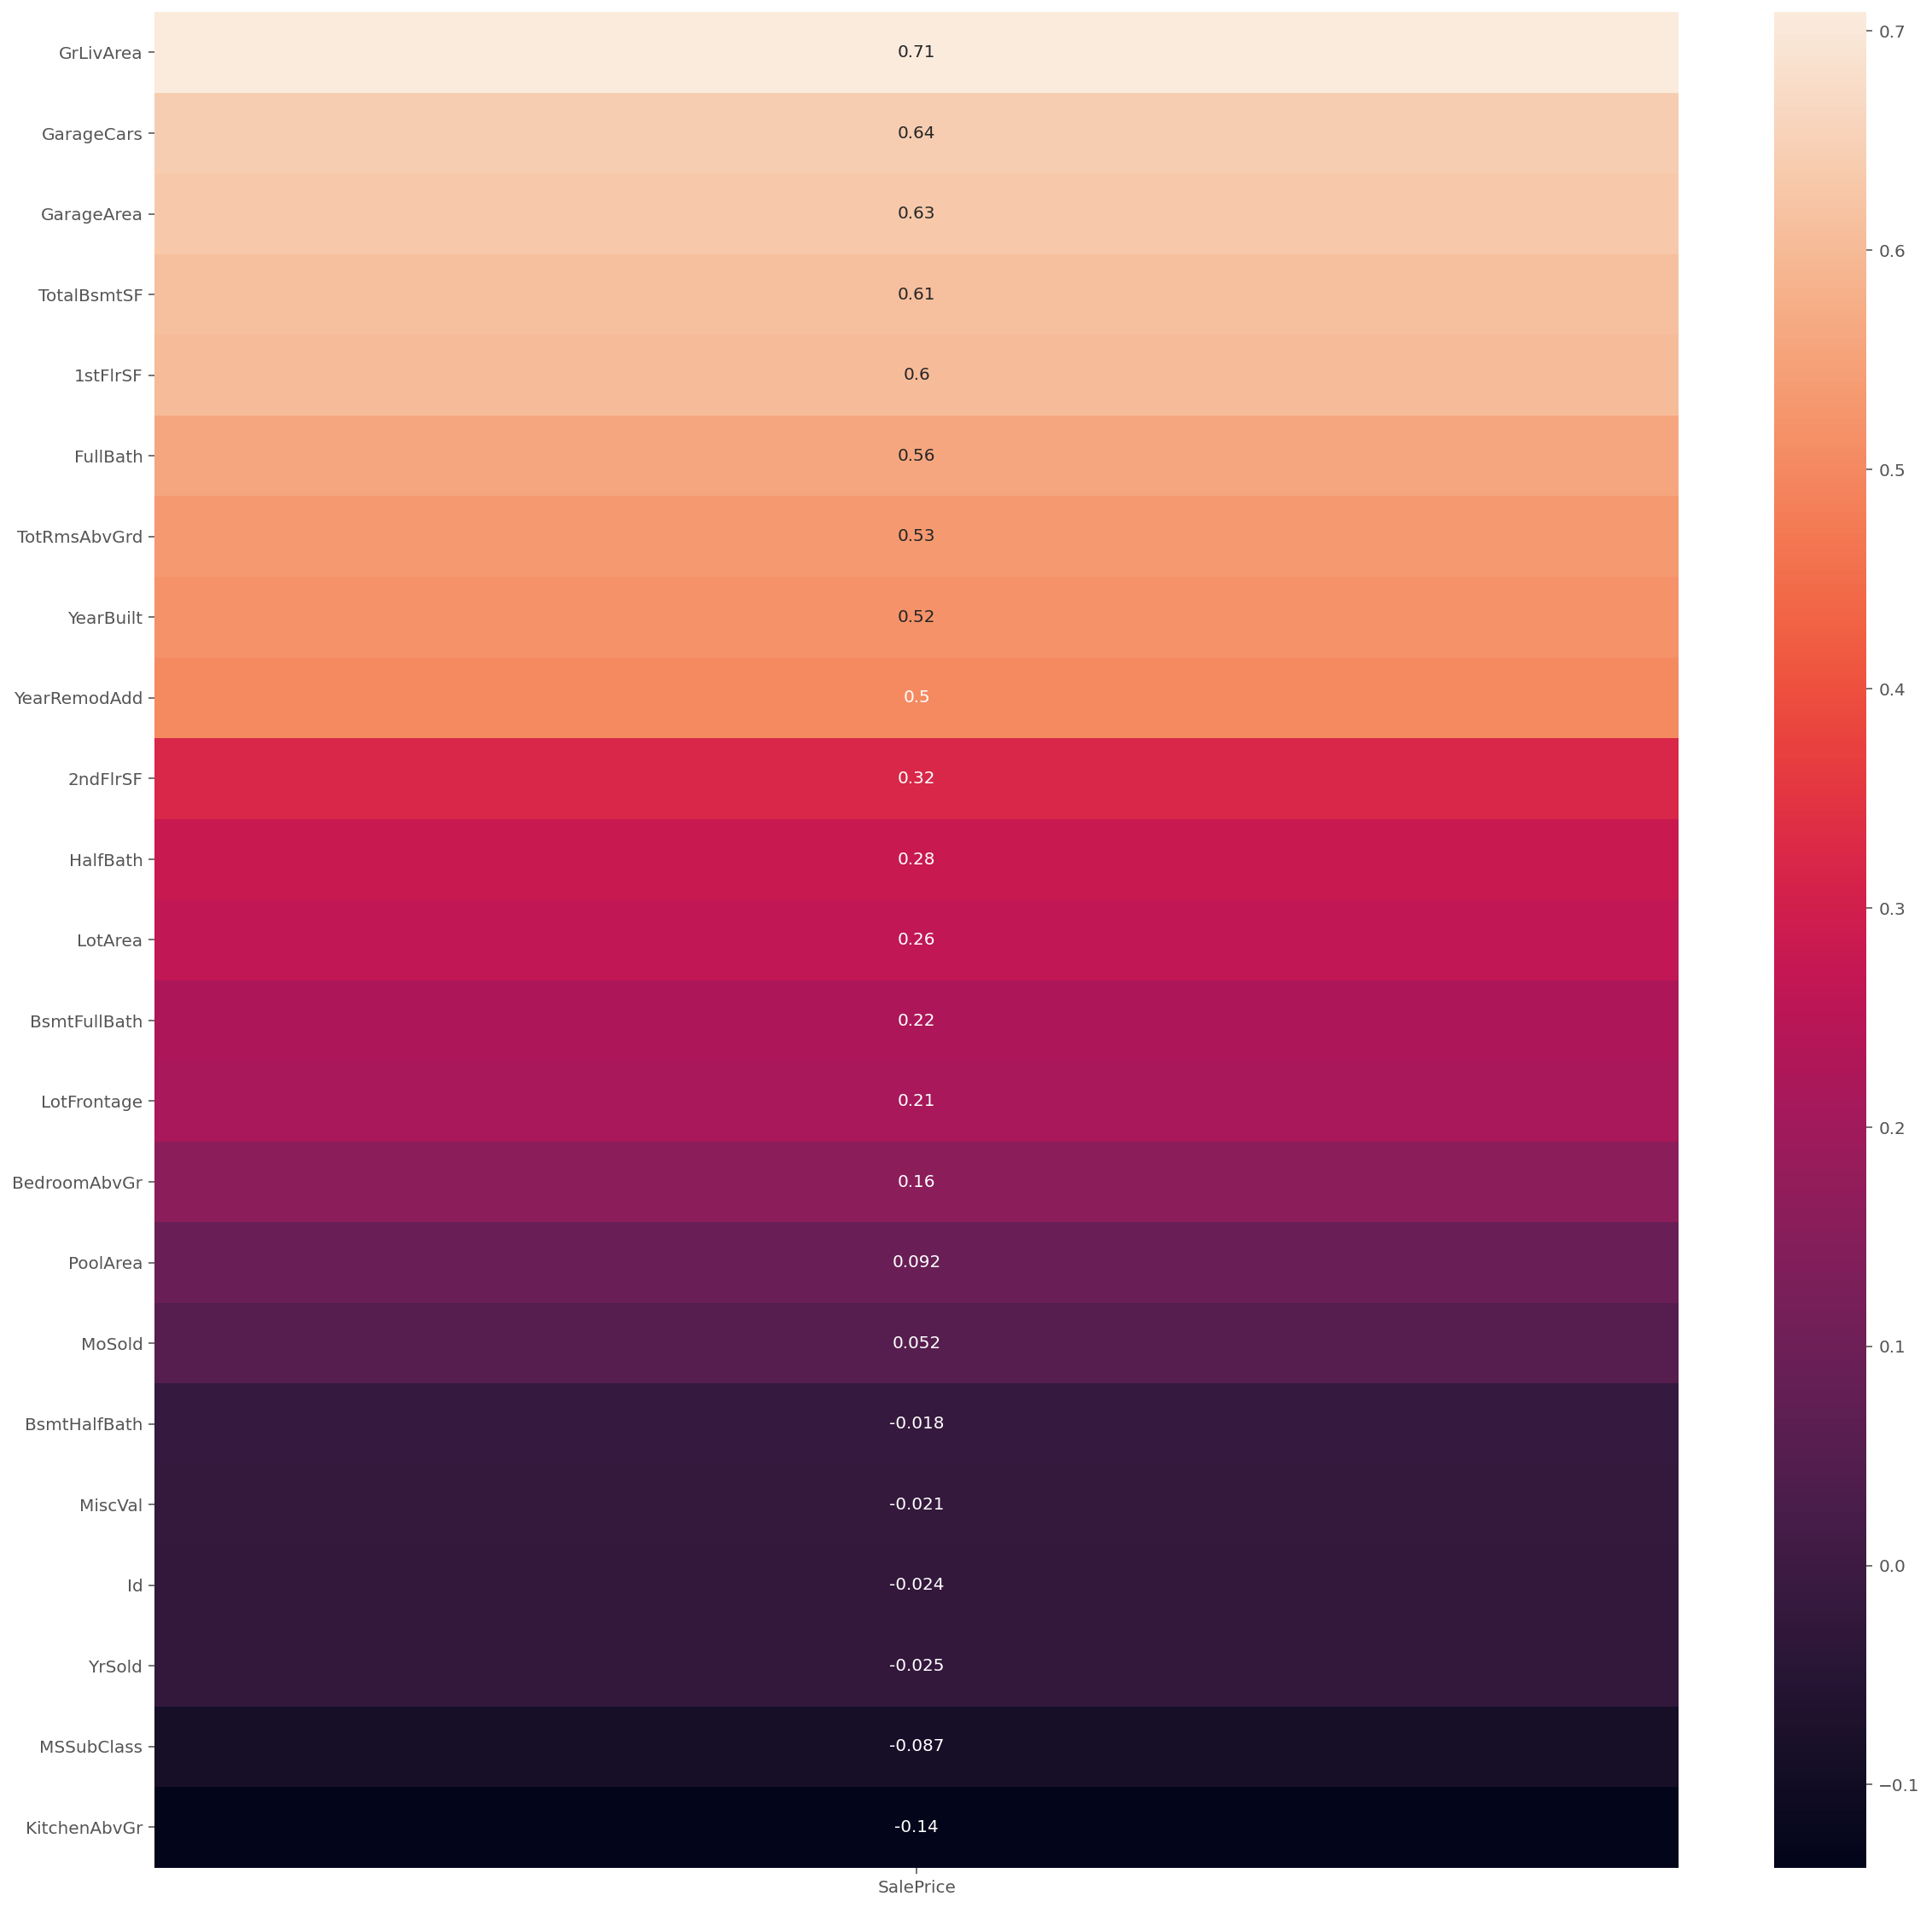

In [856]:
fig , ax = plt.subplots(figsize = (20,20))
sns.heatmap(residential_and_fixed.corr()['SalePrice'].sort_values(ascending = False)[1:].to_frame(), annot = True, ax =ax);

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


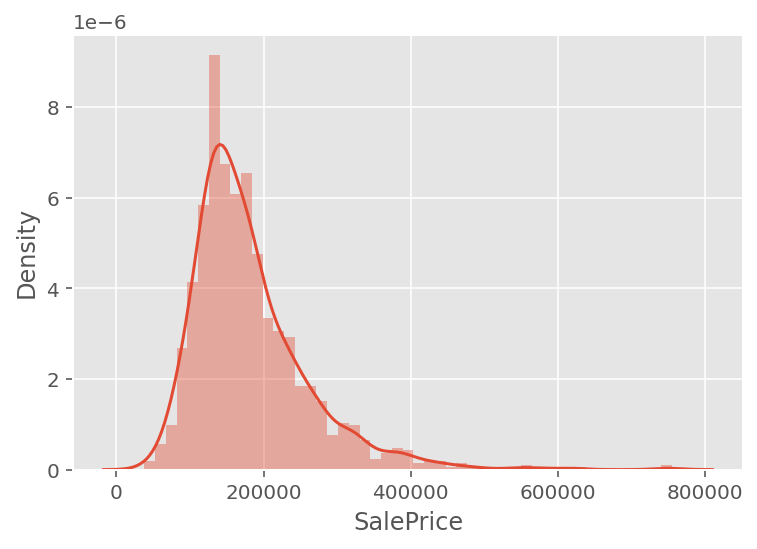

In [857]:
#distribution of sales price

sns.distplot(residential_and_fixed.SalePrice);

make the **dummy variables** for the independent variables that are an object type (categorical)

In [858]:
residential_and_fixed = pd.get_dummies(residential_and_fixed , columns = residential_and_fixed.describe(include = 'object').columns, drop_first = True)

residential_and_fixed

Id  MSSubClass  LotFrontage  LotArea  YearBuilt  YearRemodAdd  \
0        1          60           65     8450       2003          2003   
1        2          20           80     9600       1976          1976   
2        3          60           68    11250       2001          2002   
3        4          70           60     9550       1915          1970   
4        5          60           84    14260       2000          2000   
...    ...         ...          ...      ...        ...           ...   
1455  1456          60           62     7917       1999          2000   
1456  1457          20           85    13175       1978          1988   
1457  1458          70           66     9042       1941          2006   
1458  1459          20           68     9717       1950          1996   
1459  1460          20           75     9937       1965          1965   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0             856       856       854       1710             1             0   
1            1262      1262         0       1262             0             1   
2             920       920       866       1786             1             0   
3             756       961       756       1717             1             0   
4            1145      1145      1053       2198             1             0   
...           ...       ...       ...        ...           ...           ...   
1455          953       953       694       1647             0             0   
1456         1542      2073         0       2073             1             0   
1457         1152      1188      1152       2340             0             0   
1458         1078      1078         0       1078             1             0   
1459         1256      1256         0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0            2         1             3             1             8   
1            2         0             3             1             6   
2            2         1             3             1             6   
3            1         0             3             1             7   
4            2         1             4             1             9   
...        ...       ...           ...           ...           ...   
1455         2         1             3             1             7   
1456         2         0             3             1             7   
1457         2         0             4             1             9   
1458         1         0             2             1             5   
1459         1         1             3             1             6   

      GarageCars  GarageArea  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0              2         548         0        0       2    2008     208500   
1              2         460         0        0       5    2007     181500   
2              2         608         0        0       9    2008     223500   
3              3         642         0        0       2    2006     140000   
4              3         836         0        0      12    2008     250000   
...          ...         ...       ...      ...     ...     ...        ...   
1455           2         460         0        0       8    2007     175000   
1456           2         500         0        0       2    2010     210000   
1457           1         252         0     2500       5    2010     266500   
1458           1         240         0        0       4    2010     142125   
1459           1         276         0        0       6    2008     147500   

      MSZoning_Residential High Density  MSZoning_Residential Low Density  \
0                                     0                                 1   
1                                     0                                 1   
2                                     0                                 1   
3                                     0                                 1   
4      

**Train/Test Split** - split into test (post 2010) and train (pre 2010)

In [859]:

test = residential_and_fixed[residential_and_fixed['YrSold'] >= 2010]

train = residential_and_fixed[residential_and_fixed['YrSold'] < 2010]

In [860]:
test.head()
test.drop('Id', inplace = True, axis = 1)

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [861]:
train.head()

train.drop('Id', inplace = True, axis = 1)

In [862]:
target_train = train.pop('SalePrice')
x_train = train

target_test = test.pop('SalePrice')
x_test = test

In [863]:
print(target_train.shape)
print(x_train.shape)

print(target_test.shape)
x_test.shape

(1278,)
(1278, 236)
(172,)


(172, 236)

Checking that all of the columns add up

In [864]:
1278+172

1450

<u>**process:**</u>

1. standardise

2. use a Ridge and Lasso to squeeze out multcollinearity and optimise the bias/variance trade off 



Keep whichever model has the greatest r2 score, baring in mind a test score also needs to be close to the train score for good generalisation of a model!

Look at the coefficients to determine which features have the largest impact on house prices

Becuase the year built feature is non linear in its relationship with sale price, we need to test plynomial features to examine if re-engineering the data this way will enhance complexity and increase r2 score.

In [865]:
from sklearn.model_selection import cross_val_score

In [866]:
from sklearn.preprocessing import PolynomialFeatures

In [867]:
from sklearn.linear_model import LinearRegression , Ridge , RidgeCV , Lasso , LassoCV , ElasticNet, ElasticNetCV

In [868]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()

X_train_std = pd.DataFrame(SCALE.fit_transform(x_train[[x for x in x_train.columns if x != 'YearBuilt']]), columns = [x for x in x_train.columns if x != 'YearBuilt'])
X_test_std = pd.DataFrame(SCALE.transform(x_test[[x for x in x_train.columns if x != 'YearBuilt']]), columns = [x for x in x_train.columns if x != 'YearBuilt'])

There are many many features which will cuase over fitting or too much complexity, so I am not going to do an unregularised linear regression, for which I would expect negative or extremely low r2 scores.

In [869]:
# create a model that will loop through different polynomials for a polynomial features
#for each one of these, we will create a Ridge/Lasso/ElasticNet

polynomial_list = [1,2,3]


ridge_accuracy = []
ridge_test = []
ridge_cv_var = []

lasso_accuracy = []
lasso_test = []
lasso_cv_var = []

elastic_accuracy = []
elastic_test = []
elastic_cv_var = []

for n in polynomial_list:
    print('\n')
    poly = PolynomialFeatures(degree = n, include_bias = False)
    
    X_train_pf = poly.fit_transform(x_train[['YearBuilt']])
    X_test_pf = poly.fit_transform(x_test[['YearBuilt']])
    
    X_train_pf = pd.DataFrame(X_train_pf, columns = poly.get_feature_names())
    X_test_pf = pd.DataFrame(X_test_pf, columns = poly.get_feature_names())
    
    X_std = pd.DataFrame(SCALE.fit_transform(X_train_pf), columns = X_train_pf.columns)
    X_tstd = pd.DataFrame(SCALE.transform(X_test_pf), columns = X_train_pf.columns)
    
    
    X_train = pd.concat([X_std, X_train_std], axis = 1)
    X_test = pd.concat([X_tstd, X_test_std], axis = 1)
    
    #find optimal ridge alpha
    find_ridge_alpha = RidgeCV(alphas = np.logspace(-5,5,100), cv = 4)
    find_ridge_alpha.fit(X_train,target_train)
    find_ridge_alpha.alpha_
    print(f'Ridge alpha optimum for {n}: ',find_ridge_alpha.alpha_ )
    
    
    
    #results of best ridge alpha
    ridge_model = Ridge(alpha = find_ridge_alpha.alpha_)
    ridge_model.fit(X_train,target_train)
    ridge_scores = cross_val_score(ridge_model, X_train, target_train, cv = 4)
    
    ridge_accuracy.append(np.mean(ridge_scores))
    ridge_test.append(ridge_model.score(X_test, target_test))
    ridge_cv_var.append(np.var(ridge_scores))
    
    print(f'Ridge Training Accuracy for poly of {n}: ', ridge_model.score(X_train, target_train))
    print(f'Ridge Testing Accuracy for poly of {n}: ', ridge_model.score(X_test, target_test))
    print(f'Ridge Training Accuracy mean for poly of {n}: ', np.mean(ridge_scores))
    print(f'Ridge Training Accuracy variance for poly of {n}: ', np.var(ridge_scores))
    
    
    #find optimal lasso alpha
    find_lasso_alpha = LassoCV(alphas = np.logspace(-5,5,100), cv = 4)
    find_lasso_alpha.fit(X_train,target_train)
    find_lasso_alpha.alpha_
    print(f'Lasso alpha optimum for {n}: ',find_lasso_alpha.alpha_ )
    
    
    
    #results of best lasso alpha
    lasso_model = Lasso(alpha = find_lasso_alpha.alpha_)
    lasso_model.fit(X_train,target_train)
    lasso_scores = cross_val_score(lasso_model, X_train, target_train, cv = 4)
    
    lasso_accuracy.append(np.mean(lasso_scores))
    lasso_test.append(lasso_model.score(X_test, target_test))
    lasso_cv_var.append(np.var(lasso_scores))
    
    print(f'Lasso Training Accuracy for poly of {n}: ', lasso_model.score(X_train, target_train))
    print(f'Lasso Testing Accuracy for poly of {n}: ', lasso_model.score(X_test, target_test))
    print(f'Lasso Training Accuracy mean for poly of {n}: ', np.mean(lasso_scores))
    print(f'Lasso Training Accuracy variance for poly of {n}: ', np.var(lasso_scores))
    
    
    #find optimal ElasticNet alpha / l1_ratio
    find_elastic_alpha = ElasticNetCV(alphas = np.logspace(-5,5,100), cv = 4)
    find_elastic_alpha.fit(X_train,target_train)
    find_elastic_alpha.alpha_
    print(f'Elastic alpha optimum for {n}: ',find_elastic_alpha.alpha_ )
    print(f'Elastic l1_ratio optimum for {n}: ',find_elastic_alpha.l1_ratio_ )
    
    
    #results of best elastic alpha/ l1_ratio
    elastic_model = ElasticNet(alpha = find_elastic_alpha.alpha_, l1_ratio = find_elastic_alpha.l1_ratio_)
    elastic_model.fit(X_train,target_train)
    elastic_scores = cross_val_score(elastic_model, X_train, target_train, cv = 4)
    
    elastic_accuracy.append(np.mean(elastic_scores))
    elastic_test.append(elastic_model.score(X_test, target_test))
    elastic_cv_var.append(np.var(elastic_scores))
    
    print(f'Elastic Training Accuracy for poly of {n}: ', elastic_model.score(X_train, target_train))
    print(f'Elastic Testing Accuracy for poly of {n}: ', elastic_model.score(X_test, target_test))
    print(f'Elastic Training Accuracy mean for poly of {n}: ', np.mean(elastic_scores))
    print(f'Elastic Training Accuracy variance for poly of {n}: ', np.var(elastic_scores))
    print('\n')
    
polyoverview = pd.DataFrame({
    'ridge_accuracy': ridge_accuracy,'ridge_test':ridge_test,'ridge_cv_var':ridge_cv_var,

'lasso_accuracy':lasso_accuracy,
'lasso_test':lasso_test,
'lasso_cv_var':lasso_cv_var,

'elastic_accuracy':elastic_accuracy,
'elastic_test':elastic_test,
'elastic_cv_var':elastic_cv_var,
}, index = [x for x in range(1,len(polynomial_list)+1)])

polyoverview



Ridge alpha optimum for 1:  376.49358067924635
Ridge Training Accuracy for poly of 1:  0.8577123380287658
Ridge Testing Accuracy for poly of 1:  0.8453359411124413
Ridge Training Accuracy mean for poly of 1:  0.7770734520471185
Ridge Training Accuracy variance for poly of 1:  0.004063589020746843


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687581048.4943848, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1152890841.7646484, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1186742095.4638672, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924349991.6079102, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924260723.0821533, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924190018.0512695, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923759180.6359863, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923843504.4067383, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923797915.6968994, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69456912985.90674, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69462246638.90735, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69466305770.94019, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86591573239.79663, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78108065976.86914, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85323601658.81104, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110843574113.45312, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110865019411.8736, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110882373858.3042, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101353224305.83887, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102558852182.22485, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103486629388.18976, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106662552688.29443, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106663842473.79291, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106664868164.36285, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

Lasso alpha optimum for 1:  1519.9110829529332
Lasso Training Accuracy for poly of 1:  0.8376004186289778
Lasso Testing Accuracy for poly of 1:  0.8486561495115454
Lasso Training Accuracy mean for poly of 1:  0.7732481854515585
Lasso Training Accuracy variance for poly of 1:  0.0052359006574117265


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609899288.3886719, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18993402101.632385, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114181724681.72125, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308495493923.4882, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308479652275.1074, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308467073804.42725, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235086373349.83673, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235079862070.83646, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235074923322.1499, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260674763703.31268, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260656382118.02444, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260641805970.75742, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

Elastic alpha optimum for 1:  0.7054802310718645
Elastic l1_ratio optimum for 1:  0.5
Elastic Training Accuracy for poly of 1:  0.8536529081278577
Elastic Testing Accuracy for poly of 1:  0.8441996567498911
Elastic Training Accuracy mean for poly of 1:  0.7770010454506988
Elastic Training Accuracy variance for poly of 1:  0.004166767525734682




Ridge alpha optimum for 2:  376.49358067924635
Ridge Training Accuracy for poly of 2:  0.8578652663832121
Ridge Testing Accuracy for poly of 2:  0.8455150297796271
Ridge Training Accuracy mean for poly of 2:  0.777277909689331
Ridge Training Accuracy variance for poly of 2:  0.004042338638159428


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 683933844.1560059, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1163720387.4589844, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1202382782.8625488, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297284636767.31085, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299605482303.561, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301455214265.8029, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308761044888.5078, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308766366035.9806, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308770588524.9794, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234543501075.7737, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234635001395.24063, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234706989418.00354, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1001971725.4541016, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1205583946.6759033, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12642366413.140137, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258439071027.59247, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258849346124.62152, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259176315611.51608, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260404517702.77493, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260402801289.8874, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260400935103.43268, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281275604093.81055, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281660568440.89886, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281967510869.3622, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283142421518.4885, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(


Lasso alpha optimum for 2:  1519.9110829529332
Lasso Training Accuracy for poly of 2:  0.8376002615624157
Lasso Testing Accuracy for poly of 2:  0.8486766919805762
Lasso Training Accuracy mean for poly of 2:  0.7732486059683413
Lasso Training Accuracy variance for poly of 2:  0.005235283327208118


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18800828157.054993, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113700424151.76666, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219929950231.0588, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308861092911.0281, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308847894258.23035, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308837296884.1696, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235190554203.52533, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235171806184.23636, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5242199543.038208, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260613954420.86765, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260594540618.514, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4207995779.5253906, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283229888506.1597, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(


Elastic alpha optimum for 2:  0.7054802310718645
Elastic l1_ratio optimum for 2:  0.5
Elastic Training Accuracy for poly of 2:  0.8538145096109362
Elastic Testing Accuracy for poly of 2:  0.8443973321508944
Elastic Training Accuracy mean for poly of 2:  0.7772117918203231
Elastic Training Accuracy variance for poly of 2:  0.0041479749240589375




Ridge alpha optimum for 3:  376.49358067924635
Ridge Training Accuracy for poly of 3:  0.8579021694396471
Ridge Testing Accuracy for poly of 3:  0.8455463744124859
Ridge Training Accuracy mean for poly of 3:  0.7773084811633975
Ridge Training Accuracy variance for poly of 3:  0.0040288506688847935


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732092124.0859375, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 804458123.876709, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 659338973.3551025, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/si

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295463176838.70435, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297952784364.0116, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299972692354.3517, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308726552833.3027, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308736240530.90497, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308744127312.17065, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230044772814.6442, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230946248160.3324, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231675928134.0517, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234714143990.94385, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234714588362.85886, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234714545188.14008, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244956506814.3569, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247879920466.56326, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250244890106.87402, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260253342331.4279, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260261676777.28964, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260268125647.93564, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273745763534.78912, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275523325560.75653, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276961777880.2076, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283046941522.0305, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283051905530.63525, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283055745191.9616, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

Lasso alpha optimum for 3:  1519.9110829529332
Lasso Training Accuracy for poly of 3:  0.8376021223806576
Lasso Testing Accuracy for poly of 3:  0.8486996197069662
Lasso Training Accuracy mean for poly of 3:  0.773255831429745
Lasso Training Accuracy variance for poly of 3:  0.00523347532592067


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947362436.2227783, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18759264682.38214, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113501489101.31744, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308873519366.7948, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308855695592.6894, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308841411519.82404, tolerance: 604851126.1871065
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235069883674.23273, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235039695590.505, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235012888735.81076, tolerance: 545784780.4133198
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260551382693.81802, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260523139277.30795, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260499018570.7282, tolerance: 645221084.2404919
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283190707059.5308, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283182733122.52625, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283175354046.17694, tolerance: 600062433.2016125
  model = cd_fast.enet_coordinate_descent_gram(


Elastic alpha optimum for 3:  0.7054802310718645
Elastic l1_ratio optimum for 3:  0.5
Elastic Training Accuracy for poly of 3:  0.8538525204130051
Elastic Testing Accuracy for poly of 3:  0.8444371032179219
Elastic Training Accuracy mean for poly of 3:  0.7772499553734747
Elastic Training Accuracy variance for poly of 3:  0.004136134225596552




ridge_accuracy  ridge_test  ridge_cv_var  lasso_accuracy  lasso_test  \
1        0.777073    0.845336      0.004064        0.773248    0.848656   
2        0.777278    0.845515      0.004042        0.773249    0.848677   
3        0.777308    0.845546      0.004029        0.773256    0.848700   

   lasso_cv_var  elastic_accuracy  elastic_test  elastic_cv_var  
1      0.005236          0.777001      0.844200        0.004167  
2      0.005235          0.777212      0.844397        0.004148  
3      0.005233          0.777250      0.844437        0.004136

**The best feature is the ploynomial 3, with a ridge model.**


polyfeatures on the year built column

In [870]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
    
X_train_pf = poly.fit_transform(x_train[['YearBuilt']])
X_test_pf = poly.fit_transform(x_test[['YearBuilt']])

X_train_pf = pd.DataFrame(X_train_pf, columns = poly.get_feature_names())
X_test_pf = pd.DataFrame(X_test_pf, columns = poly.get_feature_names())

X_std = pd.DataFrame(SCALE.fit_transform(X_train_pf), columns = X_train_pf.columns)
X_tstd = pd.DataFrame(SCALE.transform(X_test_pf), columns = X_train_pf.columns)


X_train_std = pd.concat([X_std, X_train_std], axis = 1)
X_test_std = pd.concat([X_tstd, X_test_std], axis = 1)

Visualise the dataframe

In [871]:
X_train_std

x0      x0^2      x0^3  MSSubClass  LotFrontage   LotArea  \
0     1.038568  1.044051  1.049444    0.075177     0.218265 -0.202915   
1     0.146572  0.139714  0.132804   -0.880802     0.650287 -0.092329   
2     0.972494  0.976642  0.980689    0.075177     0.304669  0.066337   
3    -1.868678 -1.858233 -1.847666    0.314171     0.074257 -0.097137   
4     0.939457  0.942963  0.946364    0.075177     0.765493  0.355783   
...        ...       ...       ...         ...          ...       ...   
1273  1.104642  1.111527  1.118335    2.943113    -0.645780 -0.662086   
1274  1.137679  1.145290  1.152832   -0.880802     0.938302  0.640133   
1275  1.071605  1.077781  1.083872   -0.880802     0.131860 -0.294268   
1276  0.906421  0.909301  0.912073    0.075177     0.131860 -0.254169   
1277 -0.216834 -0.225202 -0.233539   -0.880802     0.506280 -0.059923   

      YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0         0.875532    -0.460408 -0.796427  1.148046   0.356109      1.129289   
1        -0.436226     0.457066  0.252007 -0.803350  -0.492294     -0.802748   
2         0.826948    -0.315782 -0.631156  1.175466   0.500035      1.129289   
3        -0.727728    -0.686387 -0.525280  0.924115   0.369366      1.129289   
4         0.729781     0.192671 -0.050127  1.602762   1.280263      1.129289   
...            ...          ...       ...       ...        ...           ...   
1273      0.972699    -1.158682 -0.238639 -0.803350  -0.852108      1.129289   
1274      1.021283     0.181372 -0.063039 -0.803350  -0.723332     -0.802748   
1275      0.972699     0.364415  0.146131 -0.803350  -0.569938      1.129289   
1276      0.729781    -0.241209 -0.545939  0.782445   0.236803     -0.802748   
1277     -0.970646     0.443507  0.236513 -0.803350  -0.503657      1.129289   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.251787  0.776644  1.218379      0.162086     -0.205061   
1         3.770504  0.776644 -0.765173      0.162086     -0.205061   
2        -0.251787  0.776644  1.218379      0.162086     -0.205061   
3        -0.251787 -1.041215 -0.765173      0.162086     -0.205061   
4        -0.251787  0.776644  1.218379      1.387801     -0.205061   
...            ...       ...       ...           ...           ...   
1273     -0.251787 -1.041215 -0.765173     -1.063629     -0.205061   
1274     -0.251787 -1.041215 -0.765173      0.162086     -0.205061   
1275     -0.251787  0.776644 -0.765173     -1.063629     -0.205061   
1276     -0.251787  0.776644  1.218379      0.162086     -0.205061   
1277     -0.251787 -1.041215  1.218379      0.162086     -0.205061   

      TotRmsAbvGrd  GarageCars  GarageArea  PoolArea  MiscVal    MoSold  \
0         0.910241    0.292575    0.333297 -0.073445 -0.07563 -1.687780   
1        -0.322709    0.292575   -0.074931 -0.073445 -0.07563 -0.581824   
2        -0.322709    0.292575    0.611635 -0.073445 -0.07563  0.892784   
3         0.293766    1.627973    0.769360 -0.073445 -0.07563 -1.687780   
4         1.526715    1.627973    1.669319 -0.073445 -0.07563  1.998740   
...            ...         ...         ...       ...      ...       ...   
1273     -0.939183    0.292575    0.226601 -0.073445 -0.07563 -0.581824   
1274     -0.322709   -2.378220   -2.208854 -0.073445 -0.07563  0.155480   
1275     -0.322709    0.292575   -0.353269 -0.073445 -0.07563  1.261436   
1276      0.293766    0.292575   -0.074931 -0.073445 -0.07563  0.524132   
1277     -0.322709   -1.042822   -0.928500 -0.073445 -0.07563 -0.213172   

        YrSold  MSZoning_Residential High Density  \
0     0.428763                          -0.112598   
1    -0.460781                          -0.112598   
2     0.428763                          -0.112598   
3    -1.350325                          -0.112598   
4     0.428763                          -0.112598   
...        ...                                ...   
1273 -1.350325                          -0.112598   
1274 -1.

Run the ridge regression model with the optimised alpha

In [872]:

ridge_find_alpha = RidgeCV(alphas = np.logspace(-5,5,100), cv = 4)
ridge_find_alpha.fit(X_train_std, target_train)
print(ridge_find_alpha.alpha_)

ridge_model = Ridge(alpha = ridge_find_alpha.alpha_)
ridge_model.fit(X_train_std,target_train)

coefs = pd.DataFrame({'Feature': X_train_std.columns,
                     'coef': ridge_model.coef_})

coefs['absoloute'] = abs(coefs.coef)
#the coefs will show what fixed feature you can change for the highest returns!



376.49358067924635


Below are the first models' total residuals, <b> this is for part two</b>

In [873]:


total_std_df_x = pd.concat([X_train_std,X_test_std], axis = 0)

total_std_df_y = pd.concat([target_train,target_test],axis = 0)

resids = total_std_df_y - ridge_model.predict(total_std_df_x)

sum(resids)

295362.7153471301

individual residuals for using the residuals as targets <b>for the last part of part two </b>

In [874]:

fixed_train_resids = target_train - ridge_model.predict(X_train_std)
fixed_test_resids = target_test - ridge_model.predict(X_test_std)

Coefficient table for the best model of this section (no polynomial features in a ridge model)

In [875]:
#sorting coef table
coefs.sort_values(by = 'absoloute', ascending = False).head(10)

Feature          coef     absoloute
10              GrLivArea  11430.206480  11430.206480
57   Neighborhood_NridgHt   9135.373083   9135.373083
8                1stFlrSF   8525.202531   8525.202531
56   Neighborhood_NoRidge   7313.348734   7313.348734
7             TotalBsmtSF   7255.888478   7255.888478
103      RoofMatl_WdShngl   7164.930782   7164.930782
18             GarageCars   6847.906313   6847.906313
9                2ndFlrSF   6442.095110   6442.095110
219             PoolQC_Gd  -6341.527734   6341.527734
63   Neighborhood_StoneBr   6100.720658   6100.720658

all pool features seem to negatively correlate with the price, potentially becuase there were not many datapoints with pools in the first place and they could have ended up in the testing dataset and not the training!

In [876]:
coefs[(coefs['Feature'].str.contains('PoolQC')==True)]


Feature         coef    absoloute
218  PoolQC_Fa -2116.673762  2116.673762
219  PoolQC_Gd -6341.527734  6341.527734
220  PoolQC_NA -1447.563504  1447.563504

In [877]:
x_train.describe()['GrLivArea'][2]

528.2574296108378

In [878]:
target_train.describe()

count      1278.000000
mean     181989.782473
std       79095.208573
min       37900.000000
25%      130000.000000
50%      164945.000000
75%      214375.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [879]:
X_train_std['PoolQC_Gd'].unique()[1]

20.615528128088304

In [880]:
X_train_std['Neighborhood_NridgHt'].value_counts()

-0.238897    1209
 4.185898      69
Name: Neighborhood_NridgHt, dtype: int64

<b>Evaluation of the mean dollar values for the renovations (coefficients)</b>

example: for every one standard deviation of ground living area, the dollar price of the house will increase by $11 430.

for a binary feature, such as Neighborhood_NridgHt, when the house presence is in this area increases by one standard deviation, the price of the house sale is higher by $9135. This is not a very intuitive way of looking at it. You can get the unit change of having a house in Neighborhood_NridgHt by multiplying its standardised value for a value of 1 (yes) * the coefficient of the feature. This number will tell you the effect of SalePrice when Neighborhood_NridgHt = 1 (yes). 

For NridgHt this would result in $38,238.


alternatively for continuous features: if you divide 11 430 by the standard devaition of the origional training data (528) then you reduce the std unit and get the price difference for every unit increase in ground living area (which is $21.6)

These changes will be shown in the following table...


In [881]:

X_train_std

x0      x0^2      x0^3  MSSubClass  LotFrontage   LotArea  \
0     1.038568  1.044051  1.049444    0.075177     0.218265 -0.202915   
1     0.146572  0.139714  0.132804   -0.880802     0.650287 -0.092329   
2     0.972494  0.976642  0.980689    0.075177     0.304669  0.066337   
3    -1.868678 -1.858233 -1.847666    0.314171     0.074257 -0.097137   
4     0.939457  0.942963  0.946364    0.075177     0.765493  0.355783   
...        ...       ...       ...         ...          ...       ...   
1273  1.104642  1.111527  1.118335    2.943113    -0.645780 -0.662086   
1274  1.137679  1.145290  1.152832   -0.880802     0.938302  0.640133   
1275  1.071605  1.077781  1.083872   -0.880802     0.131860 -0.294268   
1276  0.906421  0.909301  0.912073    0.075177     0.131860 -0.254169   
1277 -0.216834 -0.225202 -0.233539   -0.880802     0.506280 -0.059923   

      YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0         0.875532    -0.460408 -0.796427  1.148046   0.356109      1.129289   
1        -0.436226     0.457066  0.252007 -0.803350  -0.492294     -0.802748   
2         0.826948    -0.315782 -0.631156  1.175466   0.500035      1.129289   
3        -0.727728    -0.686387 -0.525280  0.924115   0.369366      1.129289   
4         0.729781     0.192671 -0.050127  1.602762   1.280263      1.129289   
...            ...          ...       ...       ...        ...           ...   
1273      0.972699    -1.158682 -0.238639 -0.803350  -0.852108      1.129289   
1274      1.021283     0.181372 -0.063039 -0.803350  -0.723332     -0.802748   
1275      0.972699     0.364415  0.146131 -0.803350  -0.569938      1.129289   
1276      0.729781    -0.241209 -0.545939  0.782445   0.236803     -0.802748   
1277     -0.970646     0.443507  0.236513 -0.803350  -0.503657      1.129289   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.251787  0.776644  1.218379      0.162086     -0.205061   
1         3.770504  0.776644 -0.765173      0.162086     -0.205061   
2        -0.251787  0.776644  1.218379      0.162086     -0.205061   
3        -0.251787 -1.041215 -0.765173      0.162086     -0.205061   
4        -0.251787  0.776644  1.218379      1.387801     -0.205061   
...            ...       ...       ...           ...           ...   
1273     -0.251787 -1.041215 -0.765173     -1.063629     -0.205061   
1274     -0.251787 -1.041215 -0.765173      0.162086     -0.205061   
1275     -0.251787  0.776644 -0.765173     -1.063629     -0.205061   
1276     -0.251787  0.776644  1.218379      0.162086     -0.205061   
1277     -0.251787 -1.041215  1.218379      0.162086     -0.205061   

      TotRmsAbvGrd  GarageCars  GarageArea  PoolArea  MiscVal    MoSold  \
0         0.910241    0.292575    0.333297 -0.073445 -0.07563 -1.687780   
1        -0.322709    0.292575   -0.074931 -0.073445 -0.07563 -0.581824   
2        -0.322709    0.292575    0.611635 -0.073445 -0.07563  0.892784   
3         0.293766    1.627973    0.769360 -0.073445 -0.07563 -1.687780   
4         1.526715    1.627973    1.669319 -0.073445 -0.07563  1.998740   
...            ...         ...         ...       ...      ...       ...   
1273     -0.939183    0.292575    0.226601 -0.073445 -0.07563 -0.581824   
1274     -0.322709   -2.378220   -2.208854 -0.073445 -0.07563  0.155480   
1275     -0.322709    0.292575   -0.353269 -0.073445 -0.07563  1.261436   
1276      0.293766    0.292575   -0.074931 -0.073445 -0.07563  0.524132   
1277     -0.322709   -1.042822   -0.928500 -0.073445 -0.07563 -0.213172   

        YrSold  MSZoning_Residential High Density  \
0     0.428763                          -0.112598   
1    -0.460781                          -0.112598   
2     0.428763                          -0.112598   
3    -1.350325                          -0.112598   
4     0.428763                          -0.112598   
...        ...                                ...   
1273 -1.350325                          -0.112598   
1274 -1.

In [882]:
#creating a loop that goes through the values and updates the coef so that it reflects one unit change

unit_values = []
for x in coefs.Feature:
    try:
        if '_' in x:

            #all the dummies contain an underscore
            #to get the unit value of a binary, you need to multiply its coefficient by its standardised value
            unit_values.append(list(coefs['coef'])[list(coefs.Feature).index(x)] * X_train_std[x].unique()[1])

        else:
            #else its not a dummy and will be continuous so you can get the unit value changes by dividing by std 
            #of that feature
            unit_values.append((list(coefs['coef'])[list(coefs.Feature).index(x)])/x_train.describe()[x][2])
            
    except:
        #this will incorperate the polynomial features which we will keep the same
        if x in ['x0','x0^2','x0^3']:
            unit_values.append((list(coefs['coef'])[list(coefs.Feature).index(x)])/X_std.describe()[x][2])
        else:
            #these will be for items that only appear in the test set
            unit_values.append(0)

In [883]:
coefs['unit_values'] = unit_values

In [884]:
coefs.sort_values(by = 'unit_values', ascending = False).head(10)

Feature         coef    absoloute    unit_values
103      RoofMatl_WdShngl  7164.930782  7164.930782  104322.966882
76        Condition2_PosA  2209.330097  2209.330097   78950.713202
226          SaleType_Con  1689.931015  1689.931015   60389.915962
63   Neighborhood_StoneBr  6100.720658  6100.720658   48384.522849
98       RoofMatl_Membran  1313.767516  1313.767516   46947.661875
56   Neighborhood_NoRidge  7313.348734  7313.348734   44237.137282
57   Neighborhood_NridgHt  9135.373083  9135.373083   38239.736712
136      GarageYrBlt_1934  1407.861312  1407.861312   35560.692857
99         RoofMatl_Metal   878.013959   878.013959   31375.948903
208      GarageYrBlt_2008  3896.825880  3896.825880   27041.233065

what unit effect does ground living area have?

In [885]:
coefs[coefs.Feature == 'GrLivArea']

Feature         coef    absoloute  unit_values
10  GrLivArea  11430.20648  11430.20648    21.637569

So every sqft of ground living area, the price of the house will increase by 21.6 dollars

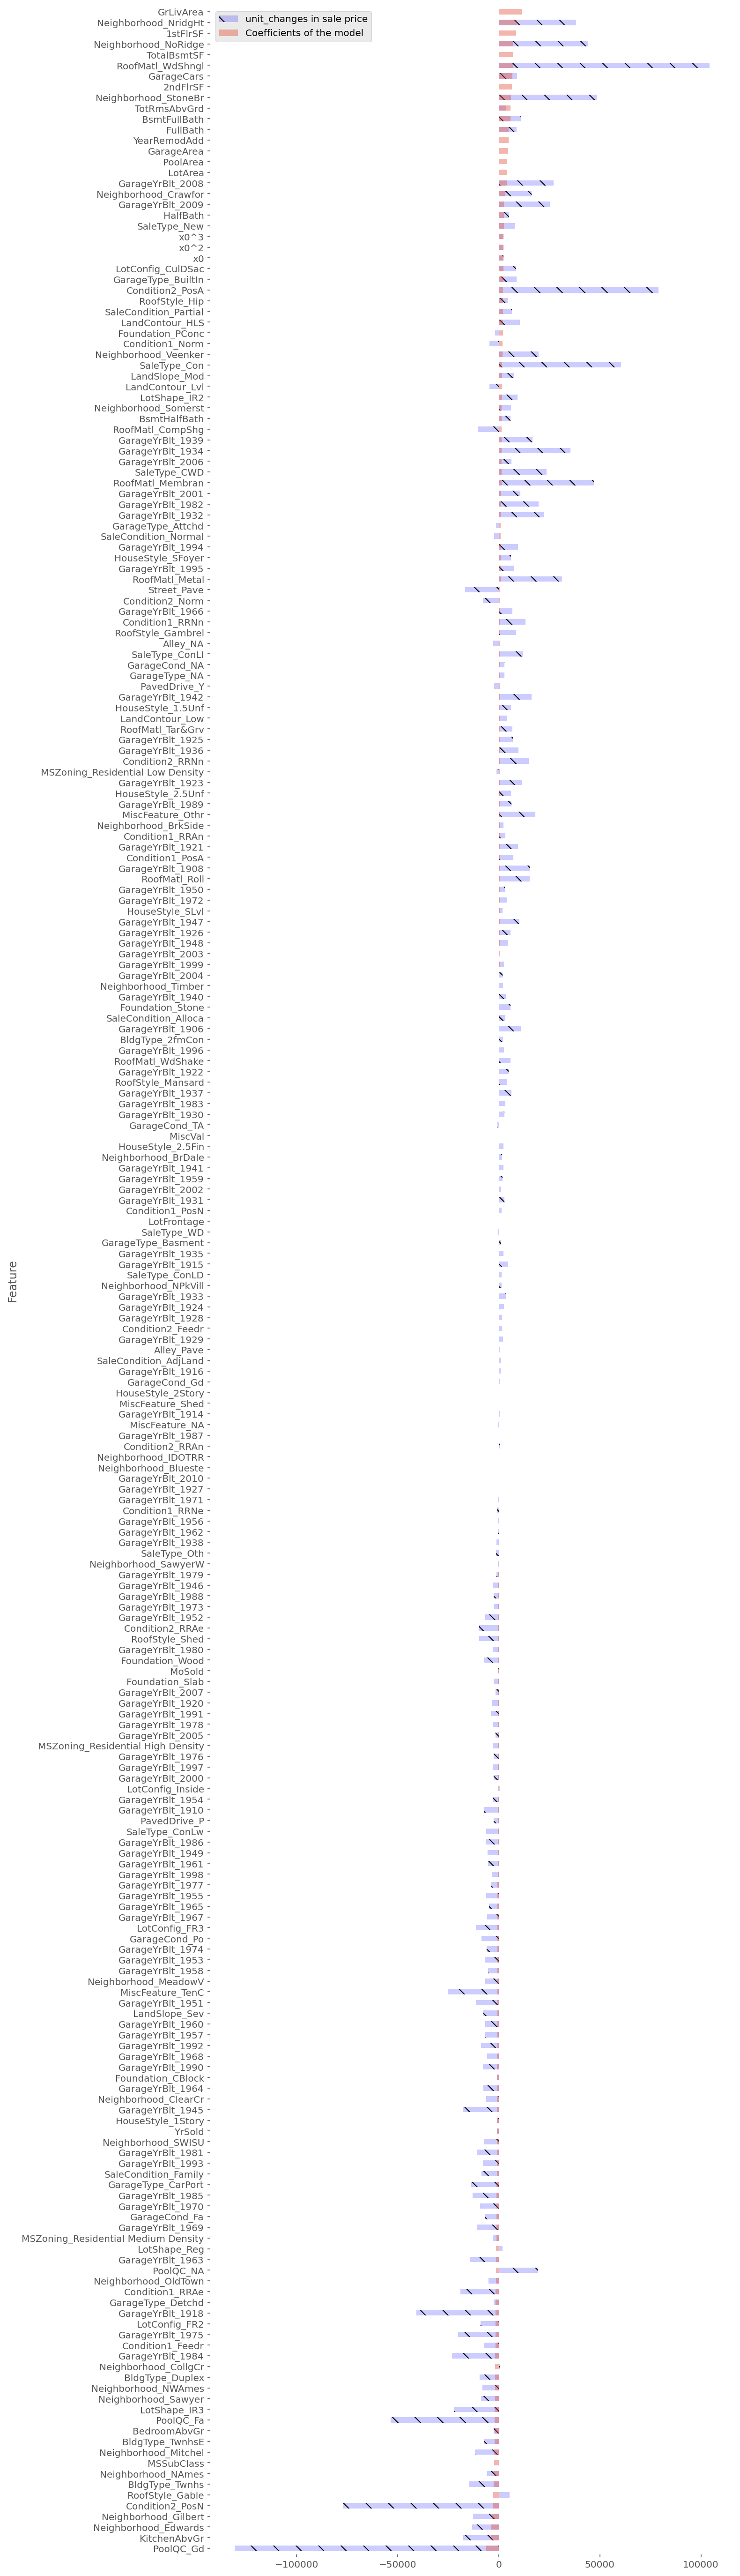

In [886]:

ax = coefs[['Feature','unit_values', 'coef']].sort_values(by = 'coef', ascending = True).plot(kind = 'barh', x = 'Feature', y = 'unit_values'
                                                                          ,figsize = (10,50), label = 'unit_changes in sale price' , hatch = '\\', color = 'blue', alpha = 0.2);


coefs[['Feature','coef']].sort_values(by = 'coef', ascending = True).plot(kind = 'barh', x = 'Feature', y = 'coef'
                                                                          ,figsize = (10,50), label = 'Coefficients of the model', ax = ax, alpha = 0.4);
ax.set_facecolor('white')
plt.legend()
plt.show()

Pools have a surprising effect on house price, as they have a negative correlation with house price!

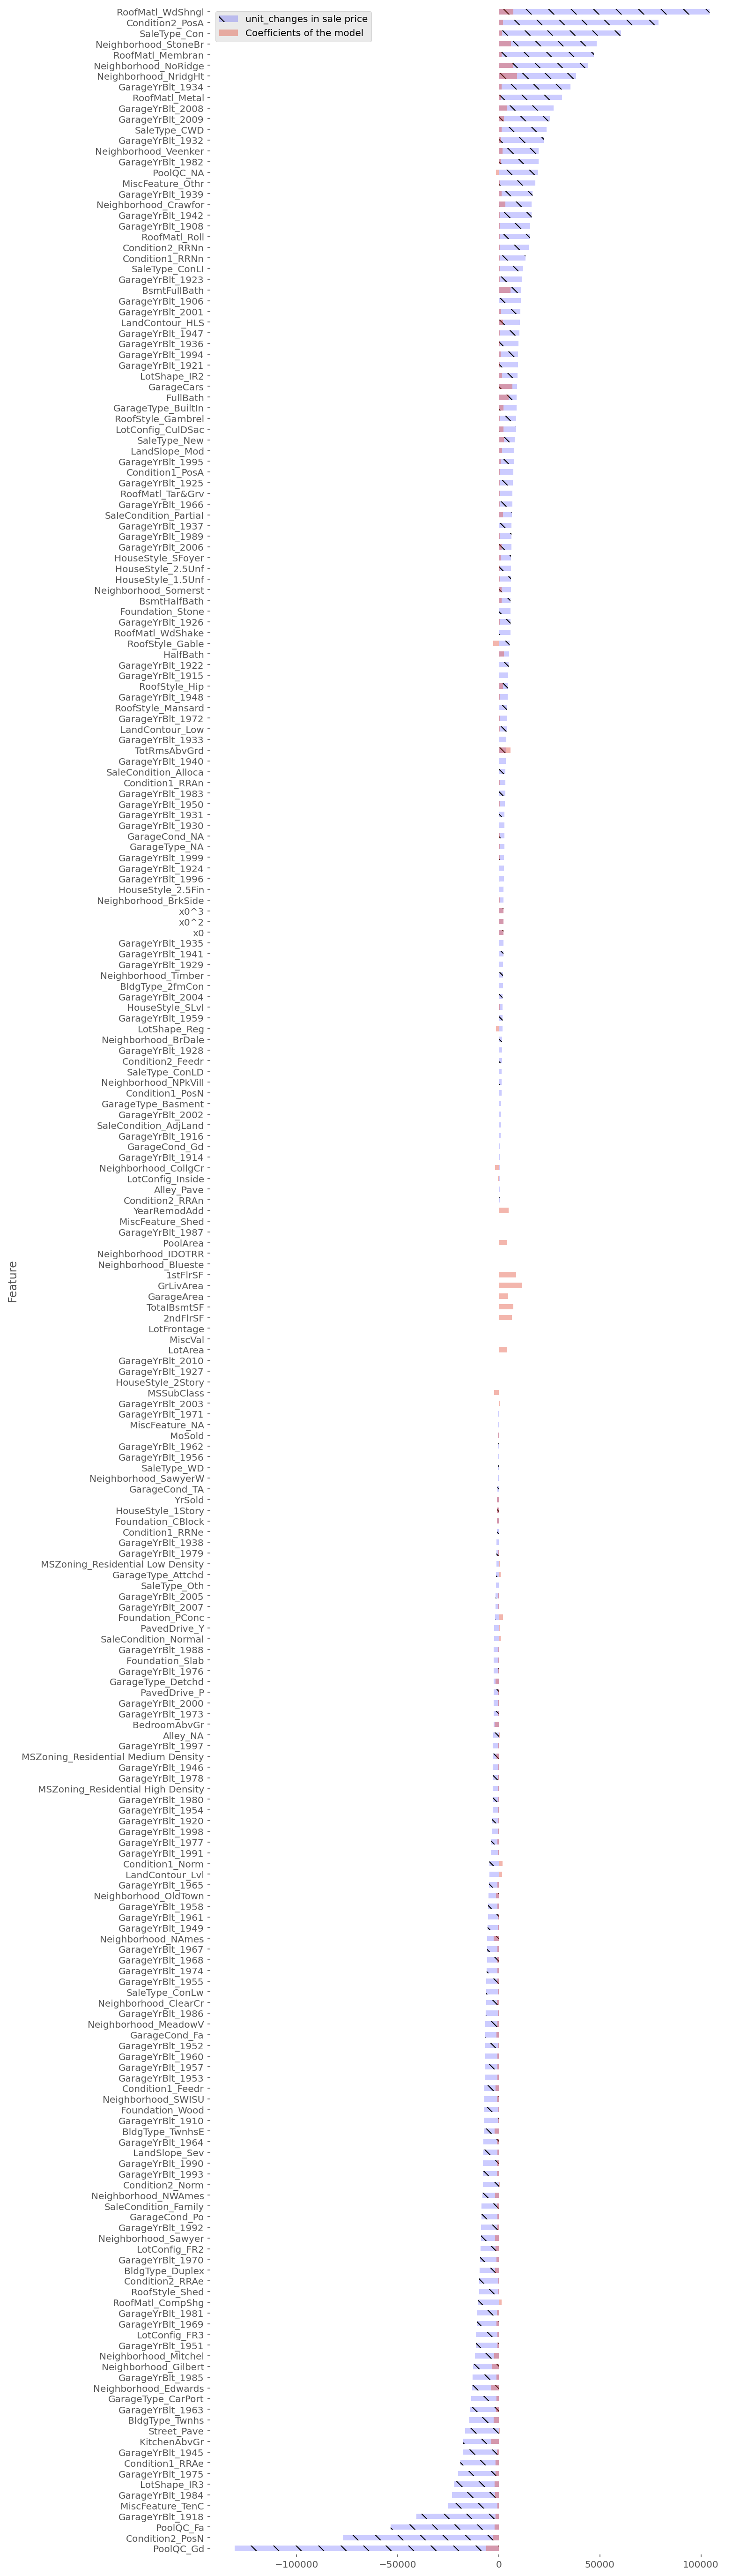

In [887]:
ax = coefs[['Feature','unit_values', 'coef']].sort_values(by = 'unit_values', ascending = True).plot(kind = 'barh', x = 'Feature', y = 'unit_values'
                                                                          ,figsize = (10,50), label = 'unit_changes in sale price' , hatch = '\\', color = 'blue', alpha = 0.2)


coefs[['Feature','coef', 'unit_values']].sort_values(by = 'unit_values', ascending = True).plot(kind = 'barh', x = 'Feature', y = 'coef'
                                                                          ,figsize = (10,50), label = 'Coefficients of the model', ax = ax, alpha = 0.4)
ax.set_facecolor('white')
plt.legend()
plt.show()

# Part 2 - Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that we have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---


In [888]:

not_fixed_cols = []
for x in house.columns:
    if x == 'MoSold' or x == 'YrSold' or x == 'SalePrice' or x not in fixed_data.columns:
        not_fixed_cols.append(x)

In [889]:
not_fixed_cols

['Utilities',
 'OverallQual',
 'OverallCond',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'Fence',
 'MoSold',
 'YrSold',
 'SalePrice']

<h3> Cleaning <h3>

In [890]:
non_fixed_dataset = house[(house.MSZoning.str.contains('Residential') == True)]


non_fixed_dataset = non_fixed_dataset[not_fixed_cols]
pd.set_option('display.max_columns', None)
non_fixed_dataset.head(6)

Utilities  OverallQual  OverallCond Exterior1st Exterior2nd MasVnrType  \
0    AllPub            7            5     VinylSd     VinylSd    BrkFace   
1    AllPub            6            8     MetalSd     MetalSd         NA   
2    AllPub            7            5     VinylSd     VinylSd    BrkFace   
3    AllPub            7            5     Wd Sdng     Wd Shng         NA   
4    AllPub            8            5     VinylSd     VinylSd    BrkFace   
5    AllPub            5            5     VinylSd     VinylSd         NA   

  MasVnrArea ExterQual ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        196        Gd        TA       Gd       TA           No          GLQ   
1          0        TA        TA       Gd       TA           Gd          ALQ   
2        162        Gd        TA       Gd       TA           Mn          GLQ   
3          0        TA        TA       TA       Gd           No          ALQ   
4        350        Gd        TA       Gd       TA           Av          GLQ   
5          0        TA        TA       Gd       TA           No          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC  \
0         706          Unf           0        150    GasA        Ex   
1         978          Unf           0        284    GasA        Ex   
2         486          Unf           0        434    GasA        Ex   
3         216          Unf           0        540    GasA        Gd   
4         655          Unf           0        490    GasA        Ex   
5         732          Unf           0         64    GasA        Ex   

  CentralAir Electrical  LowQualFinSF KitchenQual Functional  Fireplaces  \
0          Y      SBrkr             0          Gd        Typ           0   
1          Y      SBrkr             0          TA        Typ           1   
2          Y      SBrkr             0          Gd        Typ           1   
3          Y      SBrkr             0          Gd        Typ           1   
4          Y      SBrkr             0          Gd        Typ           1   
5          Y      SBrkr             0          TA        Typ           0   

  FireplaceQu GarageFinish GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          NA          RFn         TA           0           61              0   
1          TA          RFn         TA         298            0              0   
2          TA          RFn         TA           0           42              0   
3          Gd          Unf         TA           0           35            272   
4          TA          RFn         TA         192           84              0   
5          NA          Unf         TA          40           30              0   

   3SsnPorch  ScreenPorch  Fence  MoSold  YrSold  SalePrice  
0          0            0     NA       2    2008     208500  
1          0            0     NA       5    2007     181500  
2          0            0     NA       9    2008     223500  
3          0            0     NA       2    2006     140000  
4          0            0     NA      12    2008     250000  
5        320            0  MnPrv      10    2009     143000

In [891]:
non_fixed_dataset.dtypes

Utilities        object
OverallQual       int64
OverallCond       int64
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
LowQualFinSF      int64
KitchenQual      object
Functional       object
Fireplaces        int64
FireplaceQu      object
GarageFinish     object
GarageQual       object
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
Fence            object
MoSold            int64
YrSold            int64
SalePrice         int64
dtype: object

In [892]:
non_fixed_dataset.MasVnrArea.unique()

array(['196', '0', '162', '350', '186', '240', '286', '306', '212', '180',
       '380', '281', '640', '200', '246', '132', '650', '101', '412',
       '272', '456', '1031', '178', '573', '344', '287', '167', '1115',
       '40', '104', '576', '443', '468', '66', '22', '284', '76', '203',
       '68', '183', '48', '28', '336', '600', '768', '480', '220', '184',
       '1129', '116', '135', '266', '85', '309', '136', '288', '70',
       '320', '50', '120', '436', '252', '84', '664', '226', '300', '653',
       '112', '491', '268', '748', '98', '275', '138', '205', '262',
       '128', '260', '153', '64', '312', '16', '922', '142', '290', '127',
       '506', '297', 'NA', '604', '254', '36', '102', '472', '481', '108',
       '302', '172', '399', '270', '46', '210', '174', '348', '315',
       '299', '340', '166', '72', '31', '34', '238', '1600', '365', '56',
       '150', '278', '256', '225', '370', '388', '175', '296', '146',
       '113', '176', '616', '30', '106', '870', '362', '530'

Masonry veneer area of NA will be taken as zero veneer area instead of NA so that the series can be an int type

In [893]:
non_fixed_dataset.MasVnrArea[non_fixed_dataset.MasVnrArea == 'NA'].count()


8

In [894]:
non_fixed_dataset.MasVnrArea = non_fixed_dataset.MasVnrArea.replace('NA', 0)
non_fixed_dataset.MasVnrArea = non_fixed_dataset.MasVnrArea.astype(int)

In [895]:
non_fixed_dataset = pd.get_dummies(non_fixed_dataset,columns = non_fixed_dataset.describe(include = 'object').columns , drop_first = True)

In [896]:
pd.set_option('Display.max_columns', None)
non_fixed_dataset

OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0               7            5         196         706           0        150   
1               6            8           0         978           0        284   
2               7            5         162         486           0        434   
3               7            5           0         216           0        540   
4               8            5         350         655           0        490   
...           ...          ...         ...         ...         ...        ...   
1455            6            5           0           0           0        953   
1456            6            6         119         790         163        589   
1457            7            9           0         275           0        877   
1458            5            6           0          49        1029          0   
1459            5            6           0         830         290        136   

      LowQualFinSF  Fireplaces  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0                0           0           0           61              0   
1                0           1         298            0              0   
2                0           1           0           42              0   
3                0           1           0           35            272   
4                0           1         192           84              0   
...            ...         ...         ...          ...            ...   
1455             0           1           0           40              0   
1456             0           2         349            0              0   
1457             0           2           0           60              0   
1458             0           0         366            0            112   
1459             0           0         736           68              0   

      3SsnPorch  ScreenPorch  MoSold  YrSold  SalePrice  Utilities_NoSeWa  \
0             0            0       2    2008     208500                 0   
1             0            0       5    2007     181500                 0   
2             0            0       9    2008     223500                 0   
3             0            0       2    2006     140000                 0   
4             0            0      12    2008     250000                 0   
...         ...          ...     ...     ...        ...               ...   
1455          0            0       8    2007     175000                 0   
1456          0            0       2    2010     210000                 0   
1457          0            0       5    2010     266500                 0   
1458          0            0       4    2010     142125                 0   
1459          0            0       6    2008     147500                 0   

      Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1455                    0                    0                    0   
1456                    0                    0                    0   
1457                    0                    0                    0   
1458                    0                    0                    0   
1459                    0                    0                    0   

      Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4               

**Train/Test Split**

In [897]:
x_train = non_fixed_dataset[non_fixed_dataset.YrSold < 2010]
x_test = non_fixed_dataset[non_fixed_dataset.YrSold >= 2010]



In [898]:
target_train = x_train.pop('SalePrice')
target_test = x_test.pop('SalePrice')

In [899]:
print(x_train.shape)
print(target_train.shape)
print(target_test.shape)

(1278, 120)
(1278,)
(172,)


test to see if the observations match up with the total number in the dataset 

In [900]:
target_train.shape[0] + target_test.shape[0]

1450

In [901]:
#stadardise the features

non_fixed_scale = StandardScaler()

x_train_scaled = pd.DataFrame(non_fixed_scale.fit_transform(x_train) , columns = x_train.columns)
x_test_scaled = pd.DataFrame(non_fixed_scale.transform(x_test), columns = x_train.columns)

<b> This is the answer part 2 based off the residuals from part 1. By using the fixed_residuals as the y_train with which to predict, the r2 score will tell us how much of the variability in our error is explained by the renovatable features. </b>


In [902]:
from sklearn.metrics import r2_score

find_model_2_alpha = RidgeCV(alphas = np.logspace(-5,5,100), cv = 4)

find_model_2_alpha.fit(x_train_scaled, fixed_train_resids)
find_model_2_alpha.alpha_


non_fixed_model = Ridge(alpha=find_model_2_alpha.alpha_)
non_fixed_model.fit(x_train_scaled , fixed_train_resids)

scores = cross_val_score(non_fixed_model , x_train_scaled, fixed_train_resids, cv = 4)

print('training accuracy: ',non_fixed_model.score(x_train_scaled , fixed_train_resids))
print('training accuracy mean: ', np.mean(scores))
print('training accuracy var: ', np.var(scores))
print('Overall explainability of renovatable features compared with : ', r2_score(fixed_train_resids, non_fixed_model.predict(x_train_scaled)))

training accuracy:  0.26637667607508697
training accuracy mean:  0.16652472980756391
training accuracy var:  0.0034844067394088417
Overall explainability of renovatable features compared with :  0.26637667607508697


<b>So our new model can explain 16 percent of the variablility of our first model. The drawbacks of approaching the explained error in this way is that we imply that our new model runs perfectly without error itself!</b>

now lets assess which feautres have most effect on the errors, We will wish to keep factors that have higher coeficients (positivie coeficients will have a positive effect on price) as they have a higher importance with regard to explaining the variability in price

In [903]:
non_fixed_coefs = pd.DataFrame({'feature': x_train.columns, 'coefs': non_fixed_model.coef_})
non_fixed_coefs['absoloute'] = abs(non_fixed_coefs.coefs)

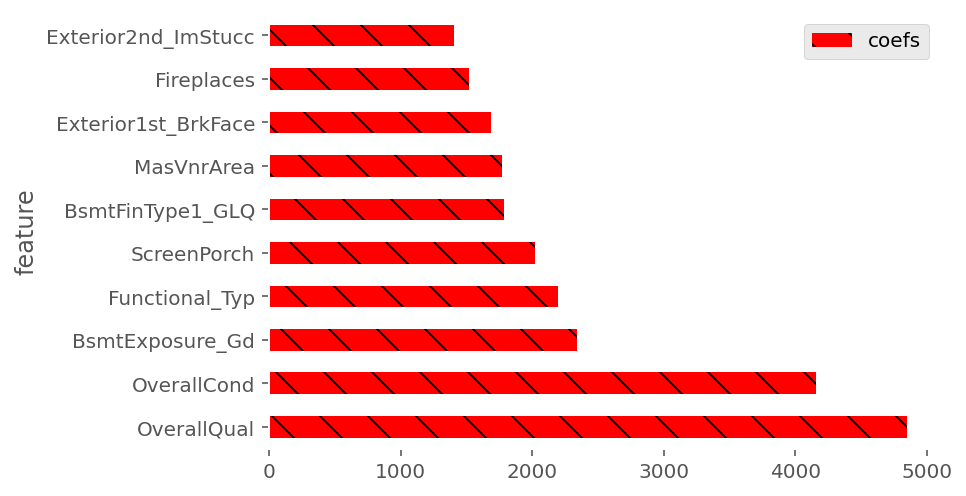

In [904]:
ax = non_fixed_coefs.sort_values(by = 'coefs', ascending = False).head(10).plot(kind = 'barh', x = 'feature', 
                                                                  y = 'coefs', hatch = '\\', color = 'red')
ax.set_facecolor('white')


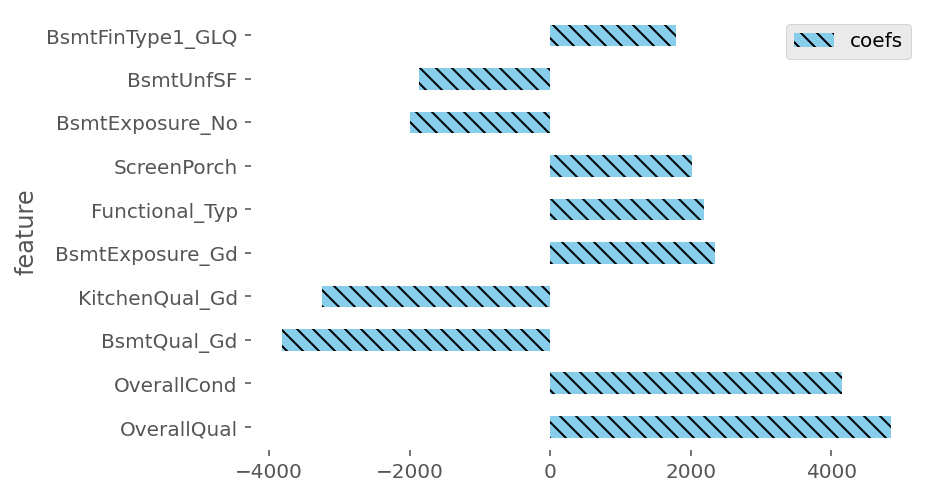

In [905]:
ax = non_fixed_coefs.sort_values(by = 'absoloute', ascending = False).head(10).plot(kind = 'barh', x = 'feature', 
                                                                  y = 'coefs', hatch = '\\\\\\', color = 'skyblue')

ax.set_facecolor('white')

overall quality, overall condition and having good exposure of walkout or garden level walls (bmt exposure) are the key features that explain variability of our origional model and therefore we might consider adding these to the fixed model from before.

<h2>Conclusions for Part 1 & 2</h2>

<b>How would your company use this second model and its coefficients to determine whether they should buy a property or not?</b> 
The coefficients tell us how much the feature has an effect on accuracy of property price relative to a standard deviations' change of that feature. 
<p>In the future, I would increase the accuracy of my first model by incorperating the features of the second model with the most positive coefficients. Then, if the price of renovating that feature is greater than the effect it would have on house price, then the house is not worth renovating/investing in. Furthermore, I would add tolerances to individual features. For example, the residplot of ground living area vs price shows that lower ground living areas have less residual errors. Using these reduced ground living areas only, we can reduce error and increase certainty in house sale prices, increasing investor confidence.</p>
<p>Its important to note that these coefficients are all subject to change, since the dataset is just a sample of the house sales in Ames.</p>

<b>Explain how the company can use the two models you have built to determine if they can make money.</b>
Firstly you can use the first model to predict (with ~78% accuracy) the price of the house from fixed characteristics.
If these characteristics you have do not match what you think the house should be worth, you can renovate accordingly to improved these fixed features and to increase the house value. As the question above suggests, the second model can help you avoid making losses as much as it can help you to understand the financial gain from a renovation and the particular renovations that will help to generate value in a clients property. 

<b>Investigate how much of the variance in price remaining is explained by these features.</b>
from the mean r2 values in each model you can see that the variance in price can be explained by ~78% with the fixed features alone. Of the rest of the error in the model, ~16% can be explained by non-fixed features.

<b>Do you trust your model? Should it be used to evaluate which properties to buy and fix up?</b>
The accuracy is high and the best r2 score can be trusted since the variance is low, 0.004029 (this was calculated with a cross validation of 4 folds). I would improve my first model by adding some renovatable features that have a higher predictive power of house price such as Overall Quality, Masonry veneer area and fireplaces.

<h3> Interesting extra work with the Residuals </h3>

<b> The following model is not what part 2 is asking for, but I have done it as i thought it was insightful to know which renovatable features affect the price of houses alone </b>

In [906]:
#too keep variance from the first model, we need to use a ridge with the same alpha
find_model_2_alpha = RidgeCV(alphas = np.logspace(-5,5,100), cv = 4)

find_model_2_alpha.fit(x_train_scaled, target_train)
find_model_2_alpha.alpha_


non_fixed_model = Ridge(alpha=find_model_2_alpha.alpha_)
non_fixed_model.fit(x_train_scaled , target_train)

scores = cross_val_score(non_fixed_model , x_train_scaled, target_train, cv = 4)

print('training accuracy: ',non_fixed_model.score(x_train_scaled , target_train))
print('training accuracy mean: ', np.mean(scores))
print('training accuracy var: ', np.var(scores))
print('testing accuracy: ',non_fixed_model.score(x_test_scaled, target_test))

training accuracy:  0.7865031350399403
training accuracy mean:  0.7437683961721631
training accuracy var:  0.0018851605207656028
testing accuracy:  0.7849754040757768


In [907]:
non_fixed_coefs = pd.DataFrame({'feature': x_train.columns, 'coefs': non_fixed_model.coef_})
non_fixed_coefs['absoloute'] = abs(non_fixed_coefs.coefs)

In [908]:
non_fixed_coefs.sort_values(by = 'absoloute', ascending = False).head(15)

feature         coefs     absoloute
0         OverallQual  25400.327837  25400.327837
58        BsmtQual_TA -13182.924144  13182.924144
96     KitchenQual_TA -13159.444225  13159.444225
56        BsmtQual_Gd -12509.934965  12509.934965
2          MasVnrArea  11898.575602  11898.575602
3          BsmtFinSF1  10450.568862  10450.568862
5           BsmtUnfSF   9450.594094   9450.594094
50       ExterQual_TA  -8974.492427   8974.492427
95     KitchenQual_Gd  -8592.641848   8592.641848
7          Fireplaces   7033.450617   7033.450617
8          WoodDeckSF   6110.340001   6110.340001
105    FireplaceQu_NA  -4938.090436   4938.090436
1         OverallCond   4513.395540   4513.395540
63    BsmtExposure_Gd   4383.200370   4383.200370
68   BsmtFinType1_GLQ   3910.670975   3910.670975

In [909]:
#for values of unit change on price of each feature
unit_values = []
for x in non_fixed_coefs.feature:
    try:
        if '_' in x or x == 'Fireplaces':
            #binary features
            unit_values.append(list(non_fixed_coefs['coefs'])[list(non_fixed_coefs['feature']).index(x)]*x_train_scaled[x].unique()[1])
        
        
        else:
            #non binary features
            unit_values.append(list(non_fixed_coefs['coefs'])[list(non_fixed_coefs['feature']).index(x)]/x_train.describe()[x][2])
            
            
    except:
        unit_values.append(0)

In [910]:
non_fixed_coefs['unit_values'] = unit_values

In [911]:
non_fixed_coefs.head()

feature         coefs     absoloute   unit_values
0  OverallQual  25400.327837  25400.327837  18395.452680
1  OverallCond   4513.395540   4513.395540   4096.110049
2   MasVnrArea  11898.575602  11898.575602     64.333254
3   BsmtFinSF1  10450.568862  10450.568862     22.735390
4   BsmtFinSF2   3442.283604   3442.283604     22.100632

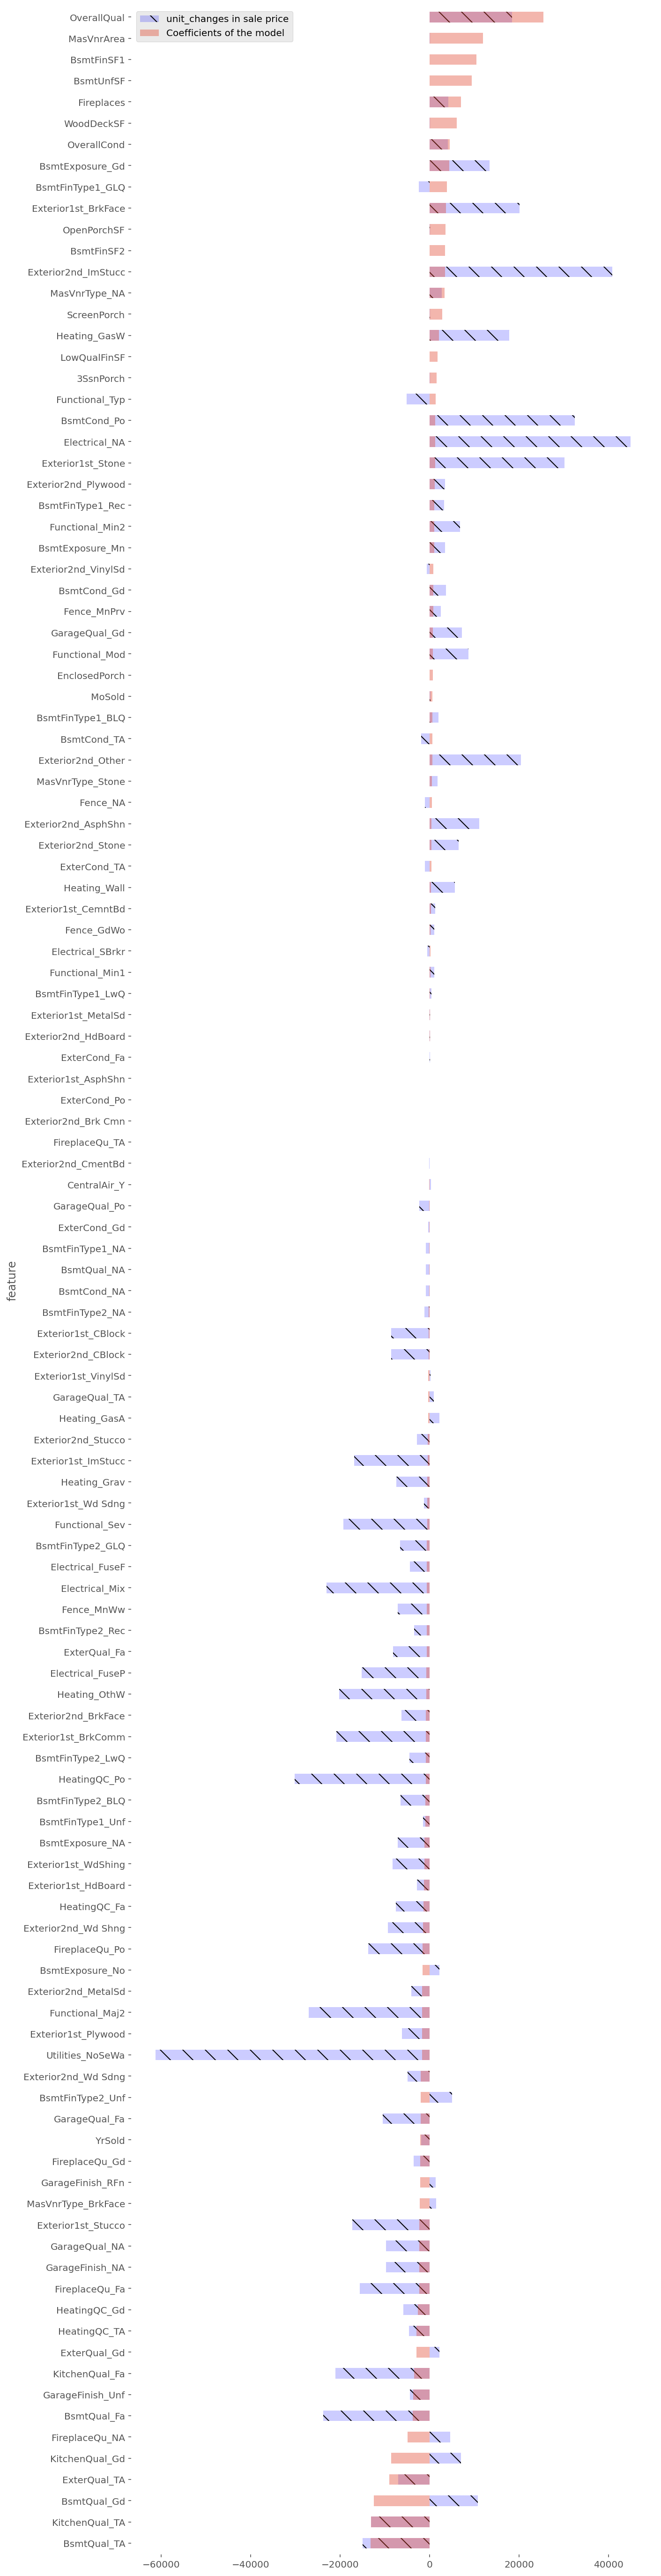

In [912]:
ax = non_fixed_coefs[['feature','unit_values', 'coefs']].sort_values(by = 'coefs', ascending = True).plot(kind = 'barh', x = 'feature', y = 'unit_values'
                                                                          ,figsize = (10,50), label = 'unit_changes in sale price' , hatch = '\\', color = 'blue', alpha = 0.2)


non_fixed_coefs[['feature','coefs']].sort_values(by = 'coefs', ascending = True).plot(kind = 'barh', x = 'feature', y = 'coefs'
                                                                          ,figsize = (10,50), label = 'Coefficients of the model', ax = ax, alpha = 0.4)
ax.set_facecolor('white')
plt.legend()

This model can account for 74% of the variability of the Sale price. A non fixed model therefore explains 4% less variability than a fixed model.

out of all the non-fixed aspects you should change to improve the sale price of your house, you should build a Masonry veneer (increasing the area of which by 1 foot squared will increase the value of the house by $64)

you should also consider icreasing the overall finish/quality of the house to make it more appealing to customers, increasing the overall quality by one unit wil increase price of sale by $18363.

one interesting point to notice is that having an average kitchen reduces house prices. (as below)

In [913]:
non_fixed_coefs[(non_fixed_coefs['feature'].str.contains('KitchenQual')==True)]

feature         coefs     absoloute   unit_values
94  KitchenQual_Fa  -3433.444369   3433.444369 -21089.084202
95  KitchenQual_Gd  -8592.641848   8592.641848   7025.015809
96  KitchenQual_TA -13159.444225  13159.444225 -13097.807145

<b>The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?</b>

In [914]:
x_comb_model_2 = pd.concat([x_train_scaled ,x_test_scaled], axis = 0)

print(x_comb_model_2.shape)

y_comb_model_2 = pd.concat([target_train ,target_test], axis = 0)

print(y_comb_model_2.shape)

renovatable_resids = y_comb_model_2 - non_fixed_model.predict(x_comb_model_2)
sum(renovatable_resids)

(1450, 120)
(1450,)


1075424.1167034723

In [915]:
#here is the first model residuals from earlier
sum(resids)

295362.7153471301

residuals of first model: 121268.42625984916

residuals of the second model: 1072151.0117172985

the renovatable model has roughly 9 times more variance in the residuals showing that it is a poorer model at predicting house prices

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


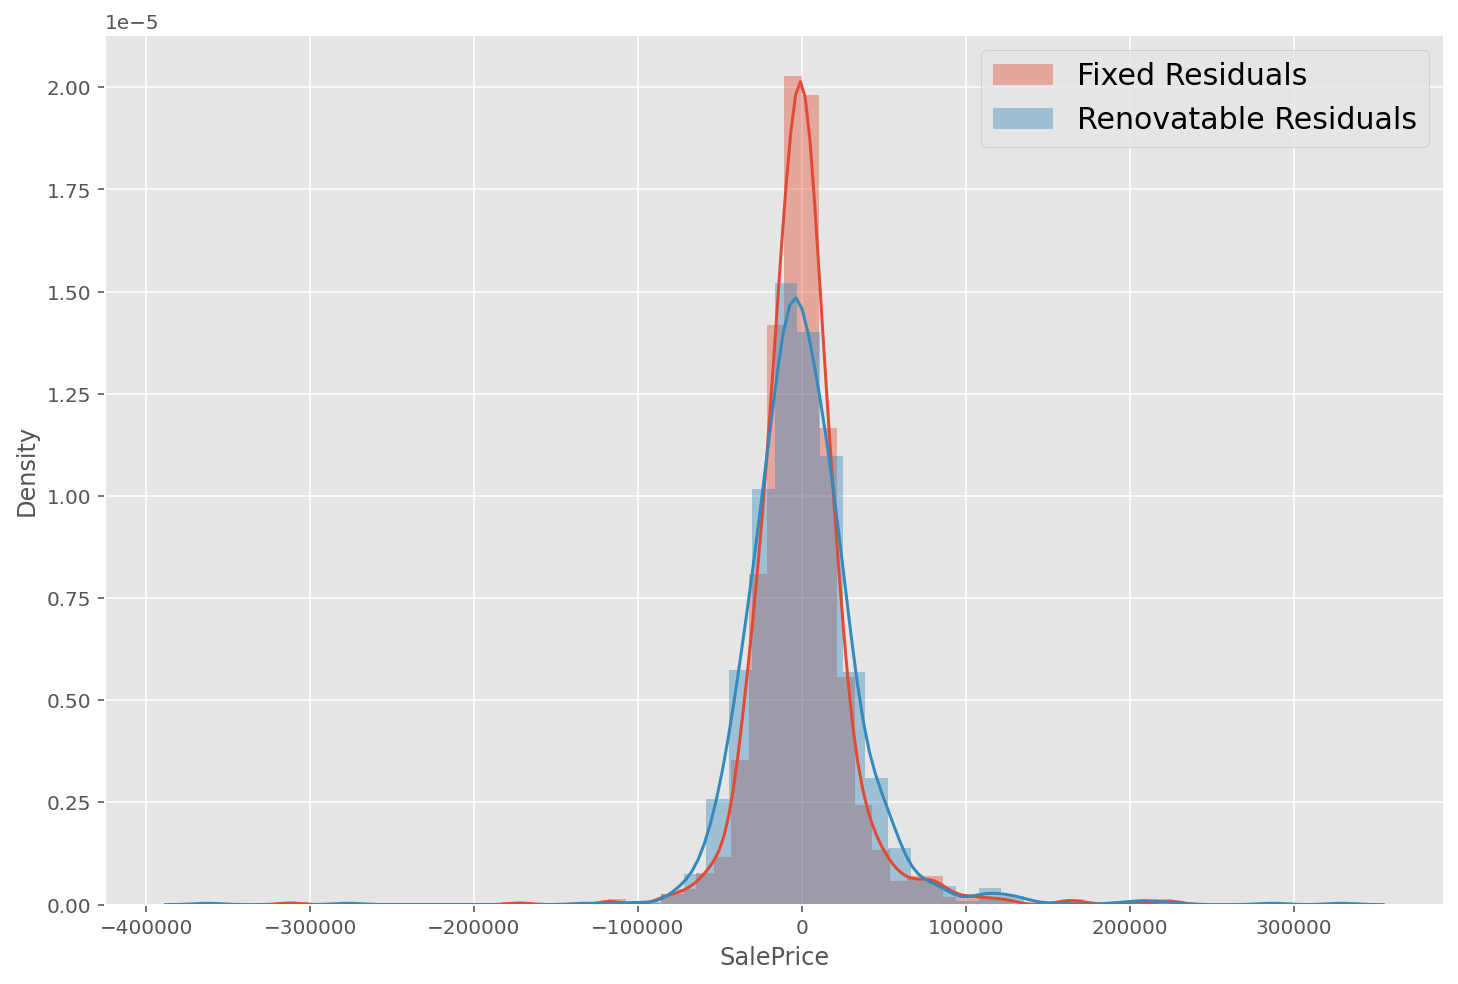

In [916]:
plt.figure(figsize = (12,8))
sns.distplot(resids, label = 'Fixed Residuals')
sns.distplot(renovatable_resids, label = 'Renovatable Residuals')
plt.legend(prop = {'size':15})

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


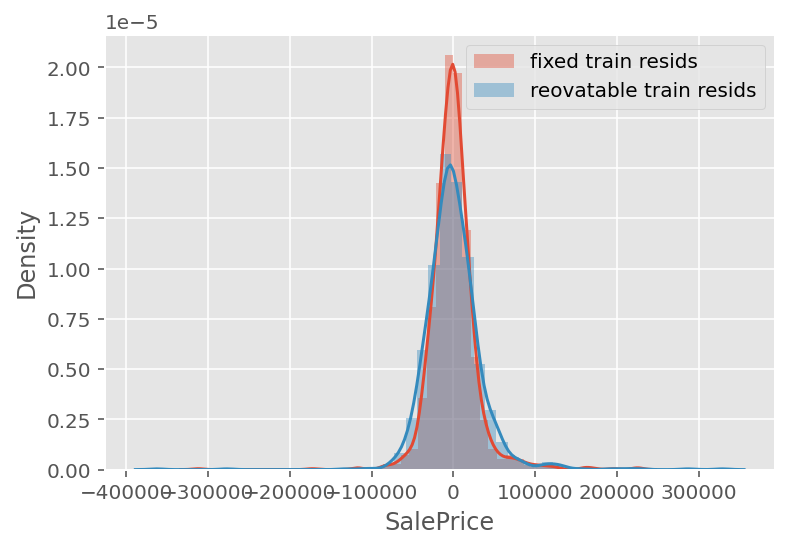

In [917]:
plt.figure()
sns.distplot(fixed_train_resids, label = 'fixed train resids')
sns.distplot((target_train - non_fixed_model.predict(x_train_scaled)), label = 'reovatable train resids')
plt.legend()

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


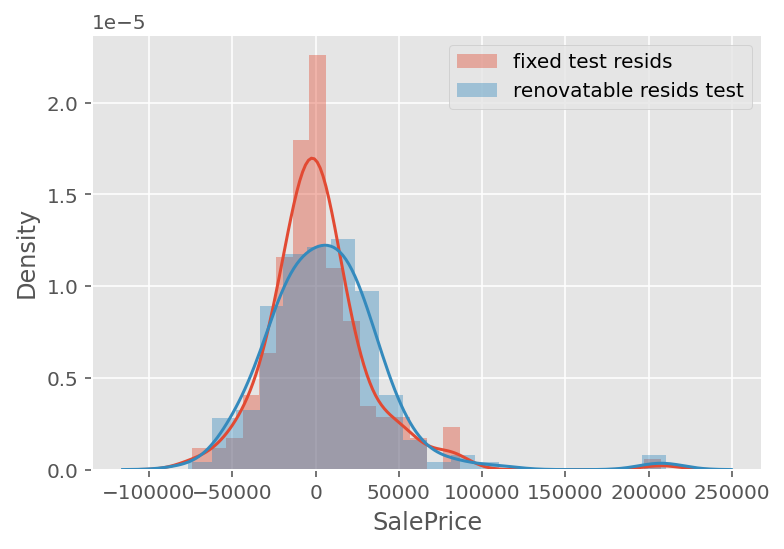

In [918]:
sns.distplot(fixed_test_resids, label = 'fixed test resids')
sns.distplot((target_test - non_fixed_model.predict(x_test_scaled)), label = 'renovatable resids test')
plt.legend()

<h3> This is also not part of part 2, it is further work exploring outlier removal </h3>

**Will removing outliers in price help to create a more predictive model?**

In [919]:
df = house.copy()

df = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl','Foundation', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageType',
       'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]

df.head()
df.LotFrontage = df.replace('NA', 0)
df.LotFrontage = df.LotFrontage.astype(int)

In [920]:
df.GarageYrBlt = df.GarageYrBlt.replace('NA', 0)
df.GarageYrBlt = df.GarageYrBlt.astype(int)

In [921]:
df_dummies = pd.get_dummies(df, drop_first = True)
df_dummies.head()

MSSubClass  LotFrontage  LotArea  YearBuilt  YearRemodAdd  TotalBsmtSF  \
0          60           60     8450       2003          2003          856   
1          20           20     9600       1976          1976         1262   
2          60           60    11250       2001          2002          920   
3          70           70     9550       1915          1970          756   
4          60           60    14260       2000          2000         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       856       854       1710             1             0         2   
1      1262         0       1262             0             1         2   
2       920       866       1786             1             0         2   
3       961       756       1717             1             0         1   
4      1145      1053       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageYrBlt  \
0         1             3             1             8         2003   
1         0             3             1             6         1976   
2         1             3             1             6         2001   
3         0             3             1             7         1998   
4         1             4             1             9         2000   

   GarageCars  GarageArea  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0           2         548         0        0       2    2008     208500   
1           2         460         0        0       5    2007     181500   
2           2         608         0        0       9    2008     223500   
3           3         642         0        0       2    2006     140000   
4           3         836         0        0      12    2008     250000   

   MSZoning_Floating Village Residential  MSZoning_Residential High Density  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   MSZoning_Residential Low Density  MSZoning_Residential Medium Density  \
0                                 1                                    0   
1                                 1                                    0   
2                                 1                                    0   
3                                 1                                    0   
4                                 1                                    0   

   Street_Pave  Alley_NA  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0            1         1           0             0             0   
1            1         1           0             0             0   
2            1         1           0             0             0   
3            1         1           0             0             0   
4            1         1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_

In [922]:
df_dummies.dtypes

MSSubClass               int64
LotFrontage              int64
LotArea                  int64
YearBuilt                int64
YearRemodAdd             int64
                         ...  
SaleCondition_AdjLand    uint8
SaleCondition_Alloca     uint8
SaleCondition_Family     uint8
SaleCondition_Normal     uint8
SaleCondition_Partial    uint8
Length: 143, dtype: object

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

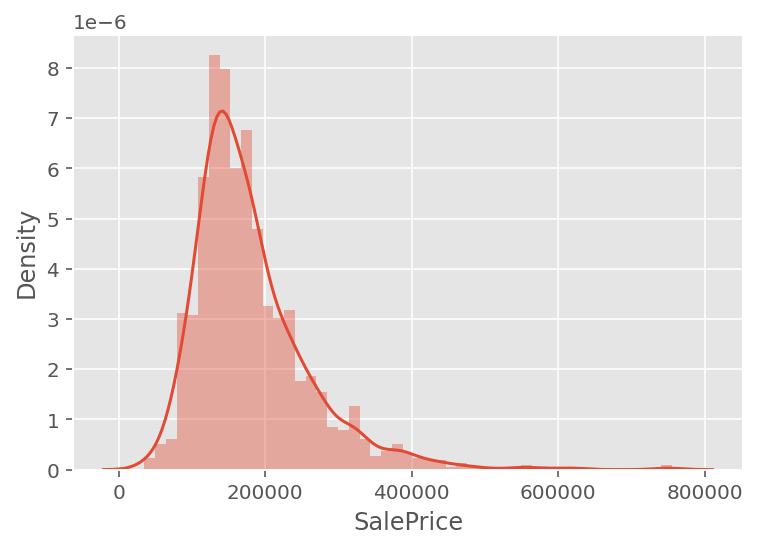

In [923]:
sns.distplot(df_dummies.SalePrice)


In [924]:
#lets get rid of 500000 and over

df = df_dummies[df_dummies.SalePrice < 500000]

test = df[df.YrSold >=2010]
train = df[df.YrSold < 2010]

y_test = test.pop('SalePrice')
y_train = train.pop('SalePrice')

x_train = train
x_test = test

In [925]:
scale = StandardScaler()

x_scaled_train = pd.DataFrame(scale.fit_transform(x_train), columns = x_train.columns)
x_scaled_test = pd.DataFrame(scale.transform(x_test), columns = x_train.columns)

In [926]:
polynomial_list = [1,2,3]


ridge_accuracy = []
ridge_test = []
ridge_cv_var = []

lasso_accuracy = []
lasso_test = []
lasso_cv_var = []

elastic_accuracy = []
elastic_test = []
elastic_cv_var = []

for n in polynomial_list:
    print('\n')
    poly = PolynomialFeatures(degree = n, include_bias = False)
    X_train_pf = poly.fit_transform(x_scaled_train[['GarageYrBlt', 'YearBuilt']])
    X_test_pf = poly.fit_transform(x_scaled_test[['GarageYrBlt', 'YearBuilt']])
    
    X_train_pf = pd.DataFrame(X_train_pf, columns = poly.get_feature_names())
    X_test_pf = pd.DataFrame(X_test_pf, columns = poly.get_feature_names())
    
    X_train = pd.concat([X_train_pf, x_scaled_train], axis = 1)
    X_test = pd.concat([X_test_pf, x_scaled_test], axis = 1)
    
    #find optimal ridge alpha
    find_ridge_alpha = RidgeCV(alphas = np.logspace(-5,5,100), cv = 4)
    find_ridge_alpha.fit(X_train,y_train)
    find_ridge_alpha.alpha_
    print(f'Ridge alpha optimum for {n}: ',find_ridge_alpha.alpha_ )
    
    
    
    #results of best ridge alpha
    ridge_model = Ridge(alpha = find_ridge_alpha.alpha_)
    ridge_model.fit(X_train,y_train)
    ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv = 4)
    
    ridge_accuracy.append(np.mean(ridge_scores))
    ridge_test.append(ridge_model.score(X_test, y_test))
    ridge_cv_var.append(np.var(ridge_scores))
    
    print(f'Ridge Training Accuracy for poly of {n}: ', ridge_model.score(X_train, y_train))
    print(f'Ridge Testing Accuracy for poly of {n}: ', ridge_model.score(X_test, y_test))
    print(f'Ridge Training Accuracy mean for poly of {n}: ', np.mean(ridge_scores))
    print(f'Ridge Training Accuracy variance for poly of {n}: ', np.var(ridge_scores))
    
    
    #find optimal lasso alpha
    find_lasso_alpha = LassoCV(alphas = np.logspace(-5,5,100), cv = 4)
    find_lasso_alpha.fit(X_train,y_train)
    find_lasso_alpha.alpha_
    print(f'Lasso alpha optimum for {n}: ',find_lasso_alpha.alpha_ )
    
    
    
    #results of best lasso alpha
    lasso_model = Lasso(alpha = find_lasso_alpha.alpha_)
    lasso_model.fit(X_train,y_train)
    lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv = 4)
    
    lasso_accuracy.append(np.mean(lasso_scores))
    lasso_test.append(lasso_model.score(X_test, y_test))
    lasso_cv_var.append(np.var(lasso_scores))
    
    print(f'Lasso Training Accuracy for poly of {n}: ', lasso_model.score(X_train, y_train))
    print(f'Lasso Testing Accuracy for poly of {n}: ', lasso_model.score(X_test, y_test))
    print(f'Lasso Training Accuracy mean for poly of {n}: ', np.mean(lasso_scores))
    print(f'Lasso Training Accuracy variance for poly of {n}: ', np.var(lasso_scores))
    
    
    #find optimal ElasticNet alpha / l1_ratio
    find_elastic_alpha = ElasticNetCV(alphas = np.logspace(-5,5,100), cv = 4)
    find_elastic_alpha.fit(X_train,y_train)
    find_elastic_alpha.alpha_
    print(f'Elastic alpha optimum for {n}: ',find_elastic_alpha.alpha_ )
    print(f'Elastic l1_ratio optimum for {n}: ',find_elastic_alpha.l1_ratio_ )
    
    
    #results of best elastic alpha/ l1_ratio
    elastic_model = ElasticNet(alpha = find_elastic_alpha.alpha_, l1_ratio = find_elastic_alpha.l1_ratio_)
    elastic_model.fit(X_train,y_train)
    elastic_scores = cross_val_score(elastic_model, X_train, y_train, cv = 4)
    
    elastic_accuracy.append(np.mean(elastic_scores))
    elastic_test.append(elastic_model.score(X_test, y_test))
    elastic_cv_var.append(np.var(elastic_scores))
    
    print(f'Elastic Training Accuracy for poly of {n}: ', elastic_model.score(X_train, y_train))
    print(f'Elastic Testing Accuracy for poly of {n}: ', elastic_model.score(X_test, y_test))
    print(f'Elastic Training Accuracy mean for poly of {n}: ', np.mean(elastic_scores))
    print(f'Elastic Training Accuracy variance for poly of {n}: ', np.var(elastic_scores))
    print('\n')
    
polyoverview = pd.DataFrame({
    'ridge_accuracy': ridge_accuracy,'ridge_test':ridge_test,'ridge_cv_var':ridge_cv_var,

'lasso_accuracy':lasso_accuracy,
'lasso_test':lasso_test,
'lasso_cv_var':lasso_cv_var,

'elastic_accuracy':elastic_accuracy,
'elastic_test':elastic_test,
'elastic_cv_var':elastic_cv_var,
}, index = [x for x in range(1,len(polynomial_list)+1)])

polyoverview



Ridge alpha optimum for 1:  298.364724028334
Ridge Training Accuracy for poly of 1:  0.8553816557907729
Ridge Testing Accuracy for poly of 1:  0.8539843214041896
Ridge Training Accuracy mean for poly of 1:  0.7855309106030439
Ridge Training Accuracy variance for poly of 1:  0.002552834322261912


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13306382439.333618, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35504454969.71649, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51578569795.70947, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90582016808.80359, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90582050050.7052, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90582029389.0567, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79985836575.03027, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80218692257.34021, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80391539246.53299, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15734649402.118958, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34863433956.10327, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48702755980.57947, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71797430544.5191, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71797323169.97137, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71797184233.66339, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/si

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95338445287.53705, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95371124946.8435, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95396253651.0951, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/sit

Lasso alpha optimum for 1:  756.463327554629
Lasso Training Accuracy for poly of 1:  0.8516290077987285
Lasso Testing Accuracy for poly of 1:  0.8599478752107305
Lasso Training Accuracy mean for poly of 1:  0.7739339558346393
Lasso Training Accuracy variance for poly of 1:  0.004626759289730177


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784413120.9317627, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7590715183.363159, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167107638697.86514, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146429570864.4319, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215694028868.96268, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236399978456.92615, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252070504229.87402, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262769082103.51944, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265890571590.39233, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262013482741.9526, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263579077564.79846, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265489464223.38202, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

Elastic alpha optimum for 1:  0.5590810182512223
Elastic l1_ratio optimum for 1:  0.5
Elastic Training Accuracy for poly of 1:  0.8526112285094475
Elastic Testing Accuracy for poly of 1:  0.8534898416958049
Elastic Training Accuracy mean for poly of 1:  0.7853665064800305
Elastic Training Accuracy variance for poly of 1:  0.0026552131219585665




Ridge alpha optimum for 2:  298.364724028334
Ridge Training Accuracy for poly of 2:  0.85545469959867
Ridge Testing Accuracy for poly of 2:  0.8537607913936157
Ridge Training Accuracy mean for poly of 2:  0.785493688341528
Ridge Training Accuracy variance for poly of 2:  0.0025975091641422636


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486272648.90185547, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63004197892.88672, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107539150814.77417, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282648596142.7091, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282758834001.8284, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282846020716.82513, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105428951581.06595, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90362882593.66577, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65999145215.08655, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228573379480.32318, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228581492463.43124, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228587833587.00296, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/pytho

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233252207720.09366, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240837777338.87735, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246357167099.64514, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264185253636.88437, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264185696841.79254, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36592699921.23297, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263780409202.23105, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264079253004.17404, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264315066785.95874, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

Lasso alpha optimum for 2:  756.463327554629
Lasso Training Accuracy for poly of 2:  0.8518344103720616
Lasso Testing Accuracy for poly of 2:  0.8605143708671679
Lasso Training Accuracy mean for poly of 2:  0.7743150730316932
Lasso Training Accuracy variance for poly of 2:  0.004613033268270144


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25115298799.614624, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206378688157.29926, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257200811665.33496, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/pytho

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10036442464.835144, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160472378724.5507, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194891710801.52725, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49342294589.949585, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11249621338.525513, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204553544247.2026, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14561975383.239868, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159115185912.25153, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204314409010.9787, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

Elastic alpha optimum for 2:  0.5590810182512223
Elastic l1_ratio optimum for 2:  0.5
Elastic Training Accuracy for poly of 2:  0.8526915659491121
Elastic Testing Accuracy for poly of 2:  0.8532172260960268
Elastic Training Accuracy mean for poly of 2:  0.7853293344777643
Elastic Training Accuracy variance for poly of 2:  0.0026957723312509676




Ridge alpha optimum for 3:  298.364724028334
Ridge Training Accuracy for poly of 3:  0.856023231142256
Ridge Testing Accuracy for poly of 3:  0.8524929174086143
Ridge Training Accuracy mean for poly of 3:  0.7848180346906677
Ridge Training Accuracy variance for poly of 3:  0.00258899436295274


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52398815193.79523, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100464642191.82819, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128155246245.95386, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273988852035.60596, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275072046581.97906, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275985044052.5078, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120605395036.08984, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87087898694.13962, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26811043633.11554, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225140842372.42517, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225268010859.8711, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225367813216.41553, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161057420630.09592, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131439869332.41687, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49056948635.64679, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259053862061.478, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259157067221.91296, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259242793509.15552, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235148130138.80447, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235722070788.37775, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236424457956.48315, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263868918777.58673, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263877714052.17404, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263884650098.2589, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

Lasso alpha optimum for 3:  756.463327554629
Lasso Training Accuracy for poly of 3:  0.851773405963283
Lasso Testing Accuracy for poly of 3:  0.8595719175302832
Lasso Training Accuracy mean for poly of 3:  0.7726973830701636
Lasso Training Accuracy variance for poly of 3:  0.004731401792482452


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10745011921.640625, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84931067634.03986, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211421199523.03497, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280438989206.09247, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280415272509.2006, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280395874381.1404, tolerance: 483173461.88980156
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226354362239.9389, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226230327306.4304, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226130995136.90887, tolerance: 456873201.56132394
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265245312529.4752, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264148522603.69388, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263260026033.5872, tolerance: 542899026.3559113
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269823750609.24097, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268783997025.33096, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267894301113.38727, tolerance: 521470268.5408302
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.

Elastic alpha optimum for 3:  0.5590810182512223
Elastic l1_ratio optimum for 3:  0.5
Elastic Training Accuracy for poly of 3:  0.8532699577842555
Elastic Testing Accuracy for poly of 3:  0.8520474901836042
Elastic Training Accuracy mean for poly of 3:  0.7846387404866014
Elastic Training Accuracy variance for poly of 3:  0.0026879263179185185




ridge_accuracy  ridge_test  ridge_cv_var  lasso_accuracy  lasso_test  \
1        0.785531    0.853984      0.002553        0.773934    0.859948   
2        0.785494    0.853761      0.002598        0.774315    0.860514   
3        0.784818    0.852493      0.002589        0.772697    0.859572   

   lasso_cv_var  elastic_accuracy  elastic_test  elastic_cv_var  
1      0.004627          0.785367      0.853490        0.002655  
2      0.004613          0.785329      0.853217        0.002696  
3      0.004731          0.784639      0.852047        0.002688

In [927]:
polyoverview

ridge_accuracy  ridge_test  ridge_cv_var  lasso_accuracy  lasso_test  \
1        0.785531    0.853984      0.002553        0.773934    0.859948   
2        0.785494    0.853761      0.002598        0.774315    0.860514   
3        0.784818    0.852493      0.002589        0.772697    0.859572   

   lasso_cv_var  elastic_accuracy  elastic_test  elastic_cv_var  
1      0.004627          0.785367      0.853490        0.002655  
2      0.004613          0.785329      0.853217        0.002696  
3      0.004731          0.784639      0.852047        0.002688

<b> Conclusions of outlier removal </b>

our model has improved and is more reliable than before as it captures more variability in the data. Notice the higher CV ridge score and the reduced variance of that ridge accuracy score.



# Part 3 - What property characteristics predict an "abnormal" sale?

---
       
**Point of View:** One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---



<h3> Cleaning <h3>

In [928]:
df = house.copy()

#create the binary variable for abnormal sales or not
abnormal = []
for x in house.SaleCondition:
    if x == 'Abnorml':
        abnormal.append(1)
    else:
        abnormal.append(0)
df['abnormal_sale'] = abnormal

df.drop('SaleCondition', axis = 1, inplace = True)
df.drop('Id', axis = 1,inplace = True)

Similar Cleaning to before in part 1/2

In [929]:
df[df.MasVnrArea == 'NA']

MSSubClass                      MSZoning LotFrontage  LotArea Street  \
234           60       Residential Low Density          NA     7851   Pave   
529           20       Residential Low Density          NA    32668   Pave   
650           60  Floating Village Residential          65     8125   Pave   
936           20       Residential Low Density          67    10083   Pave   
973           20  Floating Village Residential          95    11639   Pave   
977          120  Floating Village Residential          35     4274   Pave   
1243          20       Residential Low Density         107    13891   Pave   
1278          60       Residential Low Density          75     9473   Pave   

     Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
234     NA      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
529     NA      IR1         Lvl    AllPub   CulDSac       Gtl      Crawfor   
650     NA      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
936     NA      Reg         Lvl    AllPub    Inside       Gtl      SawyerW   
973     NA      Reg         Lvl    AllPub    Corner       Gtl      Somerst   
977   Pave      IR1         Lvl    AllPub    Inside       Gtl      Somerst   
1243    NA      Reg         Lvl    AllPub    Inside       Gtl      NridgHt   
1278    NA      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
234        Norm       Norm     1Fam     2Story            6            5   
529        Norm       Norm     1Fam     1Story            6            3   
650        Norm       Norm     1Fam     2Story            7            6   
936        Norm       Norm     1Fam     1Story            7            5   
973        Norm       Norm     1Fam     1Story            7            5   
977        Norm       Norm   TwnhsE     1Story            7            5   
1243       Norm       Norm     1Fam     1Story           10            5   
1278       Norm       Norm     1Fam     2Story            8            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
234        2002          2002     Gable  CompShg     VinylSd     VinylSd   
529        1957          1975       Hip  CompShg     Wd Sdng       Stone   
650        2007          2007     Gable  CompShg     CemntBd     CmentBd   
936        2003          2003     Gable  CompShg     VinylSd     VinylSd   
973        2007          2008     Gable  CompShg     CemntBd     CmentBd   
977        2006          2007     Gable  CompShg     VinylSd     VinylSd   
1243       2006          2006     Gable  CompShg     VinylSd     VinylSd   
1278       2002          2002     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NA         NA        Gd        TA      PConc       Gd       TA   
529          NA         NA        Gd        TA      PConc       TA       TA   
650          NA         NA        Gd        TA      PConc       Gd       TA   
936          NA         NA        Gd        TA      PConc       Gd       TA   
973          NA         NA        Gd        TA      PConc       Gd       TA   
977          NA         NA        Gd        TA      PConc       Gd       TA   
1243         NA         NA        Ex        TA      PConc       Ex       Gd   
1278         NA         NA        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd    

In [930]:
df.MasVnrArea = df.MasVnrArea.replace('NA', 0)
df.MasVnrArea = df.MasVnrArea.astype(int)

In [931]:
df.LotFrontage = df.LotFrontage.replace('NA', 0).astype(int)

In [932]:
df.GarageYrBlt = df.GarageYrBlt.replace('NA', 0).astype(str)


In [933]:
df.dtypes.loc['GarageYrBlt']

dtype('O')

In [934]:
df = df[(df.MSZoning.str.contains('Residential') == True)]
df.shape

(1450, 80)

In [935]:
df.MoSold = df.MoSold.astype(str)
df.YearBuilt = df.YearBuilt.astype(str)
df.YrSold = df.YrSold.astype(int)

Dummification

In [936]:
df = pd.get_dummies(df, drop_first = True)

In [937]:
df.shape

(1450, 471)

<b> baseline accuracy </b>

In [938]:

df.abnormal_sale.value_counts(normalize = True)

0    0.933793
1    0.066207
Name: abnormal_sale, dtype: float64

<b> Preprocessing </b>

In [939]:
test = df[(df.YrSold >= 2010)]
train = df[(df.YrSold < 2010)]

In [940]:
train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0             60           65     8450            7            5   
1             20           80     9600            6            8   
2             60           68    11250            7            5   
3             70           60     9550            7            5   
4             60           84    14260            8            5   
...          ...          ...      ...          ...          ...   
1452         180           35     3675            5            5   
1453          20           90    17217            5            5   
1454          20           62     7500            7            5   
1455          60           62     7917            6            5   
1459          20           75     9937            5            6   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003         196         706           0        150   
1             1976           0         978           0        284   
2             2002         162         486           0        434   
3             1970           0         216           0        540   
4             2000         350         655           0        490   
...            ...         ...         ...         ...        ...   
1452          2005          80         547           0          0   
1453          2006           0           0           0       1140   
1454          2005           0         410           0        811   
1455          2000           0           0           0        953   
1459          1965           0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1452          547      1072         0             0       1072             1   
1453         1140      1140         0             0       1140             0   
1454         1221      1221         0             0       1221             1   
1455          953       953       694             0       1647             0   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1452             0         1         0             2             1   
1453             0         1         0             3             1   
1454             0         2         0             2             1   
1455             0         2         1             3             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0                8           0           2         548           0   
1                6           1           2         460         298   
2                6           1           2         608           0   
3                7           1           3         642           0   
4                9           1           3         836         192   
...            ...         ...         ...         ...         ...   
1452             5           0           2         525           0  

In [941]:
test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
16            20            0    11241            6            7   
24            20            0     8246            5            8   
26            20           60     7200            5            7   
27            20           98    11478            8            5   
33            20           70    10552            5            5   
...          ...          ...      ...          ...          ...   
1438          20           90     7407            6            7   
1446          20            0    26142            5            7   
1456          20           85    13175            6            6   
1457          70           66     9042            7            9   
1458          20           68     9717            5            6   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
16            1970         180         578           0        426   
24            2001           0         188         668        204   
26            2000           0         234         486        180   
27            2008         200        1218           0        486   
33            1959           0        1018           0        380   
...            ...         ...         ...         ...        ...   
1438          1996           0         600           0        312   
1446          1962         189         593           0        595   
1456          1988         119         790         163        589   
1457          2006           0         275           0        877   
1458          1996           0          49        1029          0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
16           1004      1004         0             0       1004             1   
24           1060      1060         0             0       1060             1   
26            900       900         0             0        900             0   
27           1704      1704         0             0       1704             1   
33           1398      1700         0             0       1700             0   
...           ...       ...       ...           ...        ...           ...   
1438          912      1236         0             0       1236             1   
1446         1188      1188         0             0       1188             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
16               0         1         0             2             1   
24               0         1         0             3             1   
26               1         1         0             3             1   
27               0         2         0             3             1   
33               1         1         1             4             1   
...            ...       ...       ...           ...           ...   
1438             0         1         0             2             1   
1446             0         1         0             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
16               5           1           2         480           0   
24               6           1           1         270         406   
26               5           0           2         576         222   
27               7           1           3         772           0   
33               6           1           2         447           0   
...            ...         ...         ...         ...         ...   
1438             6           0           2         923           0  

In [942]:
y_test = test.pop('abnormal_sale')
y_train = train.pop('abnormal_sale')

In [943]:
#scale

SCALE = StandardScaler()

x_train_std = pd.DataFrame(SCALE.fit_transform(train), columns = train.columns)
x_test_std = pd.DataFrame(SCALE.transform(test), columns = test.columns)

<b> Logistic regression </b> (will try no penalty/ l1,l2,elastic)

In [944]:


from sklearn.linear_model import LogisticRegression

#simple with no penalty

simple_log = []

logit = LogisticRegression(penalty = 'none')
logit.fit(x_train_std, y_train)
logit.score(x_train_std, y_train)

scores = cross_val_score(logit , x_train_std, y_train, cv = 4)

simple_log.append(np.mean(scores))
simple_log.append(np.var(scores))
simple_log.append(logit.score(x_test_std,y_test))








In [945]:
#ridge 

from sklearn.linear_model import LogisticRegressionCV
model_ridge_c = LogisticRegressionCV(penalty = 'l2', cv = 4)
model_ridge_c.fit(x_train_std,y_train)
model_ridge_c.C_[0]


ridge_list = []

log_ridge = LogisticRegression(penalty = 'l2', C= model_ridge_c.C_[0] )

log_ridge.fit(x_train_std,y_train)

scores = cross_val_score(log_ridge, x_train_std,y_train, cv = 4)

ridge_list.append(np.mean(scores))
ridge_list.append(np.var(scores))
ridge_list.append(log_ridge.score(x_test_std,y_test))


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [ ]:
#lasso

opt_lasso = LogisticRegressionCV(penalty = 'l1', cv = 4, solver = 'liblinear')
opt_lasso.fit(x_train_std,y_train)
opt_lasso.C_[0]


lasso_model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C =opt_lasso.C_[0])

lasso_model.fit(x_train_std,y_train)

scores = cross_val_score(lasso_model , x_train_std,y_train, cv = 4)

lasso_list = []

lasso_list.append(np.mean(scores))
lasso_list.append(np.var(scores))
lasso_list.append(lasso_model.score(x_test_std,y_test))

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
#elastic

opt_elastic = LogisticRegressionCV(penalty = 'elasticnet', cv = 4, solver = 'saga', l1_ratios = np.linspace(0.0001,1,20))
opt_elastic.fit(x_train_std,y_train)
opt_elastic.C_[0]
opt_elastic.l1_ratio_[0]

elastic_model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', C =opt_elastic.C_[0], 
                                   l1_ratio = opt_elastic.l1_ratio_[0])
elastic_model.fit(x_train_std,y_train)
scores = cross_val_score(elastic_model , x_train_std,y_train, cv = 4)

elastic_list = []

elastic_list.append(np.mean(scores))
elastic_list.append(np.var(scores))
elastic_list.append(elastic_model.score(x_test_std, y_test))

In [ ]:
#evaluation for best model
model_scores = pd.DataFrame({'no_penalty':simple_log,
    'Ridge':ridge_list,
    'lasso':lasso_list,
    'elastic_net':elastic_list
})

In [ ]:
model_scores.index = ['Accuracy', 'Variance', 'Test Score']
model_scores

<b>elastic net is the best model to predict abnormal house sales, however its only just better than our baseline so the model can't be deemed as very good!</b>

In [ ]:
#coefficients

coefs = pd.DataFrame({'features': x_train_std.columns , 'ridge':log_ridge.coef_[0] ,
                    'lasso':lasso_model.coef_[0], 'elastic':elastic_model.coef_[0]})

coefs


In [ ]:
ax = coefs[['features', 'ridge', 'elastic']].sort_values(by = 'elastic', ascending = False).head(10).plot(kind = 'barh', x = 'features', y = 'ridge',figsize = (12,8), alpha = 0.5, color = 'blue')
coefs[['features', 'lasso','ridge','elastic']].sort_values(by = 'elastic', ascending = False).head(10).plot(kind = 'barh', x = 'features', y= 'lasso',color = 'green', ax =ax,alpha = 0.7)
coefs[['features', 'elastic','ridge']].sort_values(by = 'elastic', ascending = False).head(10).plot(kind = 'barh', x = 'features', y = 'elastic',color = 'red', ax = ax,alpha = 0.5)

In [ ]:
coefs[['features', 'lasso','ridge','elastic']].sort_values(by = 'lasso', ascending = False).head(10)
#lasso only predicts 6 of our features!!

In [ ]:
#model prediction evaluation imports for best logistic model

from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, elastic_model.predict(x_train_std), labels = [1,0]))
plot_confusion_matrix(elastic_model, x_train_std,y_train, labels = [1,0])

In [ ]:
plot_roc_curve(elastic_model, x_train_std,y_train)

In [ ]:
plot_precision_recall_curve(elastic_model, x_train_std,y_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,elastic_model.predict(x_train_std), digits = 4))

<b>is a KNN Classification better than logistic?</b>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [x for x in range(1,20)]

mean_accuracy = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_std,y_train)
    scores = cross_val_score(knn , x_train_std,y_train, cv = 4)
    mean_accuracy.append(np.mean(scores))
    
plt.plot(neighbors,mean_accuracy)
plt.xlabel('No. of Neighbors');


print('best neighbors: ',neighbors[mean_accuracy.index(max(mean_accuracy))] ,'with accuracy of: ', max(mean_accuracy))

This model appears to be worse than the Logistic Elastic Net and the Baseline, which means that the model is performing worse than it would have done by chance!

In [ ]:
df.abnormal_sale.value_counts(normalize = True)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train_std,y_train)
scores = cross_val_score(knn , x_train_std,y_train, cv = 4)
yhat = knn.predict(x_train_std)

In [ ]:
print(confusion_matrix(y_train,yhat, labels = [1,0]))
plot_confusion_matrix(knn, x_train_std,y_train, labels = [1,0])

In [ ]:
plot_roc_curve(knn, x_train_std,y_train)

In [ ]:
plot_precision_recall_curve(knn, x_train_std,y_train)

In [ ]:
print(classification_report(y_train,knn.predict(x_train_std), digits = 4))

These have both been very poor due to the enormity of imbalance between the two classes. When faced with such a problem, there are 4 methods we can do:

1. change the algorithm - Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

2. Oversampling minority class

3. Undersampling majority class

4. generate synthetic samples with SMOTE

reference:
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


In [ ]:
df.abnormal_sale.value_counts()

In [ ]:
y_data = df.pop('abnormal_sale')
x_data = df

In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=27)
x_data, y_data = sm.fit_resample(x_data, y_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 1, stratify = y_data)

In [ ]:
SCALE = StandardScaler()

x_train_std = pd.DataFrame(SCALE.fit_transform(x_train), columns = train.columns)
x_test_std = pd.DataFrame(SCALE.transform(x_test), columns = test.columns)

In [ ]:
print(x_train_std.shape)
print(y_train.shape)

In [ ]:
y_data.value_counts(normalize = True)
#new baseline = 50%!!

In [ ]:
simple_log = []

logit = LogisticRegression(penalty = 'none')
logit.fit(x_train_std, y_train)
logit.score(x_train_std, y_train)

scores = cross_val_score(logit , x_train_std, y_train, cv = 4)

simple_log.append(np.mean(scores))
simple_log.append(np.var(scores))
simple_log.append(logit.score(x_test_std,y_test))

In [ ]:
#ridge 

from sklearn.linear_model import LogisticRegressionCV
model_ridge_c = LogisticRegressionCV(penalty = 'l2', cv = 4)
model_ridge_c.fit(x_train_std,y_train)
model_ridge_c.C_[0]


ridge_list = []

log_ridge = LogisticRegression(penalty = 'l2', C= model_ridge_c.C_[0] )

log_ridge.fit(x_train_std,y_train)

scores = cross_val_score(log_ridge, x_train_std,y_train, cv = 4)

ridge_list.append(np.mean(scores))
ridge_list.append(np.var(scores))
ridge_list.append(log_ridge.score(x_test_std,y_test))

In [ ]:
opt_lasso = LogisticRegressionCV(penalty = 'l1', cv = 4, solver = 'liblinear')
opt_lasso.fit(x_train_std,y_train)
opt_lasso.C_[0]


lasso_model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C =opt_lasso.C_[0])

lasso_model.fit(x_train_std,y_train)

scores = cross_val_score(lasso_model , x_train_std,y_train, cv = 4)

lasso_list = []

lasso_list.append(np.mean(scores))
lasso_list.append(np.var(scores))
lasso_list.append(lasso_model.score(x_test_std,y_test))

In [ ]:
#elastic

opt_elastic = LogisticRegressionCV(penalty = 'elasticnet', cv = 4, solver = 'saga', l1_ratios = np.linspace(0.0001,1,20))
opt_elastic.fit(x_train_std,y_train)
opt_elastic.C_[0]
opt_elastic.l1_ratio_[0]

elastic_model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', C =opt_elastic.C_[0], 
                                   l1_ratio = opt_elastic.l1_ratio_[0])
elastic_model.fit(x_train_std,y_train)
scores = cross_val_score(elastic_model , x_train_std,y_train, cv = 4)

elastic_list = []

elastic_list.append(np.mean(scores))
elastic_list.append(np.var(scores))
elastic_list.append(elastic_model.score(x_test_std, y_test))

In [ ]:
#evaluation for best model
model_scores = pd.DataFrame({'no_penalty':simple_log,
    'Ridge':ridge_list,
    'lasso':lasso_list,
    'elastic_net':elastic_list
})

In [ ]:
model_scores.index = ['Accuracy', 'Variance', 'Test Score']
model_scores

The model is much improved and predicting well above the baseline. The best model appears to be elastic, but all are fantastic models. We now need to see which factors influence the prediction of abnormal sale the best. 

In [ ]:
#coefficients

coefs = pd.DataFrame({'features': x_train_std.columns , 'ridge':log_ridge.coef_[0] ,
                    'lasso':lasso_model.coef_[0], 'elastic':elastic_model.coef_[0]})

coefs['ridge_abs'] = abs(coefs.ridge)
coefs['lasso_abs'] = abs(coefs.lasso)
coefs['elastic_abs'] = abs(coefs.elastic)

coefs

In [ ]:
ax = coefs[['features', 'ridge', 'elastic', 'elastic_abs']].sort_values(by = 'elastic_abs', ascending = False).head(10).plot(kind = 'barh', x = 'features', y = 'ridge',figsize = (12,8), alpha = 0.5, color = 'blue')
coefs[['features', 'lasso','ridge','elastic', 'elastic_abs']].sort_values(by = 'elastic_abs', ascending = False).head(10).plot(kind = 'barh', x = 'features', y= 'lasso',color = 'green', ax =ax,alpha = 0.7)
coefs[['features', 'elastic','ridge', 'elastic_abs']].sort_values(by = 'elastic_abs', ascending = False).head(10).plot(kind = 'barh', x = 'features', y = 'elastic',color = 'red', ax = ax,alpha = 0.5)

In [ ]:
coefs[['features', 'lasso','ridge','elastic', 'elastic_abs']].sort_values(by = 'elastic_abs', ascending = False).head(10)


The best predictor for an abnormal sale is the sale type. A newly built house is less likely to go for an abnormal condition. Houses without a masonary veneer are also less likely to be abnormal.

In [ ]:
coefs[['features', 'lasso','ridge','elastic', 'elastic_abs']].sort_values(by = 'elastic', ascending = False).head(10)

positive indicators for abnormal house sales are a severe land slope, houses with higher screen porch area and if the saletype is 'other' 

In [ ]:
print(confusion_matrix(y_train, log_ridge.predict(x_train_std), labels = [1,0]))
plot_confusion_matrix(log_ridge, x_train_std,y_train, labels = [1,0])

In [ ]:
plot_roc_curve(log_ridge, x_train_std,y_train)

In [ ]:
plot_precision_recall_curve(log_ridge, x_train_std,y_train)

In [ ]:
print(classification_report(y_train,log_ridge.predict(x_train_std), digits = 4))

<b> Baseline Reminder </b>

In [ ]:
y_train.value_counts(normalize = True)

rememeber the baselines is now 0.5, so our model has vastly imporved with this synthetic sampling technique

<b>Any KNN Improvment?</b>

In [ ]:
neighbors = [x for x in range(1,20)]

mean_accuracy = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_std,y_train)
    scores = cross_val_score(knn , x_train_std,y_train, cv = 4)
    mean_accuracy.append(np.mean(scores))
    
plt.plot(neighbors,mean_accuracy)
plt.xlabel('No. of Neighbors');


print('best neighbors: ',neighbors[mean_accuracy.index(max(mean_accuracy))] ,'with accuracy of: ', max(mean_accuracy))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train_std,y_train)
print(confusion_matrix(y_train, knn.predict(x_train_std), labels = [1,0]))
plot_confusion_matrix(knn, x_train_std,y_train, labels = [1,0])

In [ ]:
plot_roc_curve(knn, x_train_std,y_train);
plt.plot([0,1], [0,1], 'k--', label = 'Threshold');
plt.legend(loc = [1.1,0]);

In [ ]:
plot_precision_recall_curve(knn, x_train_std,y_train);
plt.plot([0,1], [0,1], 'k--', label = 'Threshold')
plt.legend(loc = [1.1,0])

In [ ]:
print(classification_report(y_train,knn.predict(x_train_std)))

Interestingly for knn, out model becomes better at predicting abnormal sales from all other types of sales. My guesss for this would be becuase the synthetic sampler created many new abnormal sales, each with a very close set of predictors. This will make it easier for the model to distinguish that class. 

As you can see with the number of false positives, the model predicts class 1 (abnormal) too many times, reducing the precision. 


What is more important for the bank will be the number of false positives. The bank will not want to bank on a house being abnormal when in-fact it is not, which will save it money and time. It would rather allow for false negatives (reduced recall) and so the models will have to be ajusted to allow this. 

In [ ]:
model_scores['knn'] = [np.mean(cross_val_score(knn, x_train_std,y_train, cv = 4)), np.var(cross_val_score(knn, x_train_std,y_train, cv = 4)), 
                       knn.score(x_test_std,y_test)]

In [ ]:
general = model_scores.T

general['generalisation'] = abs(general['Accuracy'] - general['Test Score'])

general.sort_values(by = 'generalisation', ascending = True)

Accuacies here are all based off a cross validated score, rather than the absoloute '.score' so that the model reliability and validity are greatly increased.

The most generalised model is i fact the one with no penalty at all. However, Lasso would be the end model of choice, going by this table here, although the generalisation is weaker, the model scores for test and train are natbsbly higher. 

I'm finally going to distinguish the models from thier precision scores, as the bank would prefer to see few false positives (knowing for sure that if they pick an abnormal house, it will be, allowing more abnormal houses to 'slip through thier net'). 

In [ ]:
ridge = [np.mean(cross_val_score(log_ridge,x_train_std,y_train, cv = 5, scoring = 'precision')) , 
         np.var(cross_val_score(log_ridge,x_train,y_train, cv = 5, scoring = 'precision'))]

lasso = [np.mean(cross_val_score(lasso_model,x_train_std,y_train, cv = 5, scoring = 'precision')) , 
         np.var(cross_val_score(lasso_model,x_train_std,y_train, cv = 5, scoring = 'precision'))]


elastic = [np.mean(cross_val_score(elastic_model,x_train_std,y_train, cv = 5, scoring = 'precision')) , 
         np.var(cross_val_score(elastic_model,x_train_std,y_train, cv = 5, scoring = 'precision'))]


precision_eval = pd.DataFrame({'ridge_precision': ridge,
                              'lasso_precision':lasso,
                              'elastic_precision':elastic}, index = ['Accuracy', 'Variance'])

precision_eval

Overall, the ridge model provides the greatest precision and therefore, fewer false positives, which can maximise income for the bank. This model indicates that the model will wrongly choose a house that is abnormal 5 times when the model predicts 1000 houses.

# Extra Part - Building a Model to Determine the House Price using Normal Sale Conditions Only

By avoiding using housing that was sold under anythig but normal conditions can we improve the predictions made in house prices?

<h3> General Cleaning & EDA </h3>

In [774]:
# Load the data
house = pd.read_csv('./housing.csv', na_filter = False)

In [775]:

house.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [776]:
house[house.duplicated() == True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

non are duplicates

In [777]:
house.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NA'], dtype=object)

In [778]:
#changing the na's and none in masvrntype so that there arnt 2 values for none

house.MasVnrType = house.MasVnrType.replace('None' , 'NA')
house.MasVnrType.unique()

array(['BrkFace', 'NA', 'Stone', 'BrkCmn'], dtype=object)

In [779]:
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Changing back to the names in MSZ Zonging for clarity

In [780]:
house['MSZoning'] = house['MSZoning'].map({'C (all)':'Commercial','FV':'Floating Village Residential',
                                           'RH':'Residential High Density',
                                                     'RL':'Residential Low Density', 
                                                     'RM':'Residential Medium Density'})


In [781]:
house.head()

Id  MSSubClass                 MSZoning LotFrontage  LotArea Street Alley  \
0   1          60  Residential Low Density          65     8450   Pave    NA   
1   2          20  Residential Low Density          80     9600   Pave    NA   
2   3          60  Residential Low Density          68    11250   Pave    NA   
3   4          70  Residential Low Density          60     9550   Pave    NA   
4   5          60  Residential Low Density          84    14260   Pave    NA   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd         NA   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         NA   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd        

In [782]:
house.info()
#generally, we see that the null values are only null becuase they were origionally 'NA' in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [783]:
#change to normal sales only

house = house[house.SaleCondition == 'Normal']

need to create an unmodifyable dataset, most questionable thing i have taken out is porch which you would not need planning consent to remove! Therefore its modifiable. 

I also kept out kitchen qual becuase you do not need planning application to change your kitchen (unless the kitchen extends the living area!)


In [784]:
fixed_data = house[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl','Foundation', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageType',
       'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]

need the residential only from this dataset using MSZoning

In [785]:
residential_and_fixed = fixed_data[(fixed_data['MSZoning'].str.contains('Residential') == True)]
residential_and_fixed.head()

Id  MSSubClass                 MSZoning LotFrontage  LotArea Street Alley  \
0   1          60  Residential Low Density          65     8450   Pave    NA   
1   2          20  Residential Low Density          80     9600   Pave    NA   
2   3          60  Residential Low Density          68    11250   Pave    NA   
4   5          60  Residential Low Density          84    14260   Pave    NA   
5   6          50  Residential Low Density          85    14115   Pave    NA   

  LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
0      Reg         Lvl    Inside       Gtl      CollgCr       Norm       Norm   
1      Reg         Lvl       FR2       Gtl      Veenker      Feedr       Norm   
2      IR1         Lvl    Inside       Gtl      CollgCr       Norm       Norm   
4      IR1         Lvl       FR2       Gtl      NoRidge       Norm       Norm   
5      IR1         Lvl    Inside       Gtl      Mitchel       Norm       Norm   

  BldgType HouseStyle  YearBuilt  YearRemodAdd RoofStyle RoofMatl Foundation  \
0     1Fam     2Story       2003          2003     Gable  CompShg      PConc   
1     1Fam     1Story       1976          1976     Gable  CompShg     CBlock   
2     1Fam     2Story       2001          2002     Gable  CompShg      PConc   
4     1Fam     2Story       2000          2000     Gable  CompShg      PConc   
5     1Fam     1.5Fin       1993          1995     Gable  CompShg       Wood   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       856       854       1710             1             0   
1         1262      1262         0       1262             0             1   
2          920       920       866       1786             1             0   
4         1145      1145      1053       2198             1             0   
5          796       796       566       1362             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd GarageType  \
0         2         1             3             1             8     Attchd   
1         2         0             3             1             6     Attchd   
2         2         1             3             1             6     Attchd   
4         2         1             4             1             9     Attchd   
5         1         1             1             1             5     Attchd   

  GarageYrBlt  GarageCars  GarageArea GarageCond PavedDrive  PoolArea PoolQC  \
0        2003           2         548         TA          Y         0     NA   
1        1976           2         460         TA          Y         0     NA   
2        2001           2         608         TA          Y         0     NA   
4        2000           3         836         TA          Y         0     NA   
5        1993           2         480         TA          Y         0     NA   

  MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0          NA        0       2    2008       WD        Normal     208500  
1          NA        0       5    2007       WD        Normal     181500  
2          NA        0       9    2008       WD        Normal     223500  
4          NA        0      12    2008       WD        Normal     250000  
5        Shed      700      10    2009       WD        Normal     143000

In [786]:
residential_and_fixed.MSZoning.value_counts() #confirms residential only

Residential Low Density         955
Residential Medium Density      189
Floating Village Residential     39
Residential High Density         11
Name: MSZoning, dtype: int64

looking at the paved drive column

In [787]:
residential_and_fixed.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

Looking at pearson correlations of variables with the sale price to guage relationships

In [788]:
correlation = residential_and_fixed.corr()['SalePrice'].to_frame()
correlation['abs'] = abs(residential_and_fixed.corr()['SalePrice'])#.unstack()[residential_and_fixed.corr().unstack() != 1].sort_values(ascending = False)[::2].to_frame()
correlation.sort_values(by = 'abs', ascending = False)

SalePrice       abs
SalePrice      1.000000  1.000000
GrLivArea      0.746598  0.746598
GarageCars     0.629672  0.629672
TotalBsmtSF    0.628759  0.628759
GarageArea     0.617576  0.617576
1stFlrSF       0.610064  0.610064
FullBath       0.561486  0.561486
TotRmsAbvGrd   0.530338  0.530338
YearBuilt      0.491905  0.491905
YearRemodAdd   0.474294  0.474294
2ndFlrSF       0.359349  0.359349
HalfBath       0.298219  0.298219
LotArea        0.294942  0.294942
BsmtFullBath   0.232092  0.232092
BedroomAbvGr   0.218479  0.218479
KitchenAbvGr  -0.145269  0.145269
MSSubClass    -0.071487  0.071487
Id            -0.024718  0.024718
PoolArea       0.016342  0.016342
MiscVal       -0.015887  0.015887
MoSold         0.013429  0.013429
YrSold         0.005613  0.005613
BsmtHalfBath   0.000839  0.000839

descriptive statistics of the integer data-typed variables

In [789]:
residential_and_fixed.describe(include = 'int')

Id   MSSubClass        LotArea    YearBuilt  YearRemodAdd  \
count  1194.000000  1194.000000    1194.000000  1194.000000   1194.000000   
mean    734.626466    57.286432   10541.329146  1969.190955   1983.774707   
std     423.397268    42.383987   10696.118212    29.408538     20.236746   
min       1.000000    20.000000    1300.000000  1872.000000   1950.000000   
25%     363.250000    20.000000    7544.500000  1953.000000   1966.000000   
50%     735.000000    50.000000    9468.500000  1971.000000   1992.000000   
75%    1100.500000    70.000000   11451.500000  1998.000000   2002.000000   
max    1460.000000   190.000000  215245.000000  2009.000000   2010.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  \
count  1194.000000  1194.000000  1194.000000  1194.000000   1194.000000   
mean   1025.159129  1134.632328   352.868509  1493.080402      0.431323   
std     401.893208   354.638810   431.844410   496.695456      0.508823   
min       0.000000   334.000000     0.000000   334.000000      0.000000   
25%     793.000000   872.000000     0.000000  1110.250000      0.000000   
50%     969.500000  1060.000000     0.000000  1456.000000      0.000000   
75%    1241.500000  1339.750000   738.750000  1766.250000      1.000000   
max    3206.000000  3228.000000  1872.000000  4316.000000      2.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1194.000000  1194.000000  1194.000000   1194.000000   1194.000000   
mean       0.055276     1.537688     0.386097      2.874372      1.041039   
std        0.228615     0.536047     0.500636      0.791381      0.202642   
min        0.000000     0.000000     0.000000      0.000000      1.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        1.000000     3.000000     2.000000      6.000000      3.000000   

       TotRmsAbvGrd   GarageCars   GarageArea     PoolArea       MiscVal  \
count   1194.000000  1194.000000  1194.000000  1194.000000   1194.000000   
mean       6.445561     1.724456   459.283920     1.459799     51.809045   
std        1.577015     0.709383   198.315629    29.218611    547.654369   
min        2.000000     0.000000     0.000000     0.000000      0.000000   
25%        5.000000     1.000000   312.750000     0.000000      0.000000   
50%        6.000000     2.000000   470.000000     0.000000      0.000000   
75%        7.000000     2.000000   573.000000     0.000000      0.000000   
max       12.000000     4.000000  1356.000000   648.000000  15500.000000   

            MoSold       YrSold      SalePrice  
count  1194.000000  1194.000000    1194.000000  
mean      6.222781  2007.899497  175485.225293  
std       2.637460     1.314035   69629.229939  
min       1.000000  2006.000000   39300.000000  
25%       5.000000  2007.000000  130000.000000  
50%       6.000000  2008.000000  160000.000000  
75%       8.000000  2009.000000  205712.500000  
max      12.000000  2010.000000  755000.000000

descriptve statistics of variables which are object data-typed 

In [790]:
residential_and_fixed.describe(include = 'object')

MSZoning LotFrontage Street Alley LotShape LandContour  \
count                      1194        1194   1194  1194     1194        1194   
unique                        4         106      2     3        4           4   
top     Residential Low Density          NA   Pave    NA      Reg         Lvl   
freq                        955         237   1190  1124      754        1080   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1194      1194         1194       1194       1194     1194   
unique         5         3           25          9          7        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq         859      1130          198       1028       1183     1003   

       HouseStyle RoofStyle RoofMatl Foundation GarageType GarageYrBlt  \
count        1194      1194     1194       1194       1194        1194   
unique          8         6        7          6          7          96   
top        1Story     Gable  CompShg     CBlock     Attchd          NA   
freq          576       939     1175        554        712          61   

       GarageCond PavedDrive PoolQC MiscFeature SaleType SaleCondition  
count        1194       1194   1194        1194     1194          1194  
unique          6          3      3           5        7             1  
top            TA          Y     NA          NA       WD        Normal  
freq         1088       1091   1191        1145     1158          1194

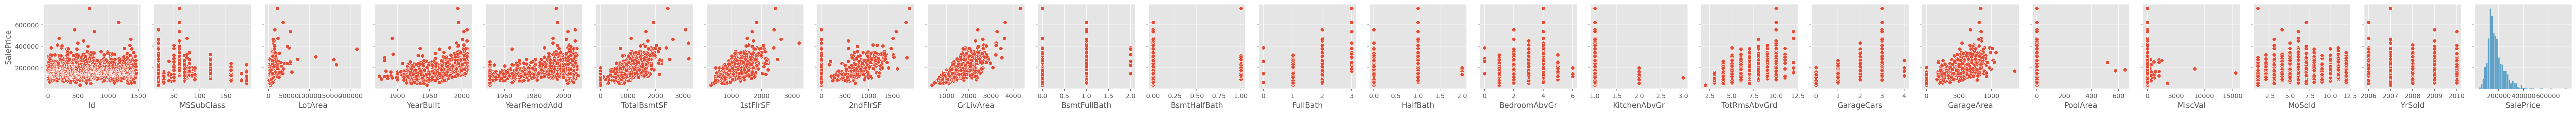

In [791]:
#which numeric features have a polynomial relationship with sales price (if you double click on the image you can see it clearly!!)
sns.pairplot(data=residential_and_fixed,
                  y_vars=['SalePrice']);
plt.show();

For this project imgoing to make the feature 'year built' a categorical feature.

In [792]:
residential_and_fixed['YearBuilt'] = residential_and_fixed['YearBuilt'].astype('object')

<ipython-input-792-8b954c06ae10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_and_fixed['YearBuilt'] = residential_and_fixed['YearBuilt'].astype('object')


In [793]:
residential_and_fixed.describe(include = 'object')

MSZoning LotFrontage Street Alley LotShape LandContour  \
count                      1194        1194   1194  1194     1194        1194   
unique                        4         106      2     3        4           4   
top     Residential Low Density          NA   Pave    NA      Reg         Lvl   
freq                        955         237   1190  1124      754        1080   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1194      1194         1194       1194       1194     1194   
unique         5         3           25          9          7        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq         859      1130          198       1028       1183     1003   

       HouseStyle  YearBuilt RoofStyle RoofMatl Foundation GarageType  \
count        1194       1194      1194     1194       1194       1194   
unique          8        110         6        7          6          7   
top        1Story       2004     Gable  CompShg     CBlock     Attchd   
freq          576         52       939     1175        554        712   

       GarageYrBlt GarageCond PavedDrive PoolQC MiscFeature SaleType  \
count         1194       1194       1194   1194        1194     1194   
unique          96          6          3      3           5        7   
top             NA         TA          Y     NA          NA       WD   
freq            61       1088       1091   1191        1145     1158   

       SaleCondition  
count           1194  
unique             1  
top           Normal  
freq            1194

<b> correlations </b> of features with house price

In [794]:
residential_and_fixed.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
GrLivArea       0.746598
GarageCars      0.629672
TotalBsmtSF     0.628759
GarageArea      0.617576
1stFlrSF        0.610064
FullBath        0.561486
TotRmsAbvGrd    0.530338
YearRemodAdd    0.474294
2ndFlrSF        0.359349
HalfBath        0.298219
LotArea         0.294942
BsmtFullBath    0.232092
BedroomAbvGr    0.218479
PoolArea        0.016342
MoSold          0.013429
YrSold          0.005613
BsmtHalfBath    0.000839
MiscVal        -0.015887
Id             -0.024718
MSSubClass     -0.071487
KitchenAbvGr   -0.145269
Name: SalePrice, dtype: float64

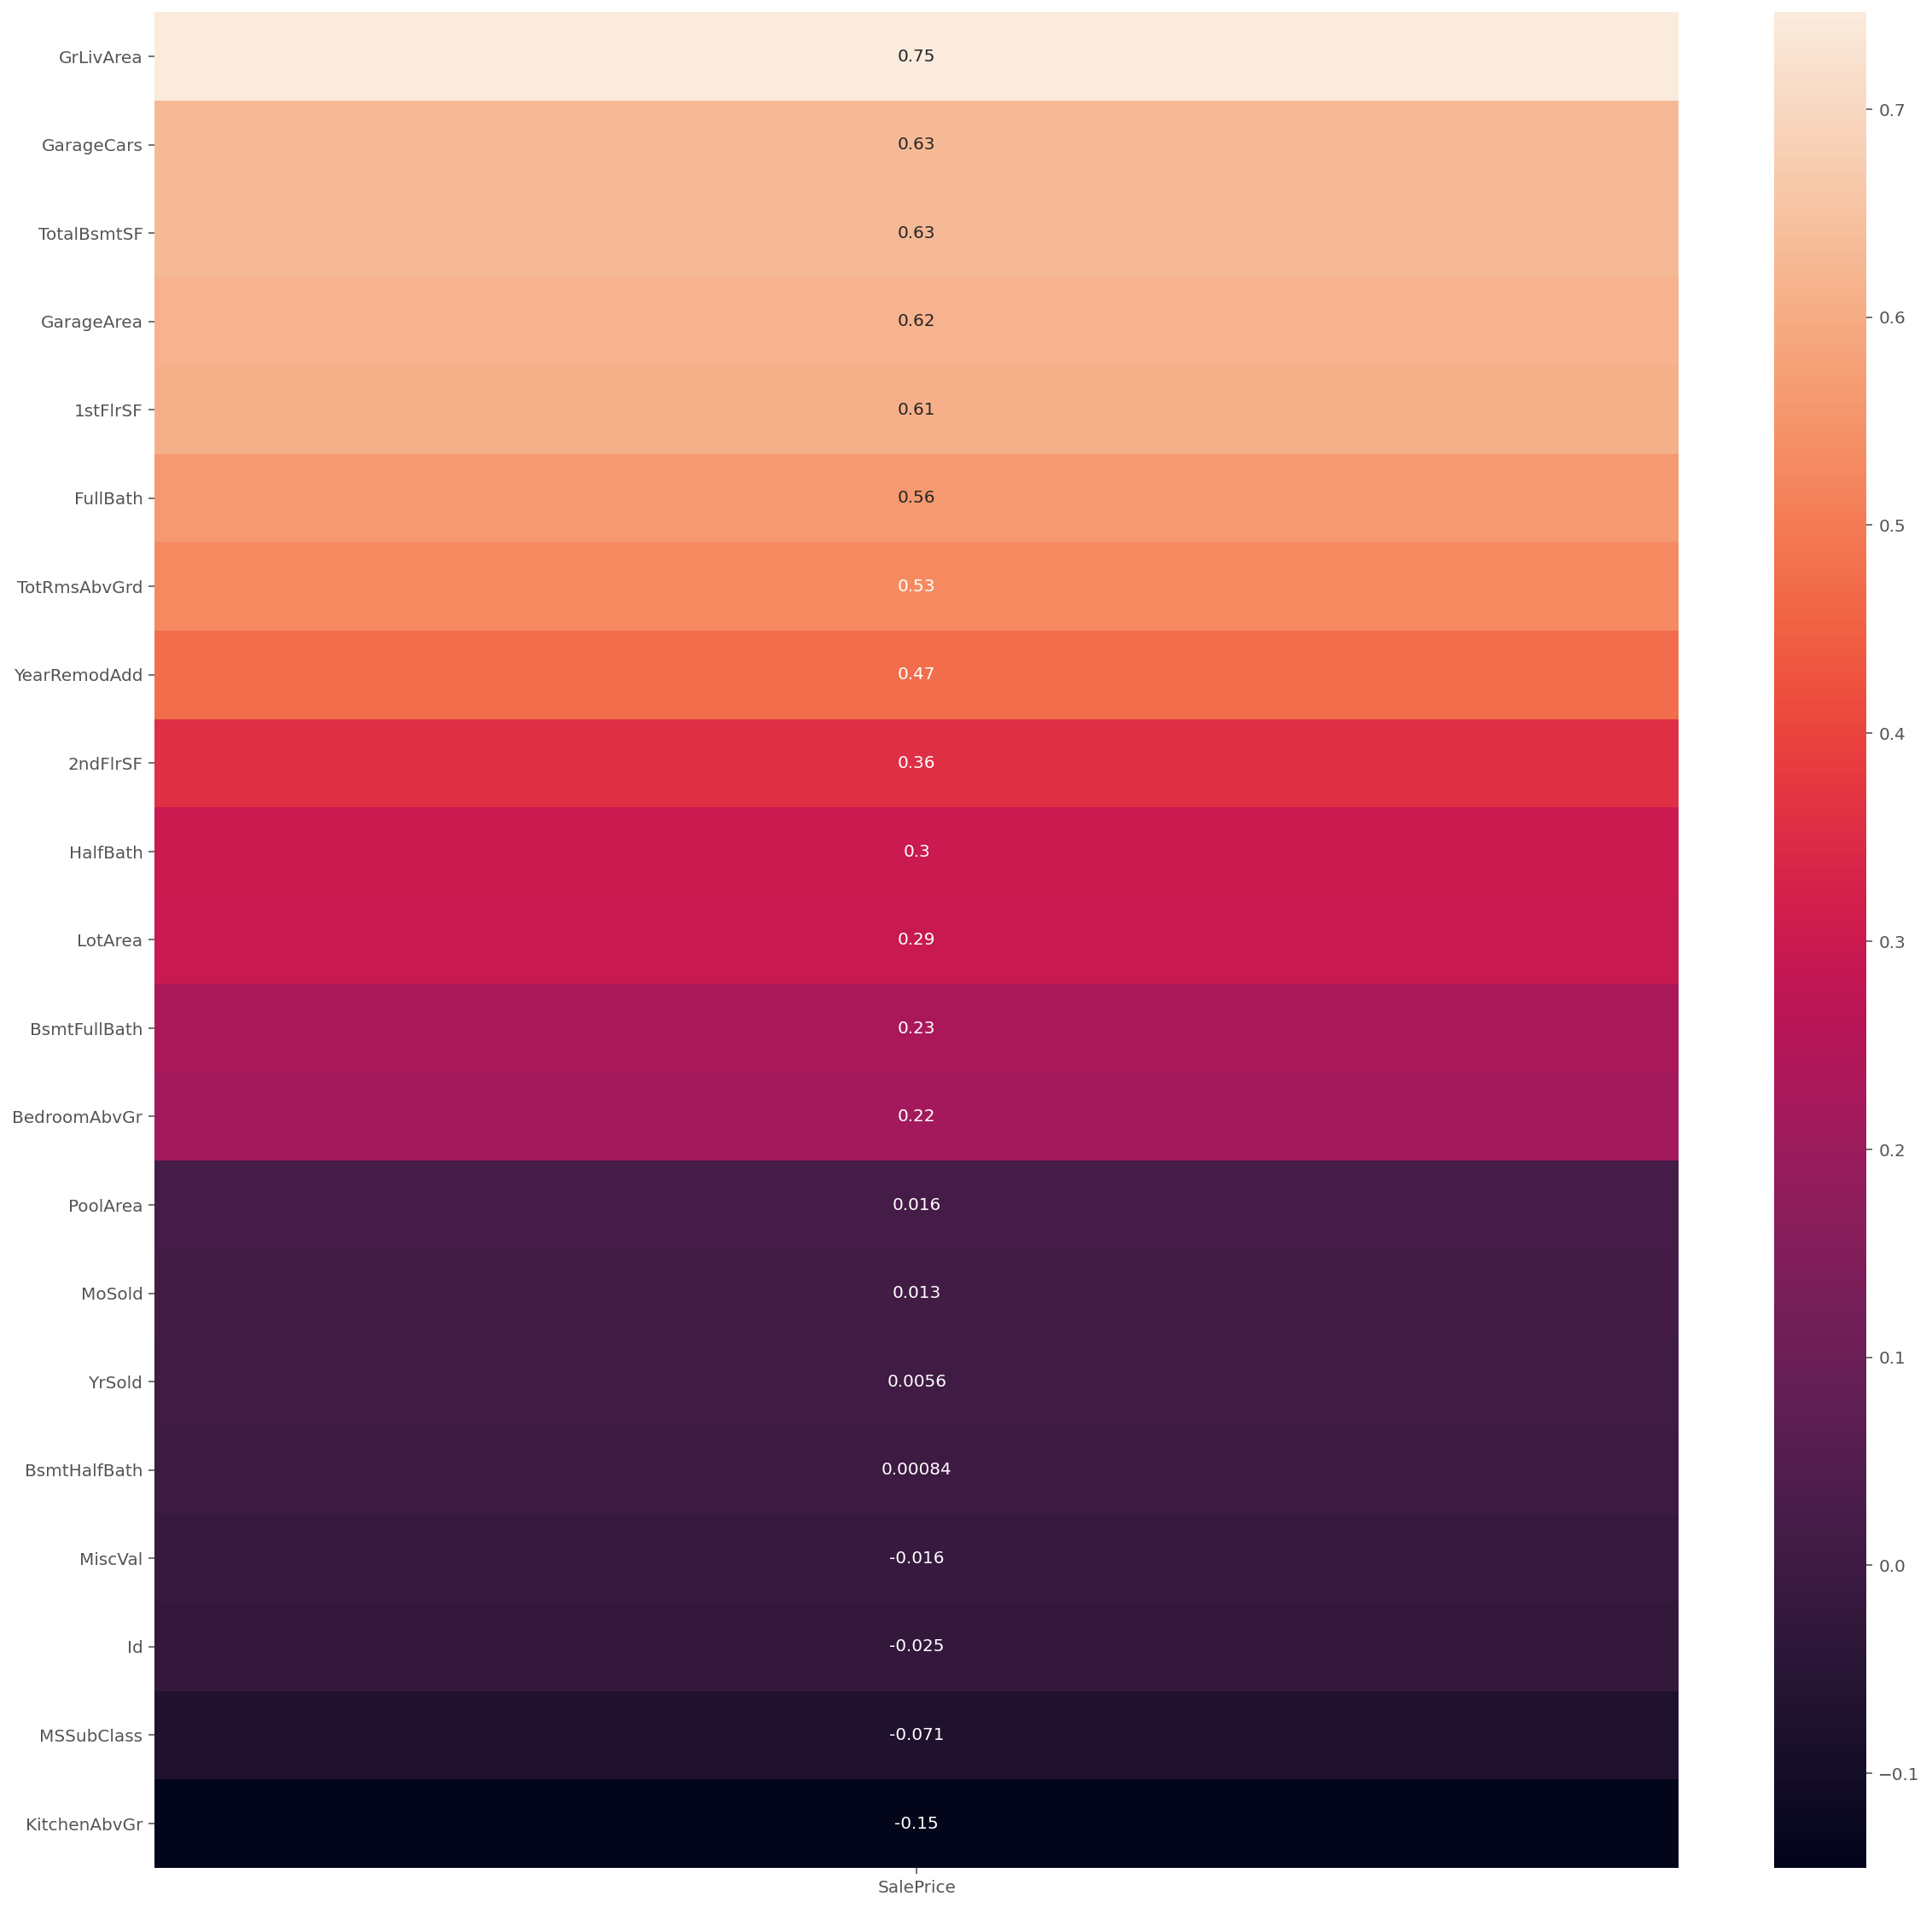

In [795]:
fig , ax = plt.subplots(figsize = (20,20))
sns.heatmap(residential_and_fixed.corr()['SalePrice'].sort_values(ascending = False)[1:].to_frame(), annot = True, ax =ax);

In [796]:
residential_and_fixed.drop('Street' , inplace = True, axis = 1)

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [797]:
for x in residential_and_fixed.columns:
    print(x , residential_and_fixed[x].dtype)
    print(residential_and_fixed[x].unique())
    print('---\n\n')

Id int64
[   1    2    3 ... 1458 1459 1460]
---


MSSubClass int64
[ 60  20  50 190  45  90 120  30  85  80  75  70 180 160  40]
---


MSZoning object
['Residential Low Density' 'Residential Medium Density'
 'Floating Village Residential' 'Residential High Density']
---


LotFrontage object
['65' '80' '68' '84' '85' '75' 'NA' '50' '70' '51' '72' '66' '57' '44'
 '110' '60' '98' '47' '108' '112' '74' '115' '61' '52' '100' '89' '76'
 '81' '95' '69' '21' '32' '78' '121' '122' '73' '77' '94' '105' '34' '90'
 '55' '48' '88' '71' '24' '63' '120' '40' '62' '141' '97' '54' '92' '41'
 '99' '67' '83' '43' '103' '174' '64' '30' '129' '140' '82' '37' '118'
 '87' '116' '150' '86' '49' '96' '59' '91' '36' '101' '79' '102' '93' '38'
 '56' '130' '137' '35' '53' '58' '45' '106' '104' '42' '39' '144' '128'
 '149' '313' '114' '107' '134' '109' '138' '152' '124' '153' '46']
---


LotArea int64
[  8450   9600  11250  14260  14115  10084  10382   7420  11200  12968
  10920   6120  11241  10791  13695   7449

In [798]:
residential_and_fixed['YearRemodAdd'] = residential_and_fixed['YearRemodAdd'].astype(object)

<ipython-input-798-c028290e7abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_and_fixed['YearRemodAdd'] = residential_and_fixed['YearRemodAdd'].astype(object)


In [799]:
residential_and_fixed[['MoSold', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath',
                      'BsmtFullBath', 'MSSubClass', 'GarageCars', 'YrSold']] = residential_and_fixed[['MoSold', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath',
                      'BsmtFullBath', 'MSSubClass', 'GarageCars', 'YrSold']].astype(object)



/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


make the **dummy variables** for the independent variables that are an object type (categorical)

In [800]:
residential_and_fixed = pd.get_dummies(residential_and_fixed , columns = residential_and_fixed.describe(include = 'object').columns, drop_first = True)

residential_and_fixed

Id  LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  \
0        1     8450          856       856       854       1710         548   
1        2     9600         1262      1262         0       1262         460   
2        3    11250          920       920       866       1786         608   
4        5    14260         1145      1145      1053       2198         836   
5        6    14115          796       796       566       1362         480   
...    ...      ...          ...       ...       ...        ...         ...   
1455  1456     7917          953       953       694       1647         460   
1456  1457    13175         1542      2073         0       2073         500   
1457  1458     9042         1152      1188      1152       2340         252   
1458  1459     9717         1078      1078         0       1078         240   
1459  1460     9937         1256      1256         0       1256         276   

      PoolArea  MiscVal  SalePrice  MSSubClass_30  MSSubClass_40  \
0            0        0     208500              0              0   
1            0        0     181500              0              0   
2            0        0     223500              0              0   
4            0        0     250000              0              0   
5            0      700     143000              0              0   
...        ...      ...        ...            ...            ...   
1455         0        0     175000              0              0   
1456         0        0     210000              0              0   
1457         0     2500     266500              0              0   
1458         0        0     142125              0              0   
1459         0        0     147500              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0                 0              0              1              0   
1                 0              0              0              0   
2                 0              0              1              0   
4                 0              0              1              0   
5                 0              1              0              0   
...             ...            ...            ...            ...   
1455              0              0              1              0   
1456              0              0              0              0   
1457              0              0              0              1   
1458              0              0              0              0   
1459              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
4                 0              0              0              0   
5                 0              0              0              0   
...             ...            ...            ...            ...   
1455              0              0              0              0   
1456              0              0              0              0   
1457              0              0              0              0   
1458              0              0              0              0   
1459              0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
4                  0               0               0               0   
5                  0               0               0               0   
...              ...             ...             ...             ...   
1455               0               0               0               0   
1456               0            

**Train/Test Split** - split into test (post 2010) and train (pre 2010)

In [801]:

test = residential_and_fixed[residential_and_fixed['YrSold_2010'] == 1]

train = residential_and_fixed[residential_and_fixed['YrSold_2010'] == 0]

In [802]:
test.head()
test.drop('Id', inplace = True, axis = 1)

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [803]:
train.head()

train.drop('Id', inplace = True, axis = 1)

In [804]:
target_train = train.pop('SalePrice')
x_train = train

target_test = test.pop('SalePrice')
x_test = test

In [805]:
print(target_train.shape)
print(x_train.shape)

print(target_test.shape)
x_test.shape

(1040,)
(1040, 543)
(154,)


(154, 543)

Checking that all of the columns add up

In [806]:
1278+172

1450

In [809]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pipe = Pipeline(steps = [('poly_1', PolynomialFeatures(degree = 1, include_bias = False)),
                         ('scale', StandardScaler())])

columns_to_transform = train.describe(include = 'int').columns
c_transformer = ColumnTransformer([('pipe',pipe, columns_to_transform)], remainder = 'passthrough')


In [810]:
X_train_std = pd.DataFrame(c_transformer.fit_transform(x_train), columns = x_train.columns)
X_train_std

LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  \
0    -0.190409    -0.410045 -0.779169  1.156608   0.440408    0.435661   
1    -0.087417     0.597264  0.374047 -0.825649  -0.464866   -0.005300   
2     0.060354    -0.251257 -0.597382  1.184462   0.593981    0.736316   
3     0.329923     0.306981  0.041716  1.618516   1.426510    1.878805   
4     0.316937    -0.558908 -0.949595  0.488119  -0.262796    0.094918   
...        ...          ...       ...       ...        ...         ...   
1035 -0.141152    -0.310802 -0.665552  1.254096   0.606105   -2.310322   
1036 -0.618048    -1.176691 -0.165636 -0.825649  -0.848799    0.320410   
1037 -0.275489     0.495541  0.257589 -0.825649  -0.547715   -0.305955   
1038 -0.238143    -0.169382 -0.503647  0.785225   0.313104   -0.005300   
1039 -0.057236     0.582378  0.357004 -0.825649  -0.476990   -0.927309   

      PoolArea   MiscVal  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0    -0.053565 -0.082880            0.0            0.0            0.0   
1    -0.053565 -0.082880            0.0            0.0            0.0   
2    -0.053565 -0.082880            0.0            0.0            0.0   
3    -0.053565 -0.082880            0.0            0.0            0.0   
4    -0.053565  1.154548            0.0            0.0            0.0   
...        ...       ...            ...            ...            ...   
1035 -0.053565 -0.082880            0.0            0.0            0.0   
1036 -0.053565 -0.082880            0.0            0.0            0.0   
1037 -0.053565 -0.082880            0.0            0.0            0.0   
1038 -0.053565 -0.082880            0.0            0.0            0.0   
1039 -0.053565 -0.082880            0.0            0.0            0.0   

      MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0               0.0            1.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            1.0            0.0            0.0   
3               0.0            1.0            0.0            0.0   
4               1.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
1035            0.0            0.0            0.0            0.0   
1036            0.0            0.0            0.0            0.0   
1037            0.0            0.0            0.0            0.0   
1038            0.0            1.0            0.0            0.0   
1039            0.0            0.0            0.0            0.0   

      MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0               0.0            0.0            0.0             0.0   
1               0.0            0.0            0.0             0.0   
2               0.0            0.0            0.0             0.0   
3               0.0            0.0            0.0             0.0   
4               0.0            0.0            0.0             0.0   
...             ...            ...            ...             ...   
1035            0.0            0.0            1.0             0.0   
1036            0.0            0.0            0.0             0.0   
1037            0.0            0.0            0.0             0.0   
1038            0.0            0.0            0.0             0.0   
1039            0.0            0.0            0.0             0.0   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0                0.0             0.0             0.0   
1                0.0             0.0             0.0   
2                0.0             0.0             0.0   
3                0.0             0.0             0.0   
4                0.0             0.0             0.0   
...              ...             ...             ...   
1035             0.0             0.0             0.0   
1036             0.0             1.0             0.0   
1037             0.0             0.0             0.0   
1038             0.0             0.

In [811]:
X_test_std = pd.DataFrame(c_transformer.fit_transform(x_test), columns = x_train.columns)
X_test_std

LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  \
0    0.140499    -0.121092 -0.432857 -0.763916  -0.978029    0.173394   
1   -0.309812     0.021904 -0.281166 -0.763916  -0.867612   -0.940324   
2   -0.467082    -0.386655 -0.714568 -0.763916  -1.183089    0.682523   
3    0.176133     1.666354  1.463277 -0.763916   0.402182    1.721993   
4    0.036905     0.884985  1.452442 -0.763916   0.394295   -0.001619   
..        ...          ...       ...       ...        ...         ...   
149 -0.435959    -0.356013  0.195576 -0.763916  -0.520588    2.522810   
150  2.380927     0.348751  0.065556 -0.763916  -0.615231   -0.717580   
151  0.431284     1.252688  2.462810 -0.763916   1.129750    0.279463   
152 -0.190130     0.256825  0.065556  1.873318   1.656202   -1.035786   
153 -0.088641     0.067867 -0.232408 -0.763916  -0.832121   -1.099427   

     PoolArea   MiscVal  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0         0.0  1.532042            0.0            0.0            0.0   
1         0.0 -0.211930            0.0            0.0            0.0   
2         0.0 -0.211930            0.0            0.0            0.0   
3         0.0 -0.211930            0.0            0.0            0.0   
4         0.0 -0.211930            0.0            0.0            0.0   
..        ...       ...            ...            ...            ...   
149       0.0 -0.211930            0.0            0.0            0.0   
150       0.0 -0.211930            0.0            0.0            0.0   
151       0.0 -0.211930            0.0            0.0            0.0   
152       0.0  6.016539            0.0            0.0            0.0   
153       0.0 -0.211930            0.0            0.0            0.0   

     MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              0.0            0.0            0.0            0.0   
3              0.0            0.0            0.0            0.0   
4              0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
149            0.0            0.0            0.0            0.0   
150            0.0            0.0            0.0            0.0   
151            0.0            0.0            0.0            0.0   
152            0.0            0.0            1.0            0.0   
153            0.0            0.0            0.0            0.0   

     MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0.0            0.0            0.0             0.0   
1              0.0            0.0            0.0             0.0   
2              0.0            0.0            0.0             0.0   
3              0.0            0.0            0.0             0.0   
4              0.0            0.0            0.0             0.0   
..             ...            ...            ...             ...   
149            0.0            0.0            0.0             0.0   
150            0.0            0.0            0.0             0.0   
151            0.0            0.0            0.0             0.0   
152            0.0            0.0            0.0             0.0   
153            0.0            0.0            0.0             0.0   

     MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0.0             0.0             0.0   
1               0.0             0.0             0.0   
2               0.0             0.0             0.0   
3               0.0             0.0             0.0   
4               0.0             0.0             0.0   
..              ...             ...             ...   
149             0.0             0.0             0.0   
150             0.0             0.0             0.0   
151             0.0             0.0             0.0   
152             0.0             0.0             0.0   
153             0.0             0.0  

In [812]:
X_train = X_train_std
X_test = X_test_std

In [813]:
y_train = target_train
y_test = target_test

In [814]:
polynomial_list = [1]


ridge_accuracy = []
ridge_test = []
ridge_cv_var = []

lasso_accuracy = []
lasso_test = []
lasso_cv_var = []

elastic_accuracy = []
elastic_test = []
elastic_cv_var = []


    
#find optimal ridge alpha
find_ridge_alpha = RidgeCV(alphas = np.logspace(-5,5,100), cv = 4)
find_ridge_alpha.fit(X_train,y_train)
find_ridge_alpha.alpha_
print(f'Ridge alpha optimum for {1}: ',find_ridge_alpha.alpha_ )



#results of best ridge alpha
ridge_model = Ridge(alpha = find_ridge_alpha.alpha_)
ridge_model.fit(X_train,y_train)
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv = 4)

ridge_accuracy.append(np.mean(ridge_scores))
ridge_test.append(ridge_model.score(X_test, y_test))
ridge_cv_var.append(np.var(ridge_scores))

print(f'Ridge Training Accuracy for poly of {1}: ', ridge_model.score(X_train, y_train))
print(f'Ridge Testing Accuracy for poly of {1}: ', ridge_model.score(X_test, y_test))
print(f'Ridge Training Accuracy mean for poly of {1}: ', np.mean(ridge_scores))
print(f'Ridge Training Accuracy variance for poly of {1}: ', np.var(ridge_scores))


#find optimal lasso alpha
find_lasso_alpha = LassoCV(alphas = np.logspace(-5,5,100), cv = 4)
find_lasso_alpha.fit(X_train,y_train)
find_lasso_alpha.alpha_
print(f'Lasso alpha optimum for {n}: ',find_lasso_alpha.alpha_ )



#results of best lasso alpha
lasso_model = Lasso(alpha = find_lasso_alpha.alpha_)
lasso_model.fit(X_train,y_train)
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv = 4)

lasso_accuracy.append(np.mean(lasso_scores))
lasso_test.append(lasso_model.score(X_test, y_test))
lasso_cv_var.append(np.var(lasso_scores))

print(f'Lasso Training Accuracy for poly of {n}: ', lasso_model.score(X_train, y_train))
print(f'Lasso Testing Accuracy for poly of {n}: ', lasso_model.score(X_test, y_test))
print(f'Lasso Training Accuracy mean for poly of {n}: ', np.mean(lasso_scores))
print(f'Lasso Training Accuracy variance for poly of {n}: ', np.var(lasso_scores))


#find optimal ElasticNet alpha / l1_ratio
find_elastic_alpha = ElasticNetCV(alphas = np.logspace(-5,5,100), cv = 4)
find_elastic_alpha.fit(X_train,y_train)
find_elastic_alpha.alpha_
print(f'Elastic alpha optimum for {n}: ',find_elastic_alpha.alpha_ )
print(f'Elastic l1_ratio optimum for {n}: ',find_elastic_alpha.l1_ratio_ )


#results of best elastic alpha/ l1_ratio
elastic_model = ElasticNet(alpha = find_elastic_alpha.alpha_, l1_ratio = find_elastic_alpha.l1_ratio_)
elastic_model.fit(X_train,y_train)
elastic_scores = cross_val_score(elastic_model, X_train, y_train, cv = 4)

elastic_accuracy.append(np.mean(elastic_scores))
elastic_test.append(elastic_model.score(X_test, y_test))
elastic_cv_var.append(np.var(elastic_scores))

print(f'Elastic Training Accuracy for poly of {n}: ', elastic_model.score(X_train, y_train))
print(f'Elastic Testing Accuracy for poly of {n}: ', elastic_model.score(X_test, y_test))
print(f'Elastic Training Accuracy mean for poly of {n}: ', np.mean(elastic_scores))
print(f'Elastic Training Accuracy variance for poly of {n}: ', np.var(elastic_scores))
print('\n')

polyoverview = pd.DataFrame({
    'ridge_accuracy': ridge_accuracy,'ridge_test':ridge_test,'ridge_cv_var':ridge_cv_var,

'lasso_accuracy':lasso_accuracy,
'lasso_test':lasso_test,
'lasso_cv_var':lasso_cv_var,

'elastic_accuracy':elastic_accuracy,
'elastic_test':elastic_test,
'elastic_cv_var':elastic_cv_var,
}, index = [x for x in range(1,len(polynomial_list)+1)])

polyoverview

Ridge alpha optimum for 1:  11.497569953977356
Ridge Training Accuracy for poly of 1:  0.9124933461813192
Ridge Testing Accuracy for poly of 1:  0.8693883456691122
Ridge Training Accuracy mean for poly of 1:  0.8363666738137814
Ridge Training Accuracy variance for poly of 1:  0.00032273093830419017


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1216056489.1807861, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1260710327.814911, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5556540155.781418, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44112237854.76391, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44298674639.55511, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44468687461.18694, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46294341713.93683, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46327103736.17407, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46358278520.609924, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43944155911.510124, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44498194124.02061, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44844984095.00598, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51693431620.80528, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51807393942.97728, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51909595776.6499, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/si

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47491335426.77608, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49108325198.447685, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49401988302.291885, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58654536802.9322, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58712045804.317184, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58763233347.56355, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18274660612.236298, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20790967324.017075, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20097560091.08284, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45467142315.453865, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45586494042.99854, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45693082379.67574, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3

Lasso alpha optimum for 1:  117.68119524349991
Lasso Training Accuracy for poly of 1:  0.8996071344306809
Lasso Testing Accuracy for poly of 1:  0.8670776739505508
Lasso Training Accuracy mean for poly of 1:  0.8336953446199518
Lasso Training Accuracy variance for poly of 1:  0.000774980758290692


/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697250629.420105, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10987532178.767883, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46844198081.95353, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/s

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49550781926.447426, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49149686457.56641, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48811959338.557014, tolerance: 380163280.2950072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55157201654.57716, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54821306075.847404, tolerance: 321148150.9004435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12167147082.256836, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62371214315.404564, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61922378643.869255, tolerance: 422963528.3192995
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68411225698.5013, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(
/Users/chrismembrey/miniforge3/lib/python3.9

/Users/chrismembrey/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48071009583.55221, tolerance: 385814936.43210196
  model = cd_fast.enet_coordinate_descent_gram(


Elastic alpha optimum for 1:  0.027185882427329403
Elastic l1_ratio optimum for 1:  0.5
Elastic Training Accuracy for poly of 1:  0.908410716334869
Elastic Testing Accuracy for poly of 1:  0.8697533599776694
Elastic Training Accuracy mean for poly of 1:  0.8363628740560232
Elastic Training Accuracy variance for poly of 1:  0.00033086301591026874




ridge_accuracy  ridge_test  ridge_cv_var  lasso_accuracy  lasso_test  \
1        0.836367    0.869388      0.000323        0.833695    0.867078   

   lasso_cv_var  elastic_accuracy  elastic_test  elastic_cv_var  
1      0.000775          0.836363      0.869753        0.000331

In [815]:
ridge_find_alpha = RidgeCV(alphas = np.logspace(-5,5,100), cv = 4)
ridge_find_alpha.fit(X_train, target_train)
print(ridge_find_alpha.alpha_)

ridge_model = Ridge(alpha = ridge_find_alpha.alpha_)
ridge_model.fit(X_train,target_train)

coefs = pd.DataFrame({'Feature': X_train.columns,
                     'coef': ridge_model.coef_})

coefs['absoloute'] = abs(coefs.coef)
#the coefs will show what fixed feature you can change for the highest returns!



11.497569953977356


In [817]:
coefs.sort_values(by = 'absoloute', ascending = False)

Feature          coef     absoloute
372      RoofMatl_WdShngl  25254.870812  25254.870812
4               GrLivArea  18939.468937  18939.468937
507          GarageCars_3  18555.008504  18555.008504
158  Neighborhood_NoRidge  18127.442243  18127.442243
359     YearRemodAdd_2008  16303.541591  16303.541591
..                    ...           ...           ...
423      GarageYrBlt_1927      0.000000      0.000000
55        LotFrontage_152      0.000000      0.000000
193        YearBuilt_1875      0.000000      0.000000
68         LotFrontage_39      0.000000      0.000000
503      GarageYrBlt_2009      0.000000      0.000000

[543 rows x 3 columns]

The model scores have improved but this only takes into account houses that are sold under normal conditions rather than all types of sales conditions. 